In [1]:
import sys
from pathlib import Path

# Add parent directory to Python path so we can import from scripts
project_root = Path.cwd().parent
if str(project_root) not in sys.path:
    sys.path.insert(0, str(project_root))

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scripts.eda_functions import *

In [2]:
listings_data_path = Path.cwd().parent / "data" / "processed" / "listings_regular_license.parquet"
calendar_data_path = Path.cwd().parent / "data" / "processed" / "calendar_cleaned.parquet"
df = pd.read_parquet(listings_data_path, engine="pyarrow")

In [4]:
df.head()

id                  name    host_id host_since  \
0  PROP_B6D8  Co - Enti - En #0001  HOST_723A 2012-05-13   
1  PROP_6279  Ci - Enti - En #0003  HOST_D51E 2012-03-20   
2  PROP_28B3  LU - Enti - En #0004  HOST_33A5 2012-07-10   
3  PROP_2317  He - Enti - En #0005  HOST_CBBB 2012-12-01   
4  PROP_B0A8  Th - Priv - Pr #0001  HOST_5772 2012-10-11   

          host_location host_response_time host_response_rate  \
0  Thessalonika, Greece     within an hour               100%   
1  Thessaloniki, Greece     within an hour               100%   
2  Thessalonika, Greece               None               None   
3  Thessaloniki, Greece               None               None   
4  Thessaloniki, Greece       within a day               100%   

   host_acceptance_rate host_is_superhost  host_total_listings_count  ...  \
0                  0.97              True                          1  ...   
1                  1.00              True                        104  ...   
2                   NaN             False                          2  ...   
3                  1.00             False                          2  ...   
4                  0.53              True                          1  ...   

  review_scores_accuracy review_scores_cleanliness review_scores_checkin  \
0                   4.84                      4.79                  4.95   
1                   4.87                      4.89                  4.85   
2                   5.00                      5.00                  5.00   
3                   4.73                      4.79                  4.83   
4                   4.94                      4.98                  4.94   

   review_scores_communication  review_scores_location review_scores_value  \
0                         4.95                    4.74                4.75   
1                         4.85                    4.45                4.83   
2                         5.00                    4.86                4.29   
3                         4.90                    4.71                4.63   
4                         4.93                    4.65                4.93   

      license  instant_bookable  reviews_per_month      Host_Category  
0  LIC_FB61FA             False               2.62     Individual (1)  
1  LIC_6BC2B7              True               0.32   Large Multi (4+)  
2  LIC_0000CC             False               0.08  Small Multi (2-3)  
3  LIC_B18A7E             False               1.37  Small Multi (2-3)  
4  LIC_F9CE57             False               1.08     Individual (1)  

[5 rows x 49 columns]

In [5]:
df.shape

(4379, 49)

### Create distance variables using white tower as a landmark

In [3]:
from geopy.distance import geodesic

white_tower_coords = (40.62638, 22.9485)

df['distance_to_center_km'] = df.apply(
    lambda row: geodesic(
        (row['latitude'], row['longitude']), 
        white_tower_coords
    ).km,
    axis=1
)

In [4]:
df.distance_to_center_km.describe()

count    4379.000000
mean        1.879328
std         1.295302
min         0.021539
25%         1.115124
50%         1.585328
75%         2.146196
max         9.190312
Name: distance_to_center_km, dtype: float64

In [16]:
# distance from aristotelous sq
geodesic((40.59123, 22.94672), white_tower_coords).km

3.9061852073882366

# Add this comment in your code:
"""
Distance Calculation Note:
- Coordinates rounded to 4 decimal places for privacy (~11m precision)
- Maximum distance error: ~14 meters
- For 1-10km distances, this represents <0.3% error
- Acceptable for neighborhood-level geographic analysis
"""

### create distance categories

In [5]:
# Simple, interpretable
df['distance_cat'] = pd.cut(
    df['distance_to_center_km'],
    bins=[0, 1, 3, 6, 100],
    labels=['Downtown (<1km)', 'Inner City (1-3km)', 
            'Neighborhoods (3-6km)', 'Suburban (>6km)']
)


### Univariate analysis

### Categorical

0 - distance categories

CATEGORICAL VARIABLE ANALYSIS: distance_cat

Cardinality: 4 unique categories
Missing values: 0 (0.00%)
Total observations: 4379

Most Common Category: 'Inner City (1-3km)' (2880 occurrences, 65.77%)

Rare Categories (<5%): 1
  - 'Suburban (>6km)': 81 (1.85%)

----------------------------------------------------------------------
FREQUENCY TABLE:
----------------------------------------------------------------------
                       Count  Percentage
distance_cat                            
Inner City (1-3km)      2880   65.768440
Downtown (<1km)          918   20.963690
Neighborhoods (3-6km)    500   11.418132
Suburban (>6km)           81    1.849737


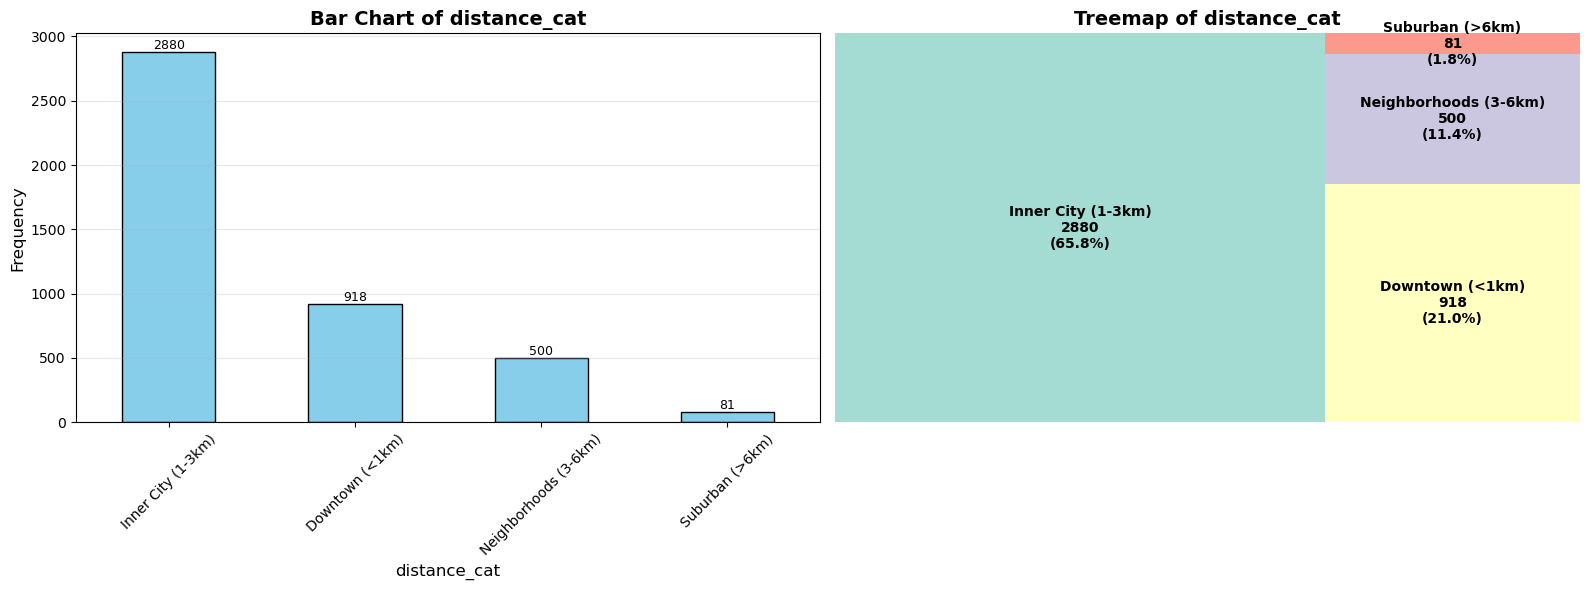

In [20]:
analyze_categorical_variable(df["distance_cat"])

1 - neighbourhood_cleansed

CATEGORICAL VARIABLE ANALYSIS: neighbourhood_cleansed

Cardinality: 7 unique categories
Missing values: 0 (0.00%)
Total observations: 4380

Most Common Category: 'Thessaloniki' (3868 occurrences, 88.31%)

Rare Categories (<5%): 6
  - 'Kalamaria': 151 (3.45%)
  - 'Neapolis – Sykeon': 121 (2.76%)
  - 'Pilea – Chortiatis': 75 (1.71%)
  - 'Ampelokipon – Menemeni': 60 (1.37%)
  - 'Pavlou Mela': 60 (1.37%)
  - 'Kordelio – Evosmos': 45 (1.03%)

----------------------------------------------------------------------
FREQUENCY TABLE:
----------------------------------------------------------------------
                        Count  Percentage
neighbourhood_cleansed                   
Thessaloniki             3868   88.310502
Kalamaria                 151    3.447489
Neapolis – Sykeon         121    2.762557
Pilea – Chortiatis         75    1.712329
Ampelokipon – Menemeni     60    1.369863
Pavlou Mela                60    1.369863
Kordelio – Evosmos         45    1.027397


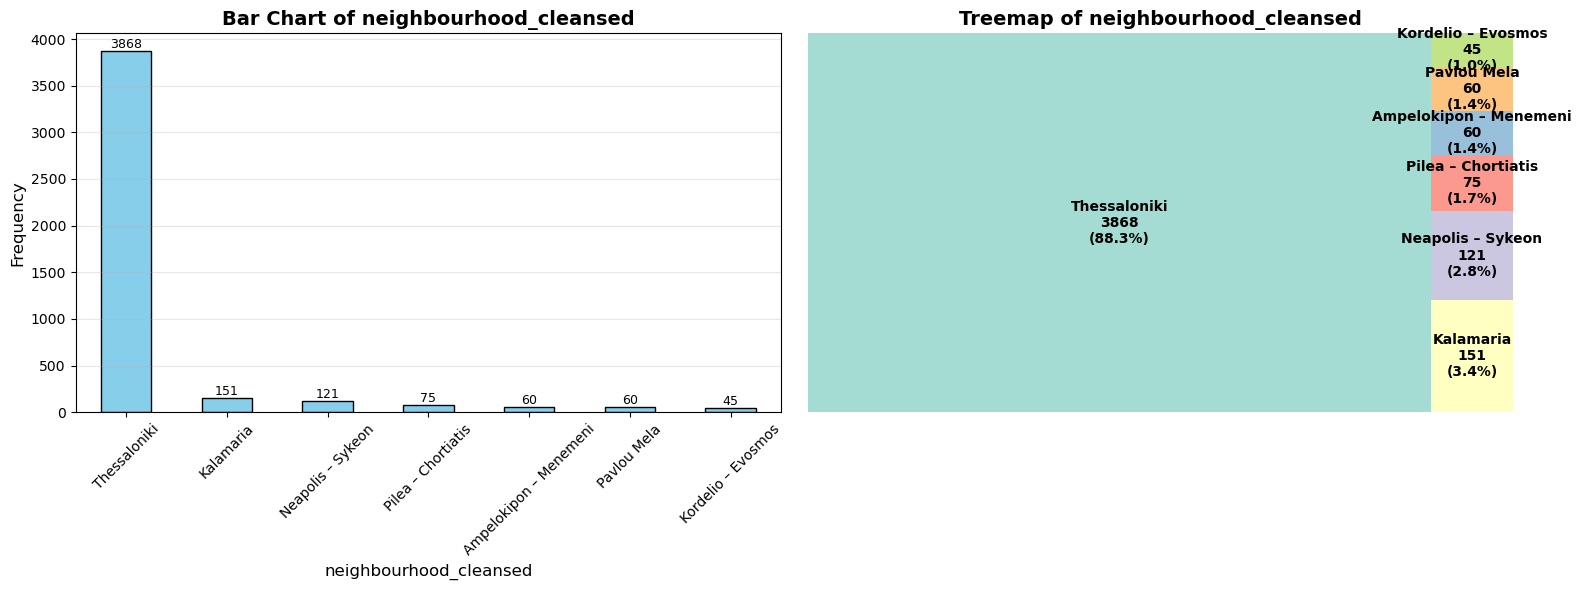

In [10]:
analyze_categorical_variable(df["neighbourhood_cleansed"])

2 - host category

CATEGORICAL VARIABLE ANALYSIS: Host_Category

Cardinality: 4 unique categories
Missing values: 0 (0.00%)
Total observations: 4380

Most Common Category: 'Large Multi (4+)' (2324 occurrences, 53.06%)

No rare categories found (<5% threshold)

----------------------------------------------------------------------
FREQUENCY TABLE:
----------------------------------------------------------------------
                   Count  Percentage
Host_Category                       
Large Multi (4+)    2324   53.059361
Individual (1)      1050   23.972603
Small Multi (2-3)    782   17.853881
nan                  224    5.114155


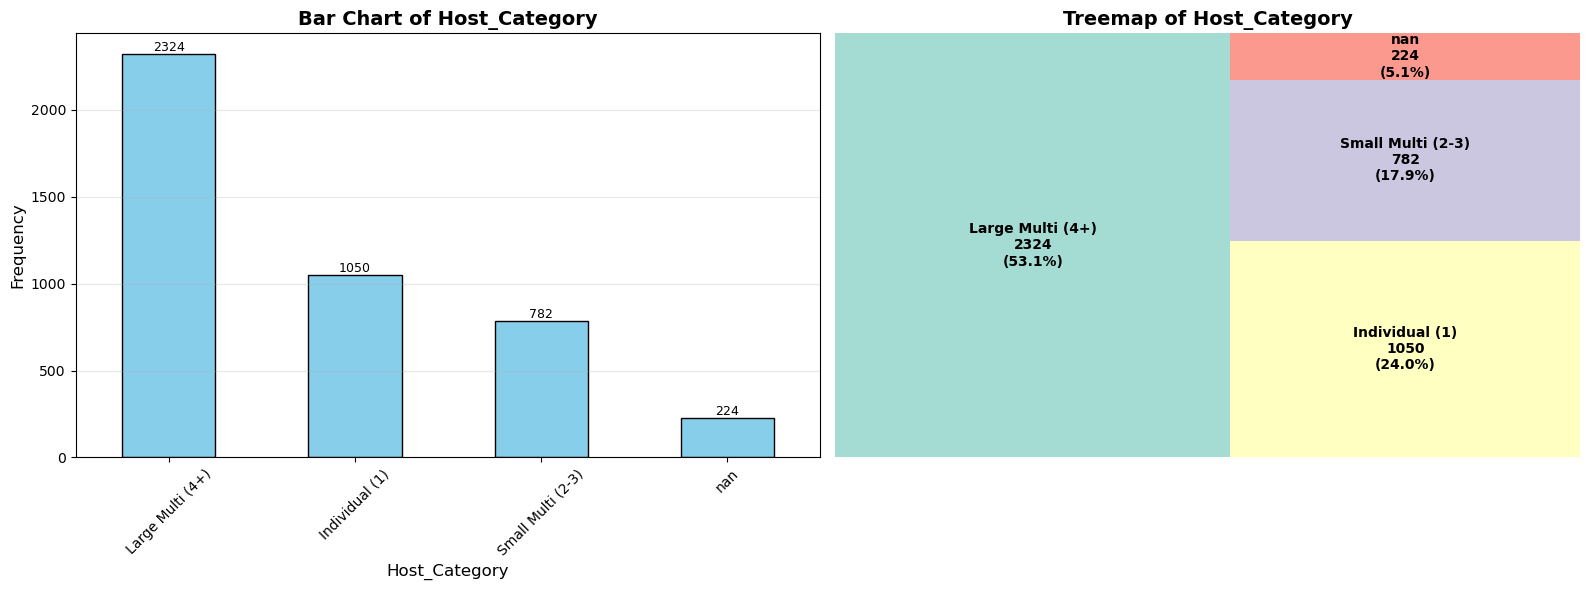

In [12]:
analyze_categorical_variable(df["Host_Category"])

3 - is superhost

CATEGORICAL VARIABLE ANALYSIS: host_is_superhost

Cardinality: 2 unique categories
Missing values: 337 (7.69%)
Total observations: 4380

Most Common Category: 'False' (2522 occurrences, 62.38%)

No rare categories found (<5% threshold)

----------------------------------------------------------------------
FREQUENCY TABLE:
----------------------------------------------------------------------
                   Count  Percentage
host_is_superhost                   
False               2522   62.379421
True                1521   37.620579


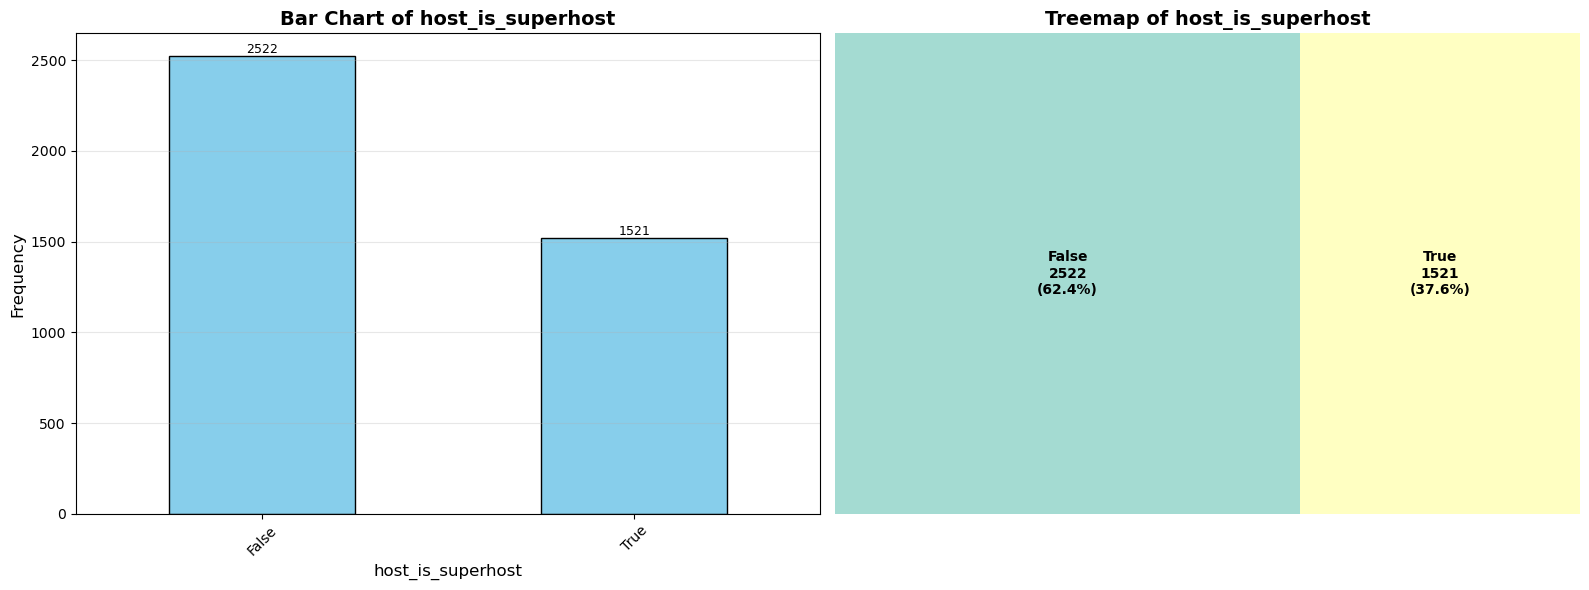

In [13]:
analyze_categorical_variable(df["host_is_superhost"])

4 - instant bookable

CATEGORICAL VARIABLE ANALYSIS: instant_bookable

Cardinality: 2 unique categories
Missing values: 0 (0.00%)
Total observations: 4380

Most Common Category: 'True' (2913 occurrences, 66.51%)

No rare categories found (<5% threshold)

----------------------------------------------------------------------
FREQUENCY TABLE:
----------------------------------------------------------------------
                  Count  Percentage
instant_bookable                   
True               2913   66.506849
False              1467   33.493151


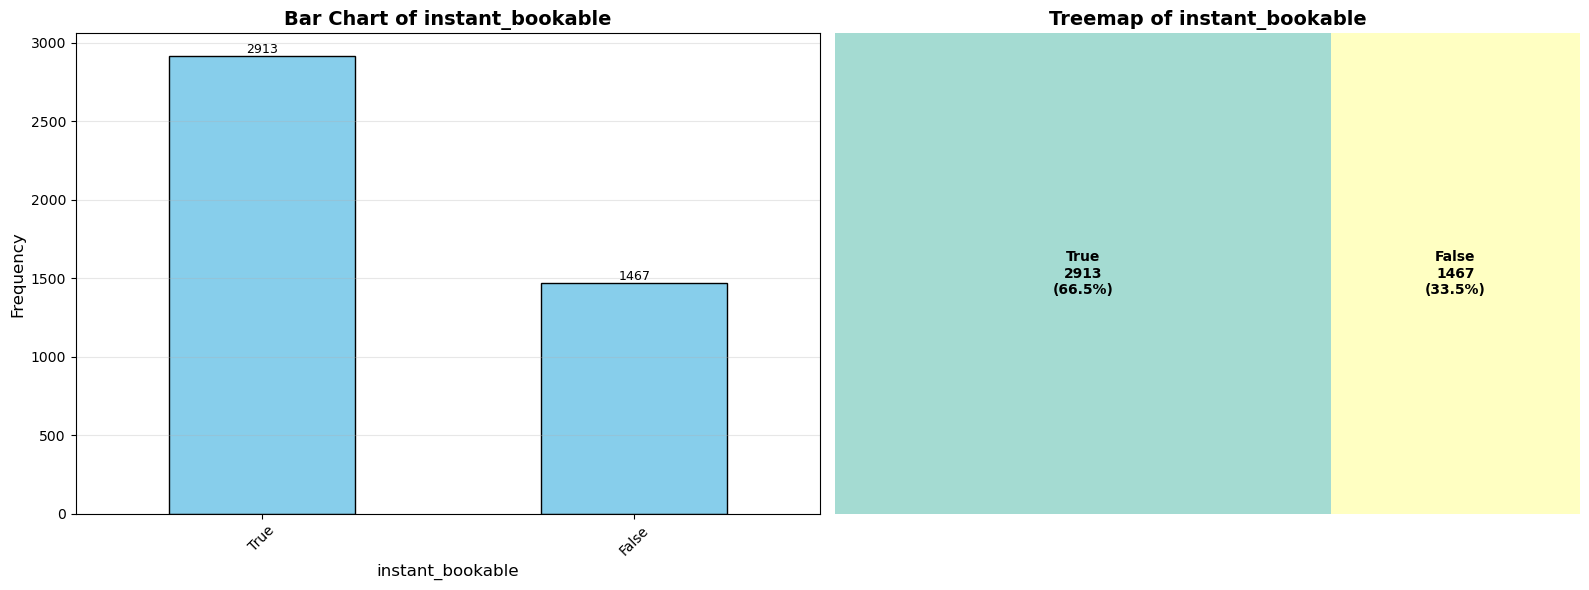

In [52]:
analyze_categorical_variable(df["instant_bookable"])

### Numerical

0 - distance to center km

DESCRIPTIVE STATISTICS: distance_to_center_km

Central Tendency:
  Mean:           1.88
  Median:         1.59
  Mode:           1.6805160266972483

Dispersion:
  Std Dev:        1.30
  Variance:       1.68
  Range:          9.17
  IQR:            1.03

Quartiles:
  Min (0%):       0.02
  Q1 (25%):       1.12
  Q2 (50%):       1.59
  Q3 (75%):       2.15
  Max (100%):     9.19

Shape:
  Skewness:       1.984
  Kurtosis:       4.983

Sample Size:
  Valid:          4379
  Missing:        0
  Total:          4379


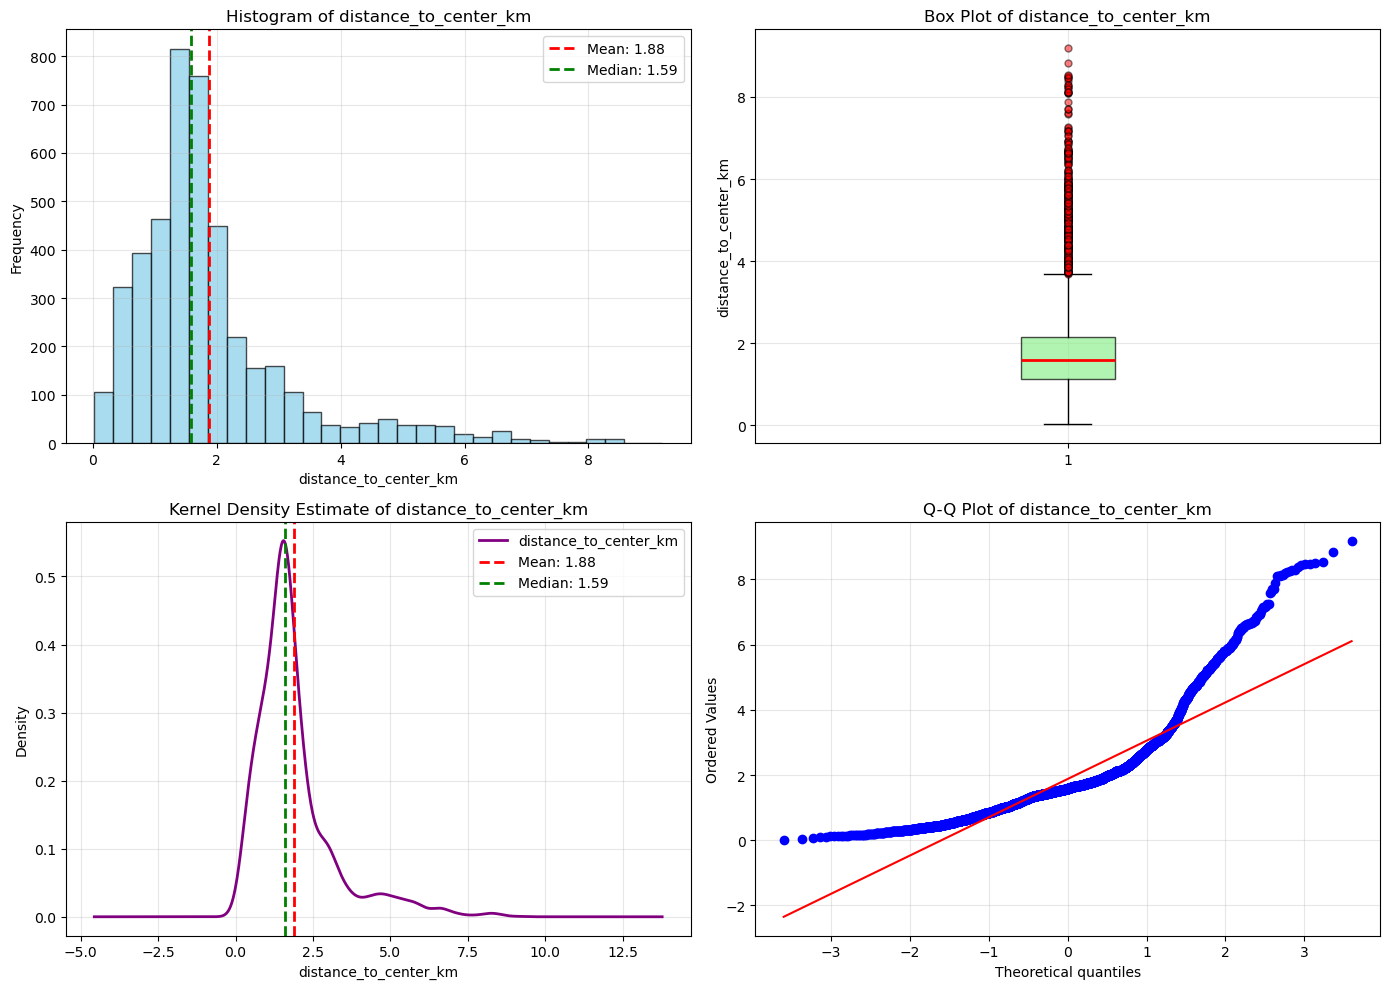

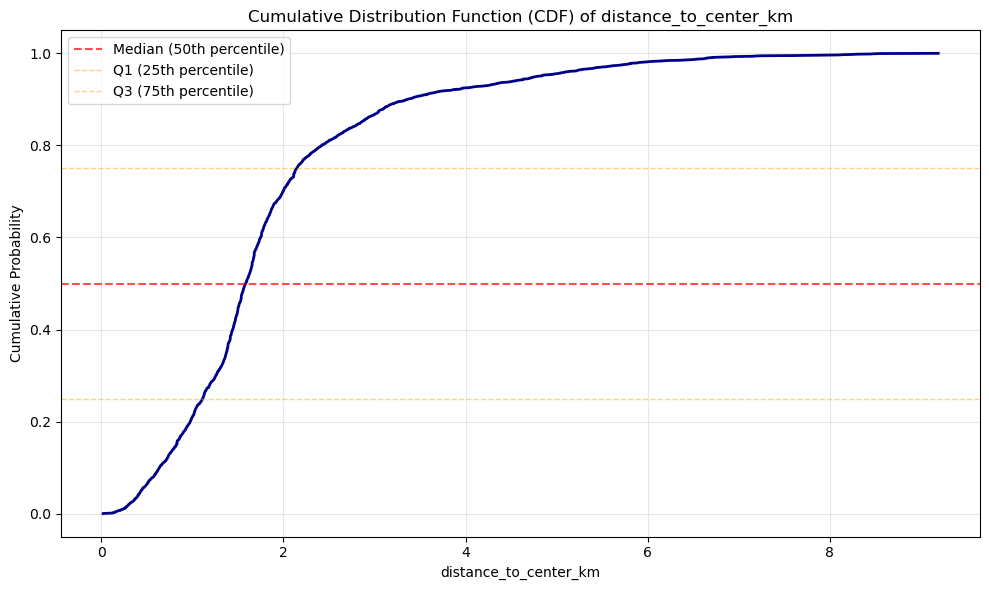

In [12]:
analyze_numeric_variable(df["distance_to_center_km"])

1 - price

In [61]:
df["price"].sort_values(ascending=False).head()

3339    9000.0
3323    2055.0
3601    1037.0
3599    1037.0
582     1000.0
Name: price, dtype: float64

DESCRIPTIVE STATISTICS: price

Central Tendency:
  Mean:           66.28
  Median:         54.50
  Mode:           44.0

Dispersion:
  Std Dev:        51.23
  Variance:       2624.38
  Range:          990.00
  IQR:            30.00

Quartiles:
  Min (0%):       10.00
  Q1 (25%):       44.00
  Q2 (50%):       54.50
  Q3 (75%):       74.00
  Max (100%):     1000.00

Shape:
  Skewness:       9.356
  Kurtosis:       138.879

Sample Size:
  Valid:          4170
  Missing:        209
  Total:          4379


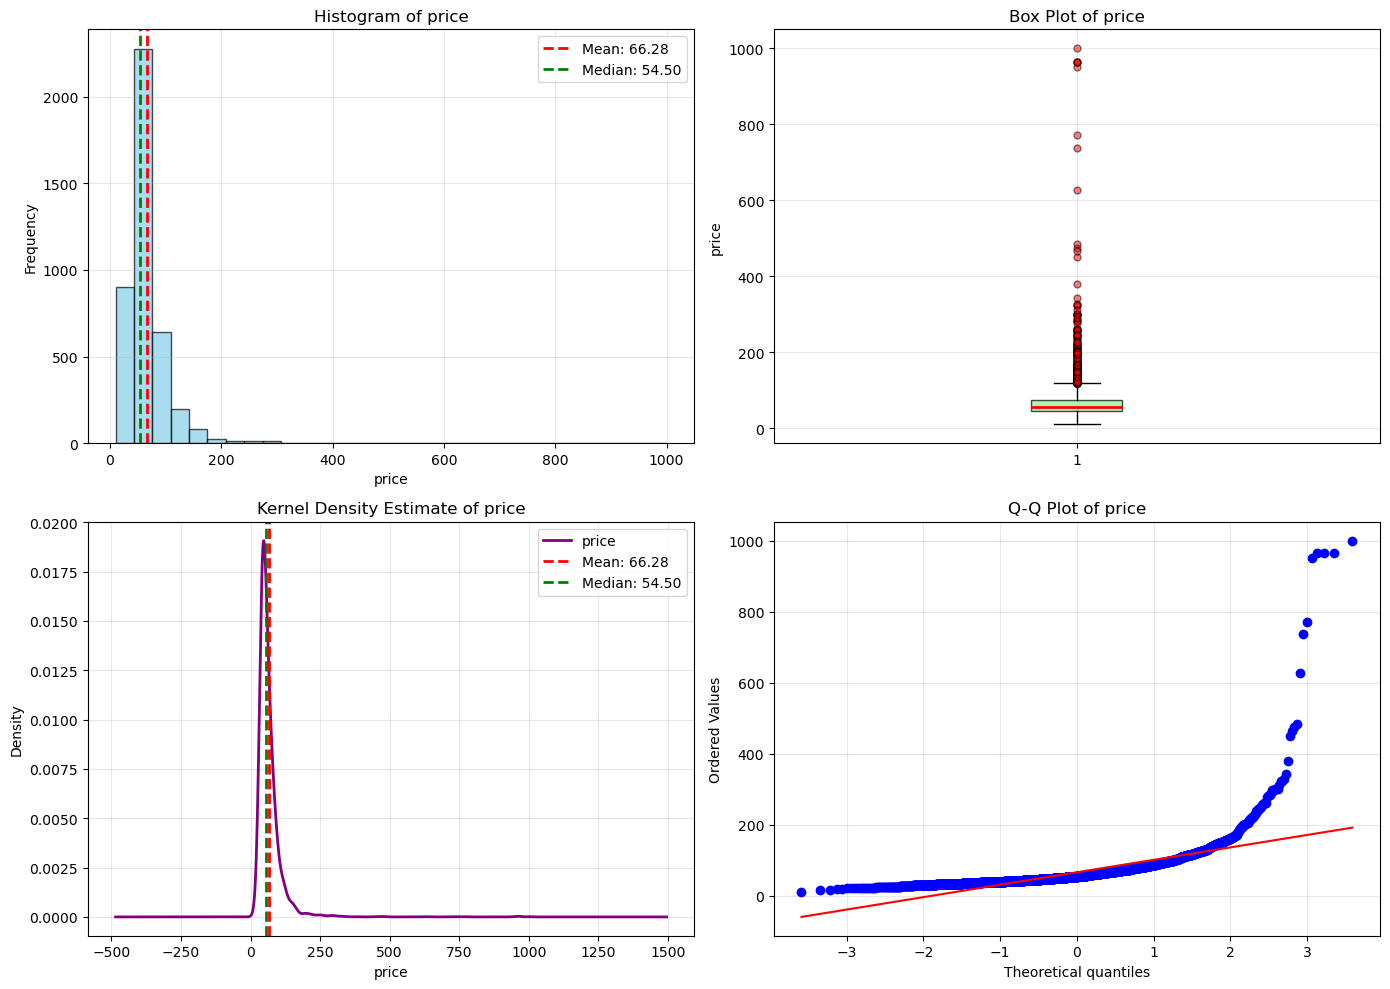

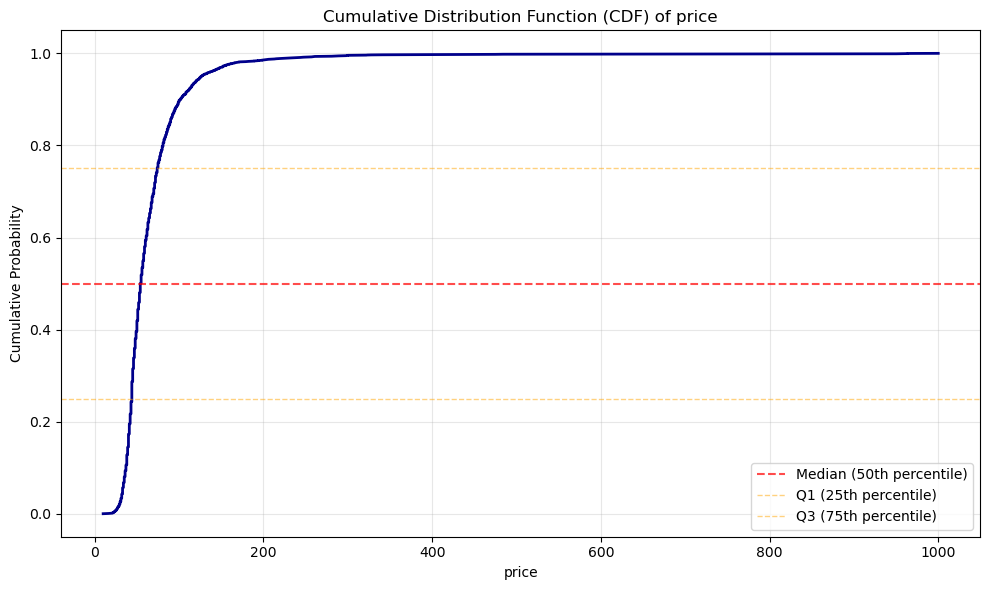

In [64]:
analyze_numeric_variable(df["price"])

2 - estimated revenue

DESCRIPTIVE STATISTICS: estimated_revenue_l365d

Central Tendency:
  Mean:           4002.38
  Median:         1980.00
  Mode:           0.0

Dispersion:
  Std Dev:        5747.88
  Variance:       33038118.24
  Range:          109896.00
  IQR:            5242.50

Quartiles:
  Min (0%):       0.00
  Q1 (25%):       469.50
  Q2 (50%):       1980.00
  Q3 (75%):       5712.00
  Max (100%):     109896.00

Shape:
  Skewness:       5.164
  Kurtosis:       61.287

Sample Size:
  Valid:          4170
  Missing:        209
  Total:          4379


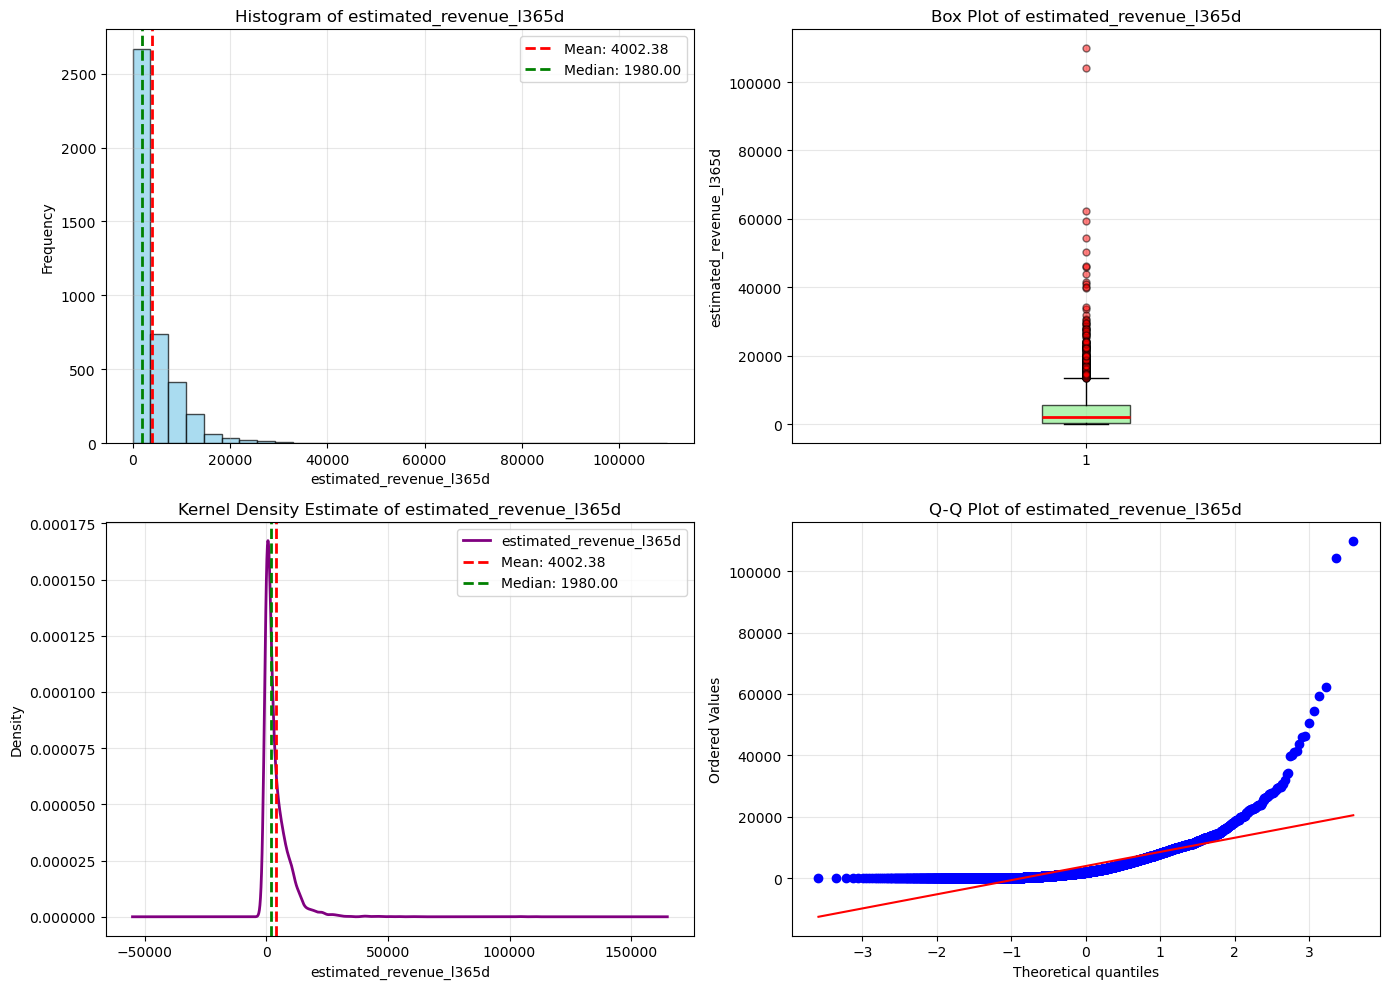

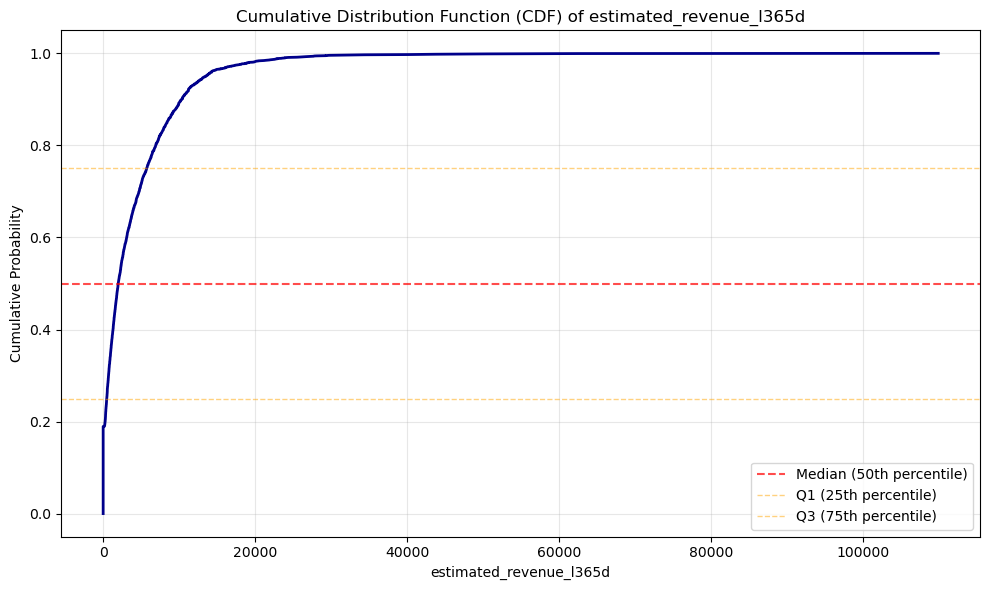

In [65]:
analyze_numeric_variable(df["estimated_revenue_l365d"])

3 - estimated occupnacy

DESCRIPTIVE STATISTICS: estimated_occupancy_l365d

Central Tendency:
  Mean:           66.87
  Median:         36.00
  Mode:           0

Dispersion:
  Std Dev:        75.67
  Variance:       5725.20
  Range:          255.00
  IQR:            102.00

Quartiles:
  Min (0%):       0.00
  Q1 (25%):       6.00
  Q2 (50%):       36.00
  Q3 (75%):       108.00
  Max (100%):     255.00

Shape:
  Skewness:       1.202
  Kurtosis:       0.328

Sample Size:
  Valid:          4379
  Missing:        0
  Total:          4379


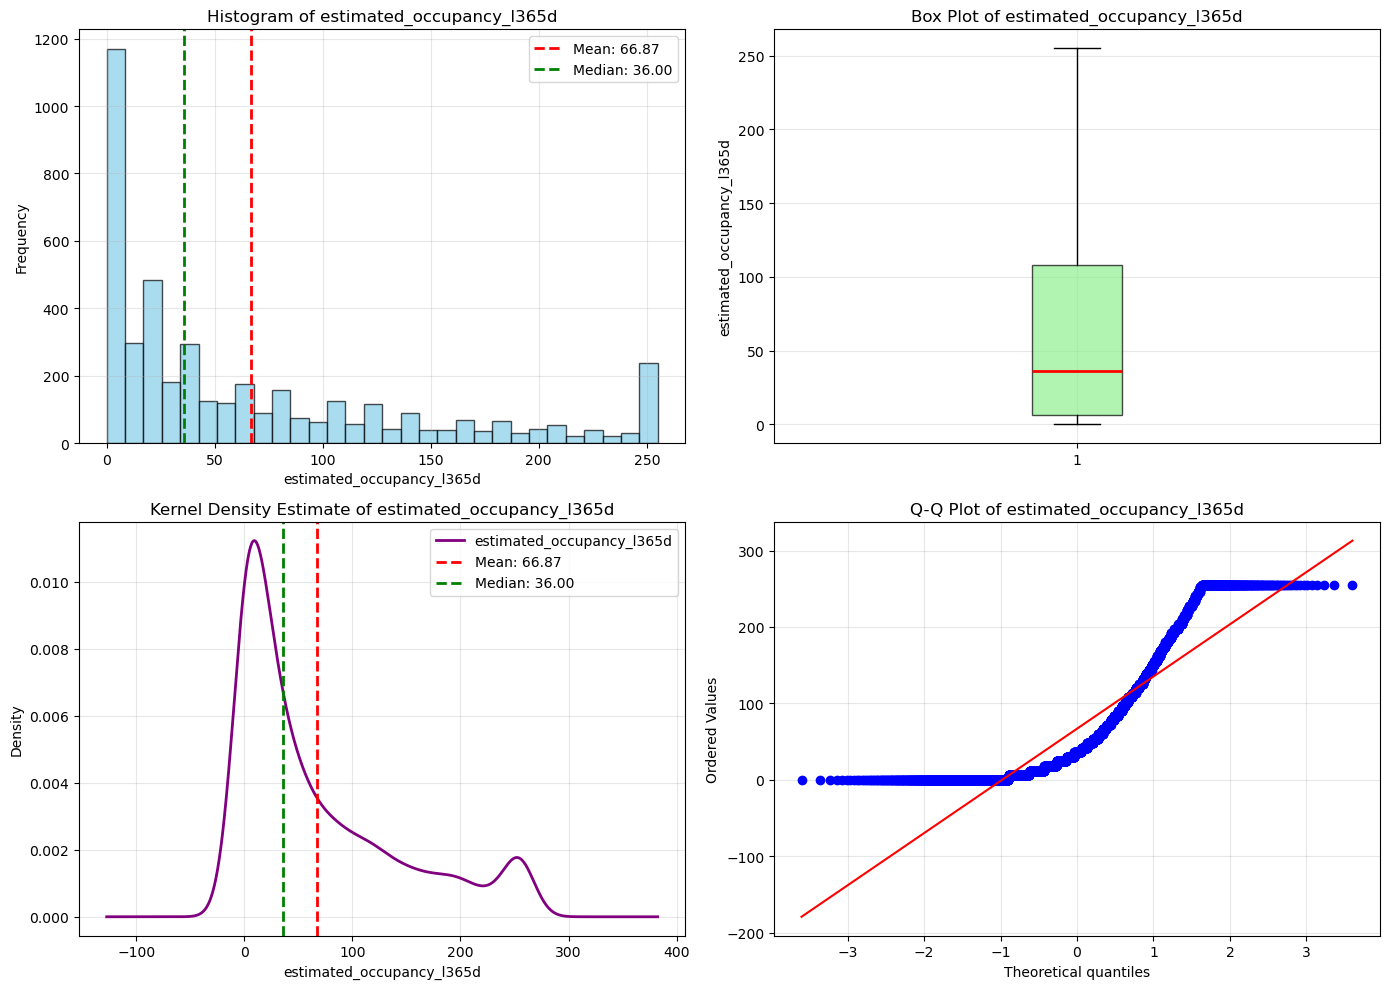

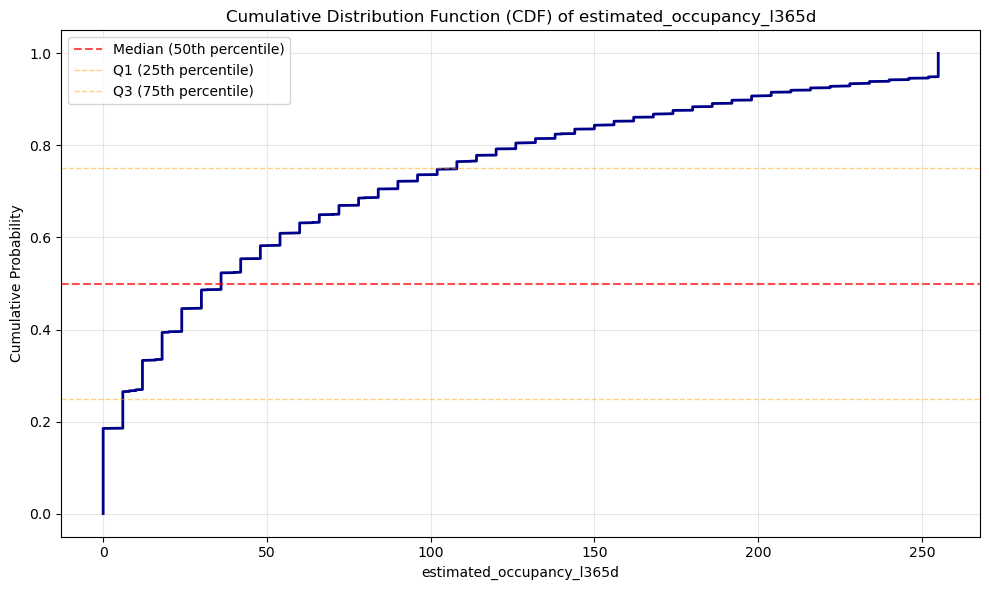

In [66]:
analyze_numeric_variable(df["estimated_occupancy_l365d"])

4 - reviews ltm

DESCRIPTIVE STATISTICS: number_of_reviews_ltm

Central Tendency:
  Mean:           11.65
  Median:         6.00
  Mode:           0

Dispersion:
  Std Dev:        15.26
  Variance:       232.85
  Range:          129.00
  IQR:            16.00

Quartiles:
  Min (0%):       0.00
  Q1 (25%):       1.00
  Q2 (50%):       6.00
  Q3 (75%):       17.00
  Max (100%):     129.00

Shape:
  Skewness:       2.310
  Kurtosis:       7.396

Sample Size:
  Valid:          4379
  Missing:        0
  Total:          4379


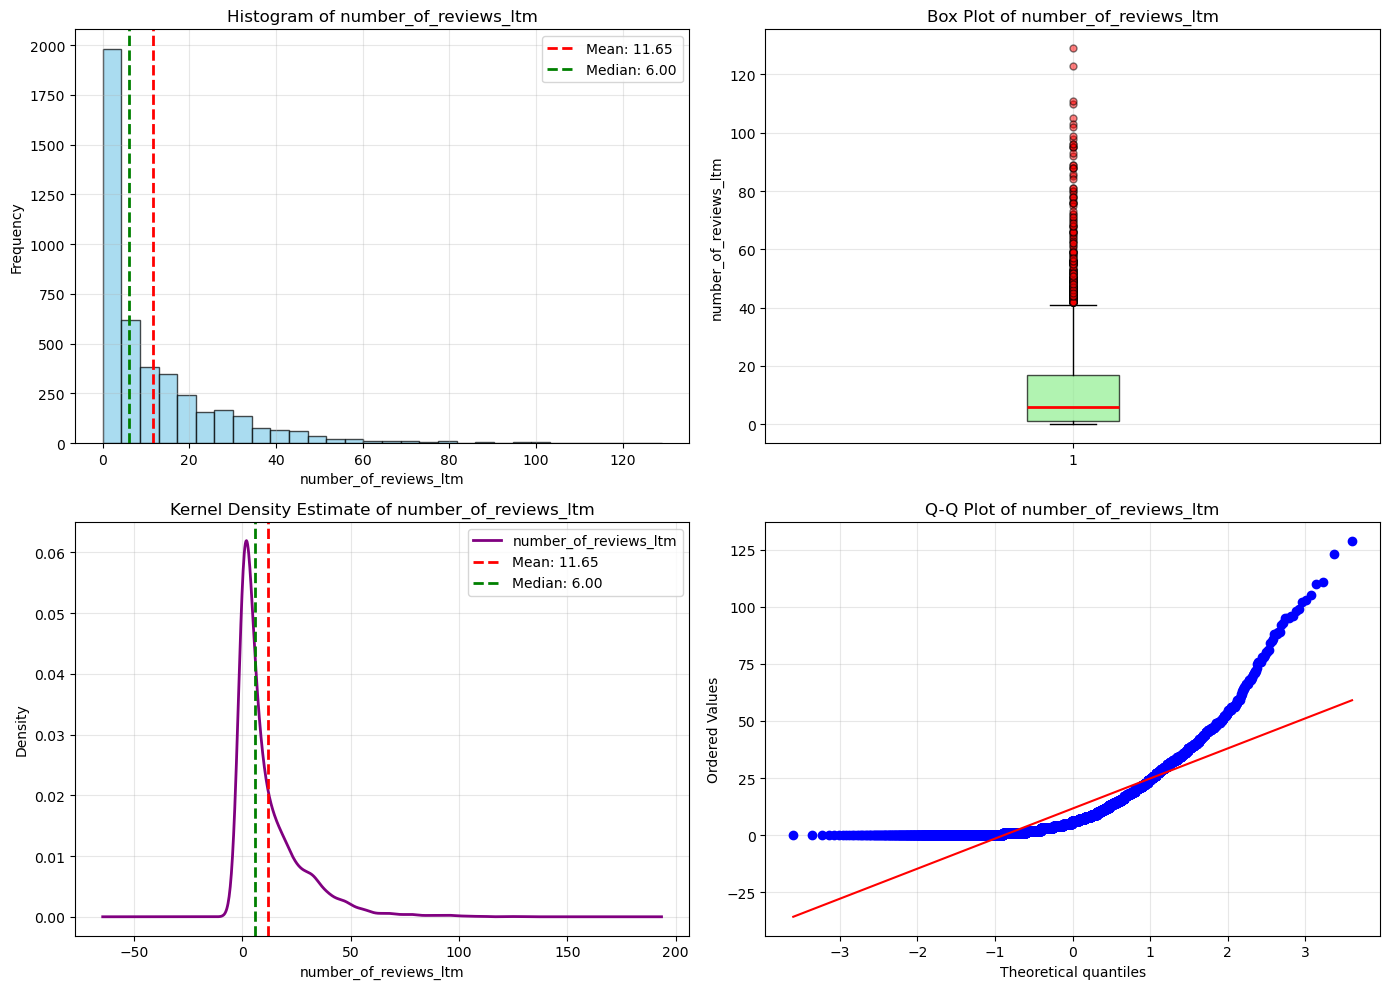

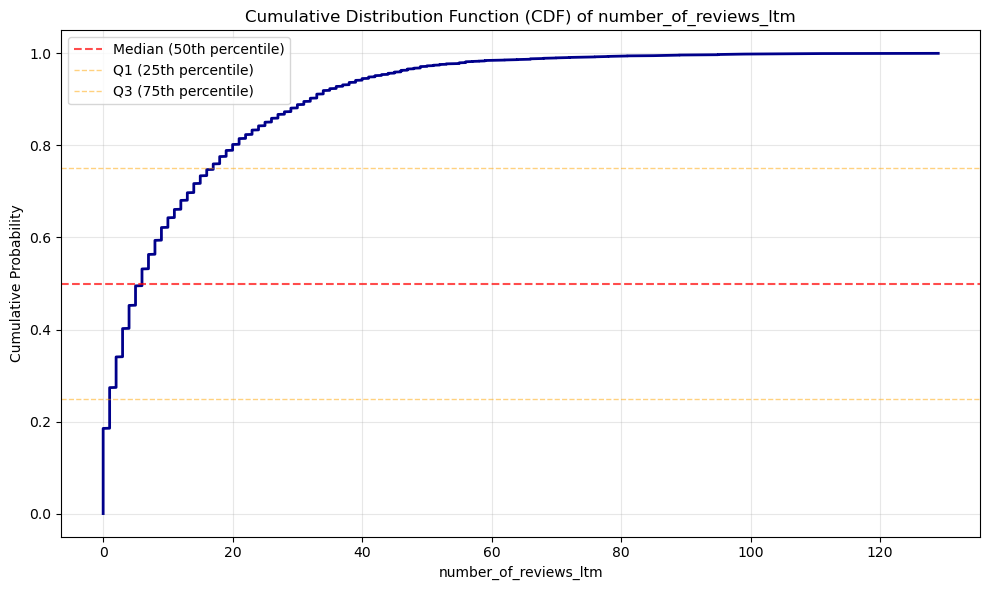

In [67]:
analyze_numeric_variable(df["number_of_reviews_ltm"])

5 - review rating

DESCRIPTIVE STATISTICS: review_scores_rating

Central Tendency:
  Mean:           4.73
  Median:         4.85
  Mode:           5.0

Dispersion:
  Std Dev:        0.40
  Variance:       0.16
  Range:          4.00
  IQR:            0.30

Quartiles:
  Min (0%):       1.00
  Q1 (25%):       4.67
  Q2 (50%):       4.85
  Q3 (75%):       4.97
  Max (100%):     5.00

Shape:
  Skewness:       -3.913
  Kurtosis:       23.943

Sample Size:
  Valid:          3918
  Missing:        461
  Total:          4379


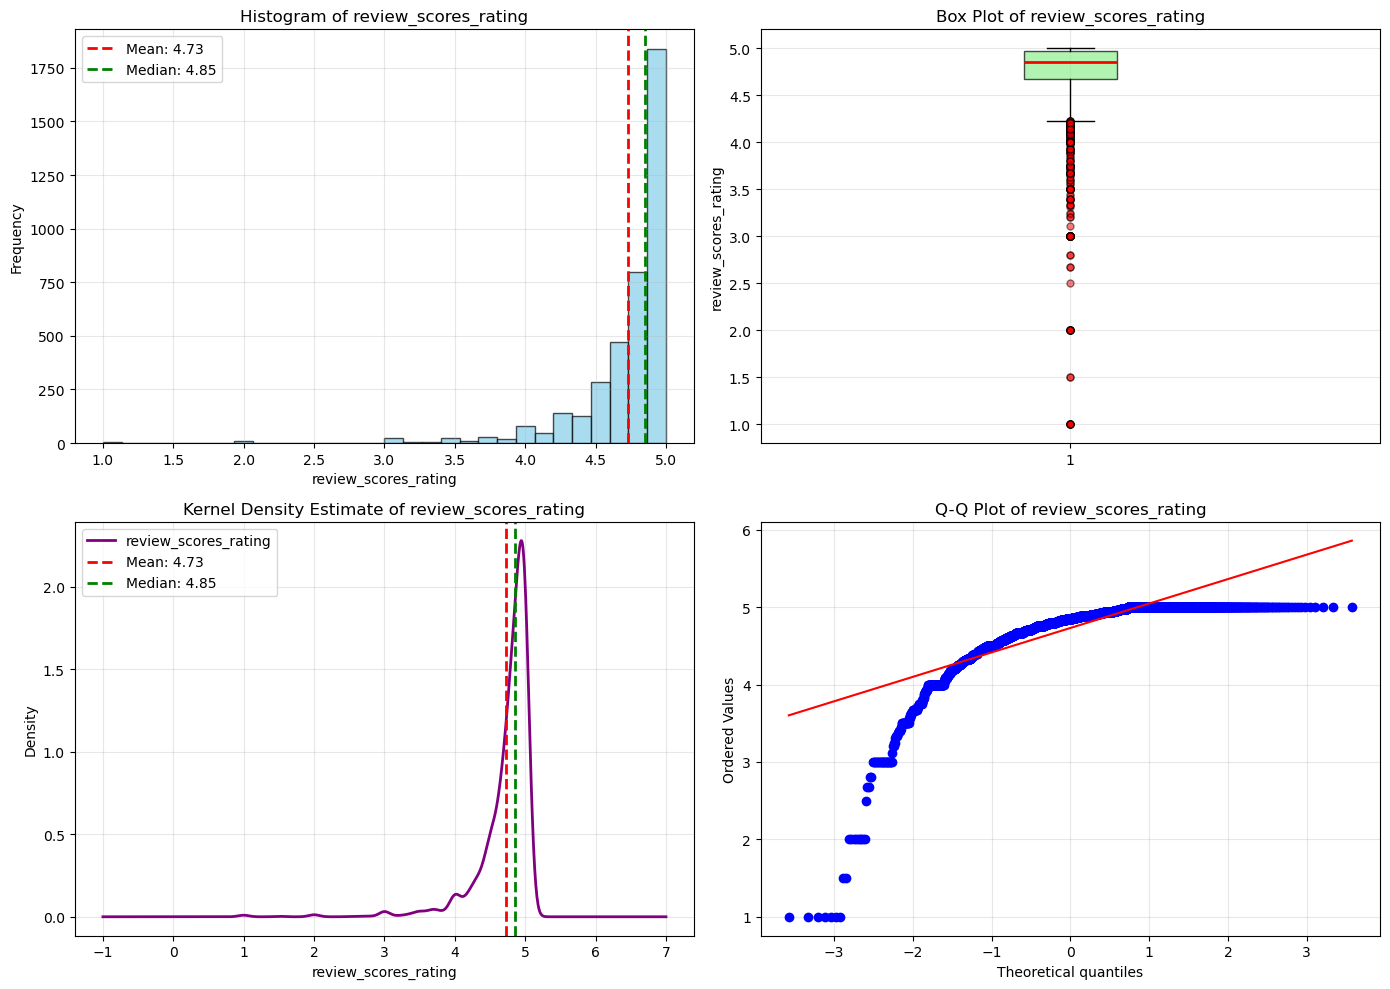

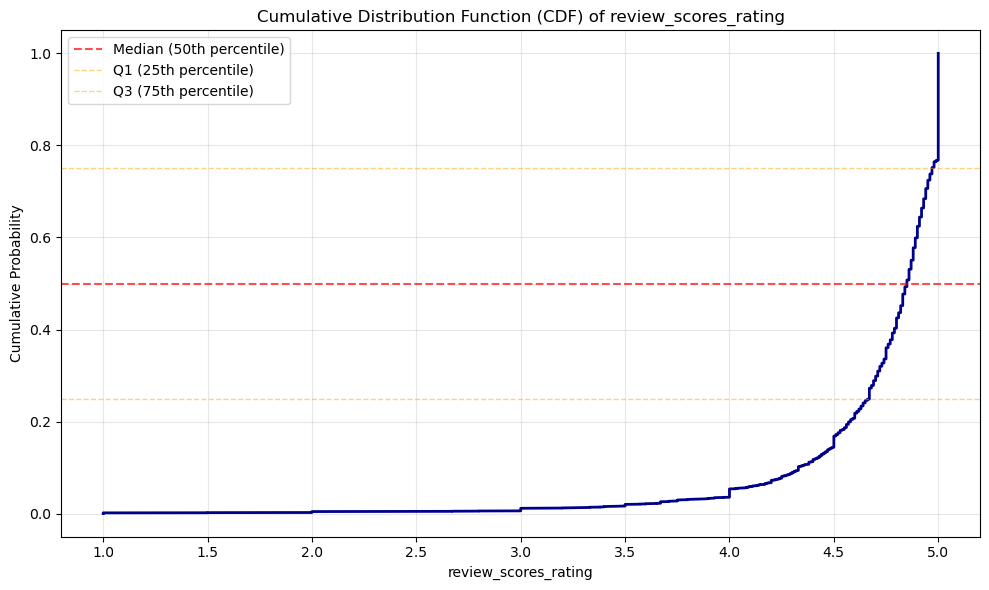

In [68]:
analyze_numeric_variable(df["review_scores_rating"])

6 - value rating

DESCRIPTIVE STATISTICS: review_scores_value

Central Tendency:
  Mean:           4.68
  Median:         4.78
  Mode:           5.0

Dispersion:
  Std Dev:        0.40
  Variance:       0.16
  Range:          4.00
  IQR:            0.32

Quartiles:
  Min (0%):       1.00
  Q1 (25%):       4.59
  Q2 (50%):       4.78
  Q3 (75%):       4.91
  Max (100%):     5.00

Shape:
  Skewness:       -3.835
  Kurtosis:       23.733

Sample Size:
  Valid:          3918
  Missing:        461
  Total:          4379


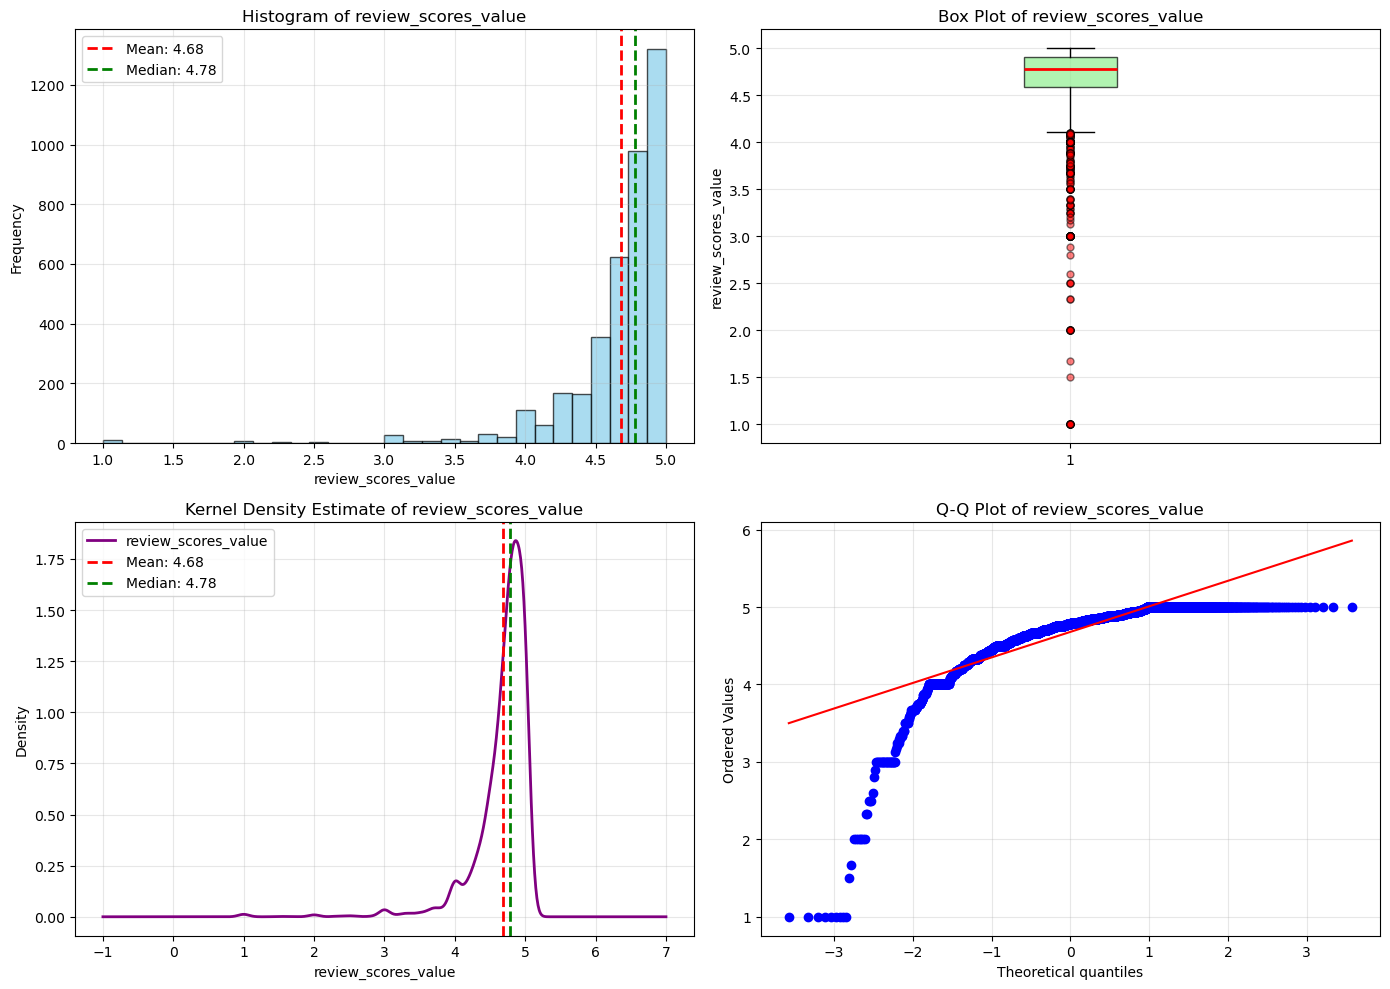

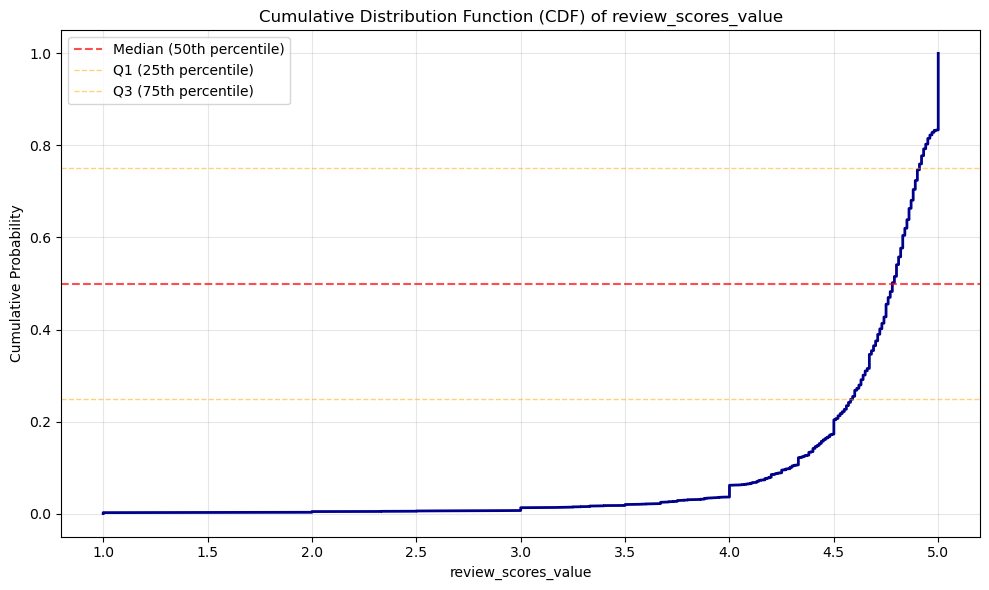

In [69]:
analyze_numeric_variable(df["review_scores_value"])

7 - host total listings

DESCRIPTIVE STATISTICS: host_total_listings_count

Central Tendency:
  Mean:           55.86
  Median:         5.00
  Mode:           1

Dispersion:
  Std Dev:        125.28
  Variance:       15694.59
  Range:          1037.00
  IQR:            32.00

Quartiles:
  Min (0%):       1.00
  Q1 (25%):       1.00
  Q2 (50%):       5.00
  Q3 (75%):       33.00
  Max (100%):     1038.00

Shape:
  Skewness:       3.543
  Kurtosis:       16.814

Sample Size:
  Valid:          4155
  Missing:        224
  Total:          4379


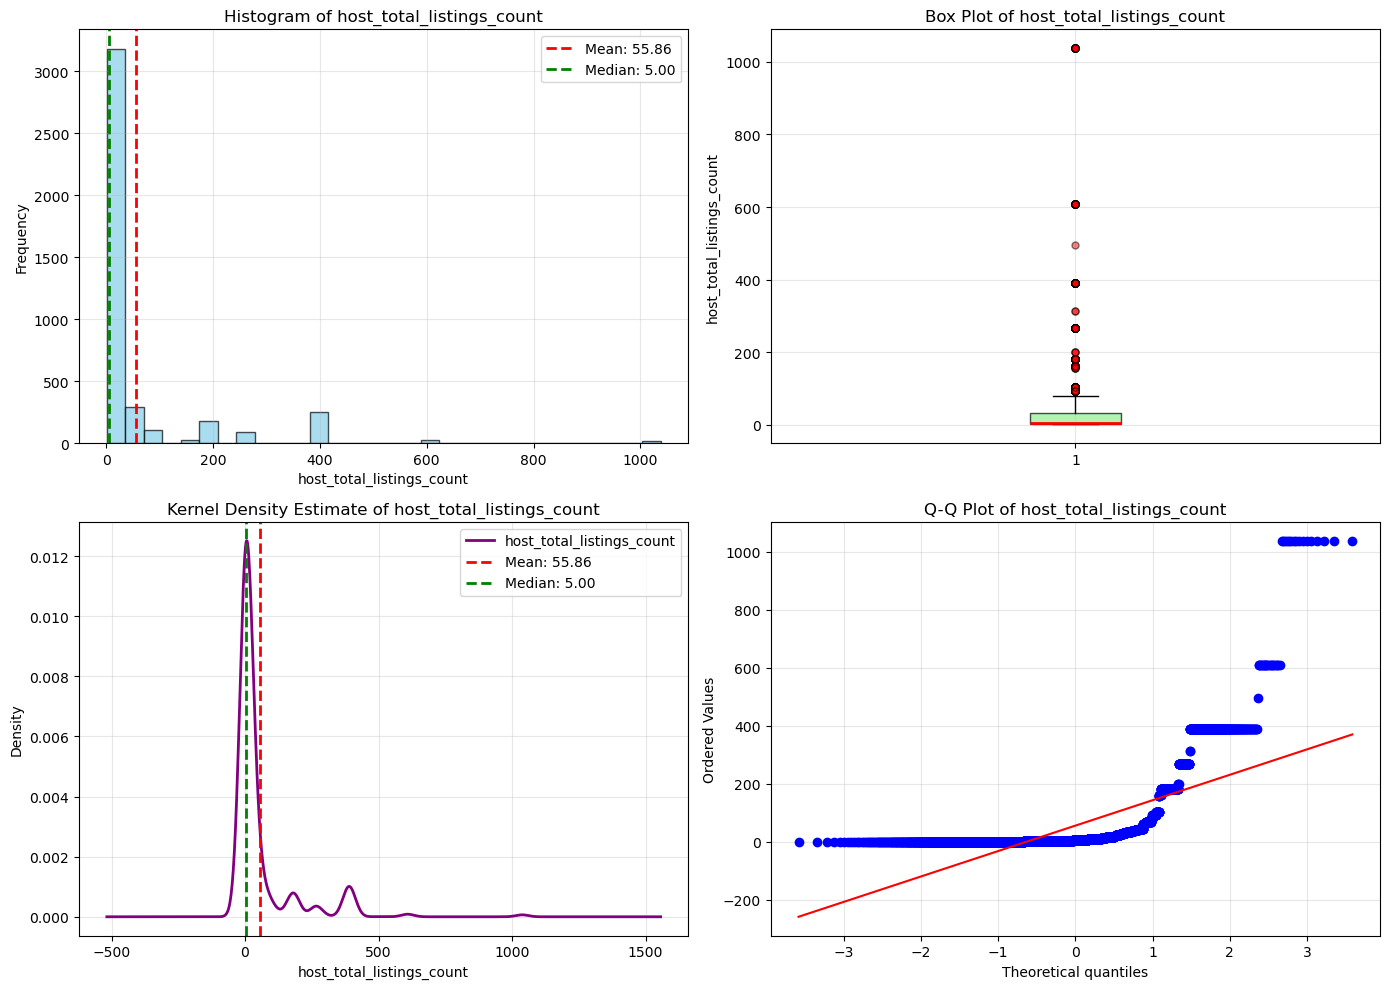

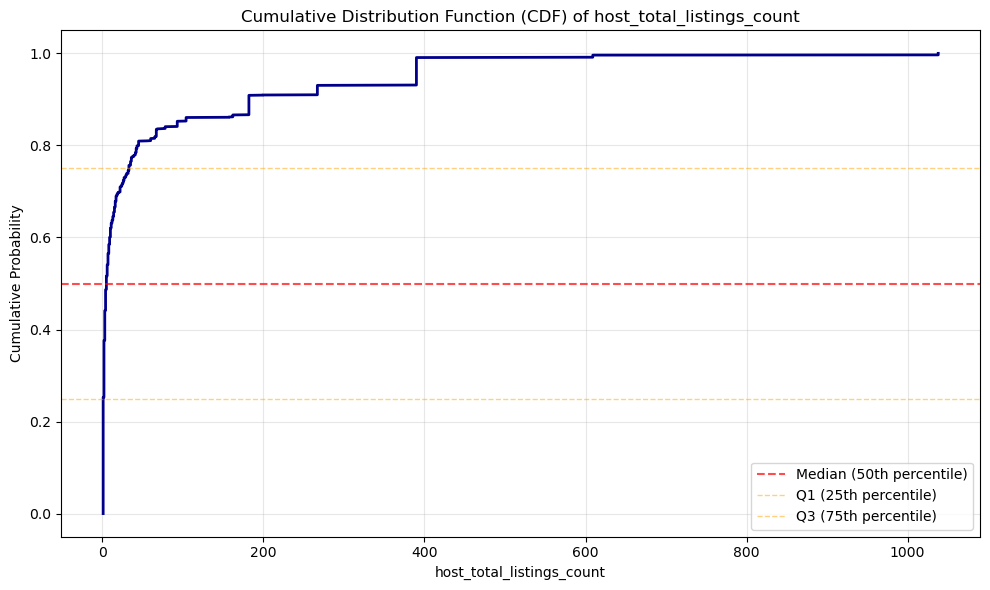

In [70]:
analyze_numeric_variable(df["host_total_listings_count"])

accomodates, bedrooms, bathrooms, beds

8 - accomodates

DESCRIPTIVE STATISTICS: accommodates

Central Tendency:
  Mean:           3.63
  Median:         4.00
  Mode:           4

Dispersion:
  Std Dev:        1.58
  Variance:       2.50
  Range:          15.00
  IQR:            2.00

Quartiles:
  Min (0%):       1.00
  Q1 (25%):       2.00
  Q2 (50%):       4.00
  Q3 (75%):       4.00
  Max (100%):     16.00

Shape:
  Skewness:       1.777
  Kurtosis:       6.959

Sample Size:
  Valid:          4379
  Missing:        0
  Total:          4379


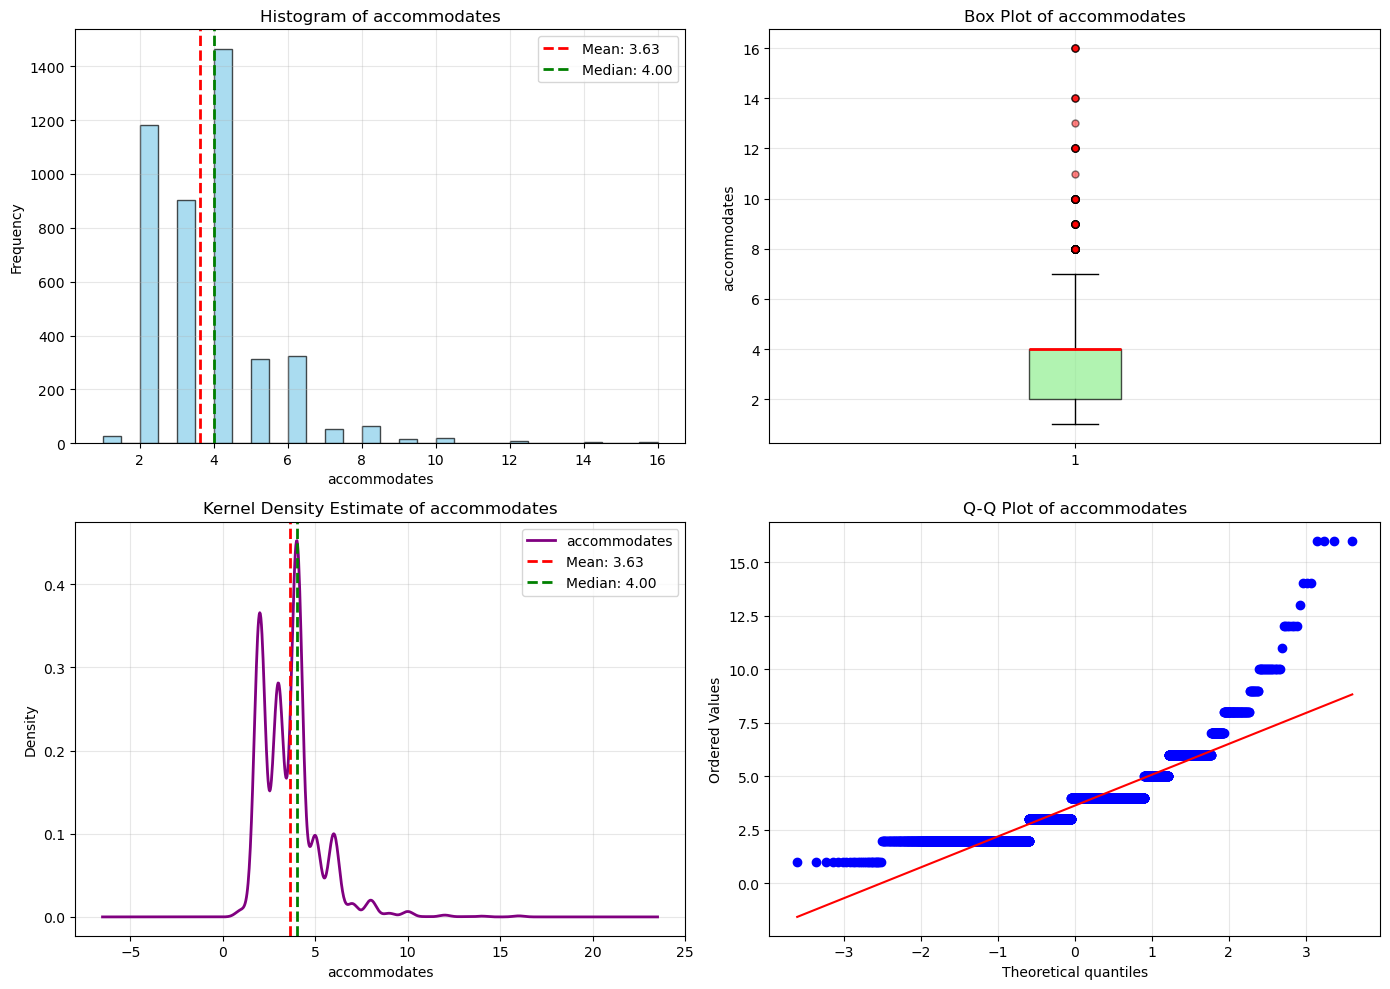

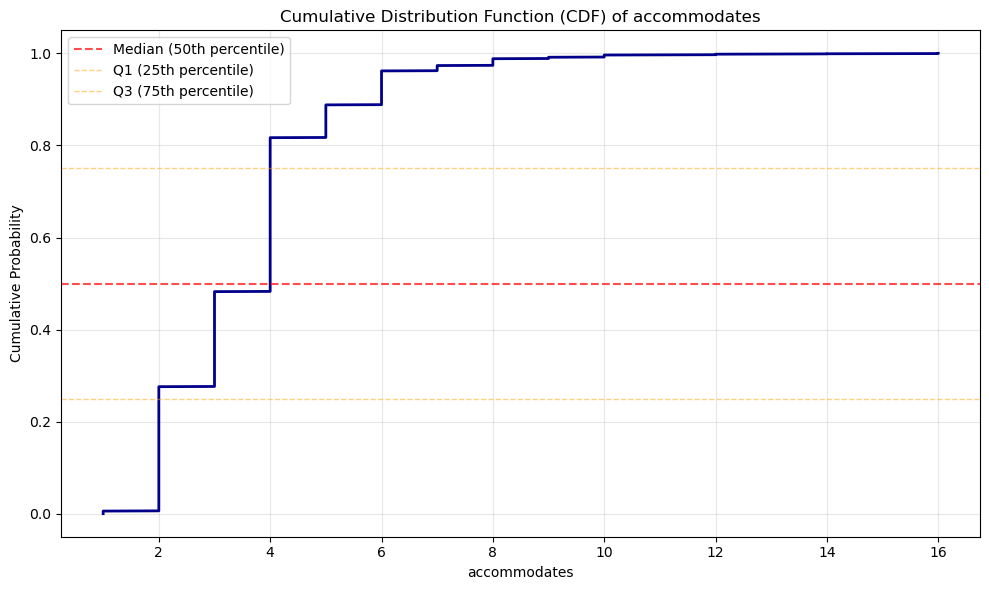

In [14]:
analyze_numeric_variable(df["accommodates"])

<hr>

In [21]:
df.columns

Index(['id', 'name', 'host_id', 'host_since', 'host_location',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_total_listings_count',
       'host_identity_verified', 'neighbourhood', 'neighbourhood_cleansed',
       'latitude', 'longitude', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'price', 'minimum_nights',
       'maximum_nights', 'calendar_updated', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'number_of_reviews', 'number_of_reviews_ltm',
       'availability_eoy', 'number_of_reviews_ly', 'estimated_occupancy_l365d',
       'estimated_revenue_l365d', 'first_review', 'last_review',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'license', 'instant_booka

In [6]:
df_5 = df[['id', 'host_id', 
       'host_is_superhost', 'host_total_listings_count','neighbourhood_cleansed',
       'latitude', 'longitude', 'property_type', 'room_type', 'accommodates','price', 'minimum_nights',
       'maximum_nights', 
       'availability_365', 'number_of_reviews', 'number_of_reviews_ltm',
       'availability_eoy', 'number_of_reviews_ly', 'estimated_occupancy_l365d',
       'estimated_revenue_l365d', 'first_review', 'last_review',
       'review_scores_rating', 'review_scores_location',
       'review_scores_value', 'instant_bookable',
       'reviews_per_month', 'Host_Category', 'distance_to_center_km',
       'distance_cat']]

### distance cat & neighbourhood level statistics

In [7]:
df_5.groupby("distance_cat")[['accommodates','price', 'number_of_reviews_ltm', 'estimated_occupancy_l365d',
       'estimated_revenue_l365d', 'review_scores_rating',
     'review_scores_location', 'review_scores_value', 'reviews_per_month', 'distance_to_center_km'
    ]].agg(['mean', 'median']).round(2)

/tmp/ipykernel_1899/1261497617.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_5.groupby("distance_cat")[['accommodates','price', 'number_of_reviews_ltm', 'estimated_occupancy_l365d',


accommodates         price        number_of_reviews_ltm  \
                              mean median   mean median                  mean   
distance_cat                                                                    
Downtown (<1km)               3.97    4.0  79.38   68.0                 14.69   
Inner City (1-3km)            3.47    3.0  61.43   51.0                 11.24   
Neighborhoods (3-6km)         3.81    4.0  67.73   60.0                  8.96   
Suburban (>6km)               4.22    4.0  92.16   71.0                  8.32   

                             estimated_occupancy_l365d         \
                      median                      mean median   
distance_cat                                                    
Downtown (<1km)          7.0                     78.42   42.0   
Inner City (1-3km)       6.0                     65.67   36.0   
Neighborhoods (3-6km)    4.0                     55.38   24.0   
Suburban (>6km)          5.0                     49.49   30.0   

                      estimated_revenue_l365d         review_scores_rating  \
                                         mean  median                 mean   
distance_cat                                                                 
Downtown (<1km)                       5712.83  3324.0                 4.78   
Inner City (1-3km)                    3620.93  1836.0                 4.70   
Neighborhoods (3-6km)                 3432.51  1728.0                 4.81   
Suburban (>6km)                       3072.01  2208.0                 4.76   

                             review_scores_location         \
                      median                   mean median   
distance_cat                                                 
Downtown (<1km)         4.88                   4.91   4.96   
Inner City (1-3km)      4.82                   4.67   4.75   
Neighborhoods (3-6km)   4.89                   4.69   4.80   
Suburban (>6km)         4.89                   4.72   4.86   

                      review_scores_value        reviews_per_month         \
                                     mean median              mean median   
distance_cat                                                                
Downtown (<1km)                      4.73   4.82              1.65   1.18   
Inner City (1-3km)                   4.65   4.76              1.48   1.08   
Neighborhoods (3-6km)                4.73   4.80              1.17   0.89   
Suburban (>6km)                      4.65   4.78              1.01   0.72   

                      distance_to_center_km         
                                       mean median  
distance_cat                                        
Downtown (<1km)                        0.64   0.66  
Inner City (1-3km)                     1.73   1.65  
Neighborhoods (3-6km)                  4.15   3.97  
Suburban (>6km)                        7.05   6.71

In [32]:
df_5["distance_cat"].value_counts()

distance_cat
Inner City (1-3km)       2880
Downtown (<1km)           918
Neighborhoods (3-6km)     500
Suburban (>6km)            81
Name: count, dtype: int64

In [28]:
df_5.loc[df_5['neighbourhood_cleansed'] == 'Pavlou Mela'].sort_values(by='estimated_revenue_l365d', ascending=False).head(10)

id    host_id host_is_superhost  host_total_listings_count  \
1271  PROP_5812  HOST_F999              True                          1   
2049  PROP_E594  HOST_8200              None                         36   
1898  PROP_D988  HOST_8200              None                         36   
1166  PROP_3E7D  HOST_9B08              True                          2   
1358  PROP_83C7  HOST_3E06              True                          1   
2042  PROP_222D  HOST_8200              None                         36   
2259  PROP_196E  HOST_9DFE              True                          1   
1896  PROP_CA49  HOST_8200              None                         36   
2238  PROP_1575  HOST_8200              None                         36   
2306  PROP_A815  HOST_8200              None                         36   

     neighbourhood_cleansed  latitude  longitude       property_type  \
1271            Pavlou Mela   40.6799    22.9366        Entire condo   
2049            Pavlou Mela   40.6775    22.9349  Entire rental unit   
1898            Pavlou Mela   40.6768    22.9355  Entire rental unit   
1166            Pavlou Mela   40.6664    22.9288         Entire home   
1358            Pavlou Mela   40.6550    22.9533        Entire condo   
2042            Pavlou Mela   40.6778    22.9351  Entire rental unit   
2259            Pavlou Mela   40.6789    22.9365  Entire rental unit   
1896            Pavlou Mela   40.6775    22.9348  Entire rental unit   
2238            Pavlou Mela   40.6853    22.9301  Entire rental unit   
2306            Pavlou Mela   40.6852    22.9303  Entire rental unit   

            room_type  accommodates  ...  last_review  review_scores_rating  \
1271  Entire home/apt             6  ...   2025-06-13                  4.91   
2049  Entire home/apt             6  ...   2025-06-22                  4.88   
1898  Entire home/apt             4  ...   2025-06-16                  4.85   
1166  Entire home/apt             4  ...   2025-05-19                  4.91   
1358  Entire home/apt             5  ...   2025-06-16                  4.80   
2042  Entire home/apt             4  ...   2025-06-18                  4.92   
2259  Entire home/apt             6  ...   2025-06-17                  4.94   
1896  Entire home/apt             5  ...   2025-06-06                  4.86   
2238  Entire home/apt             5  ...   2025-05-25                  4.90   
2306  Entire home/apt             5  ...   2025-06-21                  4.98   

      review_scores_location  review_scores_value     license  \
1271                    4.53                 4.88  LIC_485D6F   
2049                    4.65                 4.75  LIC_285C10   
1898                    4.57                 4.82  LIC_42A773   
1166                    4.75                 4.75  LIC_709AEF   
1358                    4.35                 4.78  LIC_2C7871   
2042                    4.52                 4.87  LIC_53C87C   
2259                    4.55                 4.74  LIC_741BEE   
1896                    4.43                 4.87  LIC_B90F52   
2238                    4.59                 4.70  LIC_E11C34   
2306                    4.61                 4.84  LIC_15F3A7   

      instant_bookable  reviews_per_month      Host_Category  \
1271              True               5.28     Individual (1)   
2049              True               1.64   Large Multi (4+)   
1898              True               3.93   Large Multi (4+)   
1166              True               2.91  Small Multi (2-3)   
1358             False               3.13     Individual (1)   
2042              True               2.44   Large Multi (4+)   
2259              True               1.63     Individual (1)   
1896              True               2.83   Large Multi (4+)   
2238              True               2.89   Large Multi (4+)   
2306              True               2.47   Large Multi (4+)   

      distance_to_center_km           distance_cat  
1271               6.027860        Suburban (>6km)

### Bivariate analysis with distance to center

/home/fotis/pylab/repos/thess_airbnb/thess_airbnb/scripts/eda_functions.py:723: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


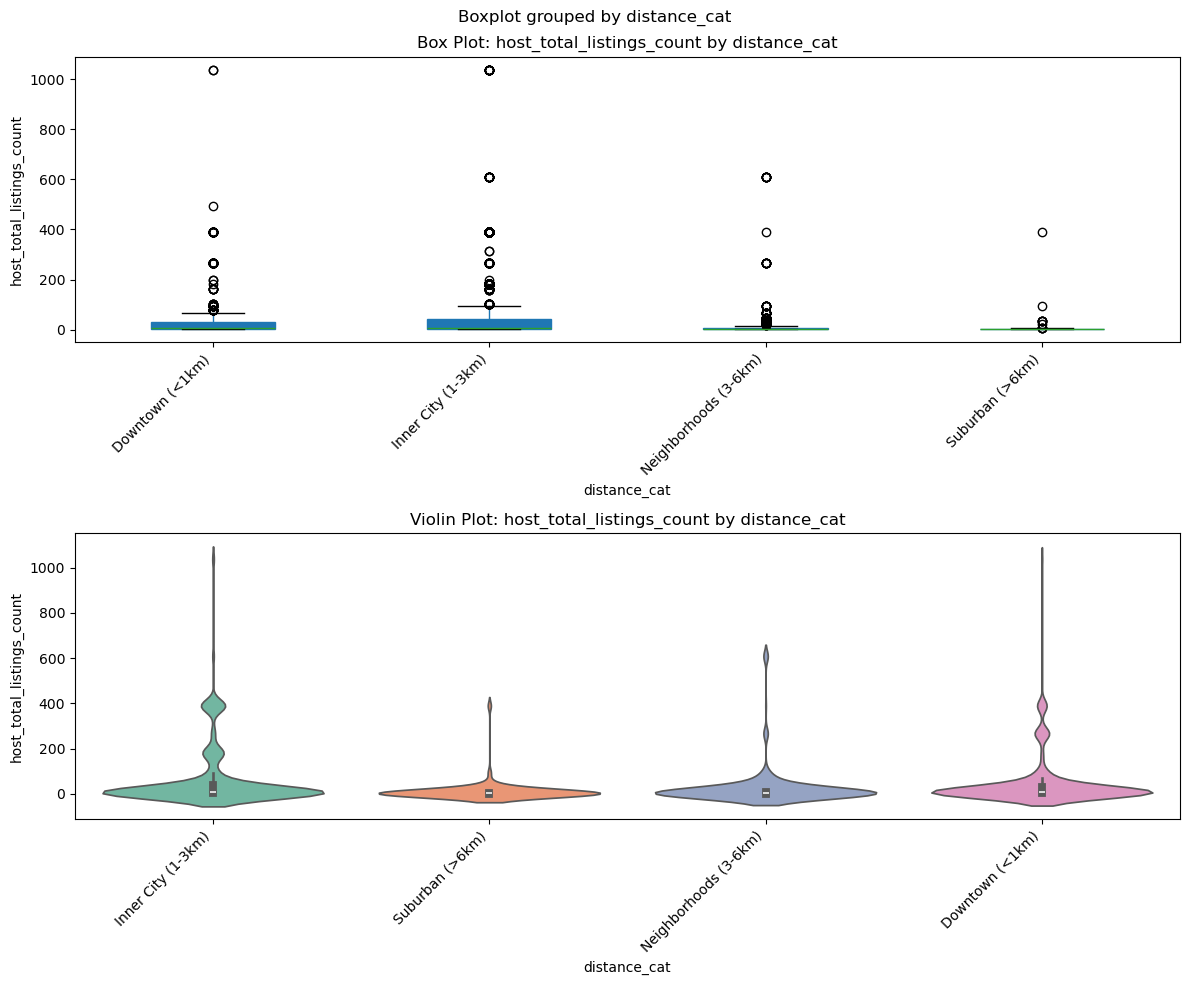

ONE-WAY ANOVA: host_total_listings_count by distance_cat

Descriptive Statistics by Group:

  distance_cat = Inner City (1-3km):
    N:      2735
    Mean:   66.0355
    Median: 6.0000
    Std:    137.1400
    Min:    1.0000
    Max:    1038.0000

  distance_cat = Suburban (>6km):
    N:      78
    Mean:   10.9231
    Median: 2.0000
    Std:    45.4486
    Min:    1.0000
    Max:    390.0000

  distance_cat = Neighborhoods (3-6km):
    N:      477
    Mean:   25.4361
    Median: 2.0000
    Std:    86.9857
    Min:    1.0000
    Max:    609.0000

  distance_cat = Downtown (<1km):
    N:      865
    Mean:   44.5064
    Median: 6.0000
    Std:    102.1840
    Min:    1.0000
    Max:    1038.0000

Test Statistics:
  Test:                One-Way ANOVA
  Test statistic:      21.4164
  P-value:             0.000000
  Eta-squared (η²):    0.015
  Effect size:         Small effect
  Significant at α=0.05: YES

Interpretation:
  SIGNIFICANT difference detected (p=0.000000). distance_cat has a 

/home/fotis/pylab/repos/thess_airbnb/thess_airbnb/scripts/eda_functions.py:723: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


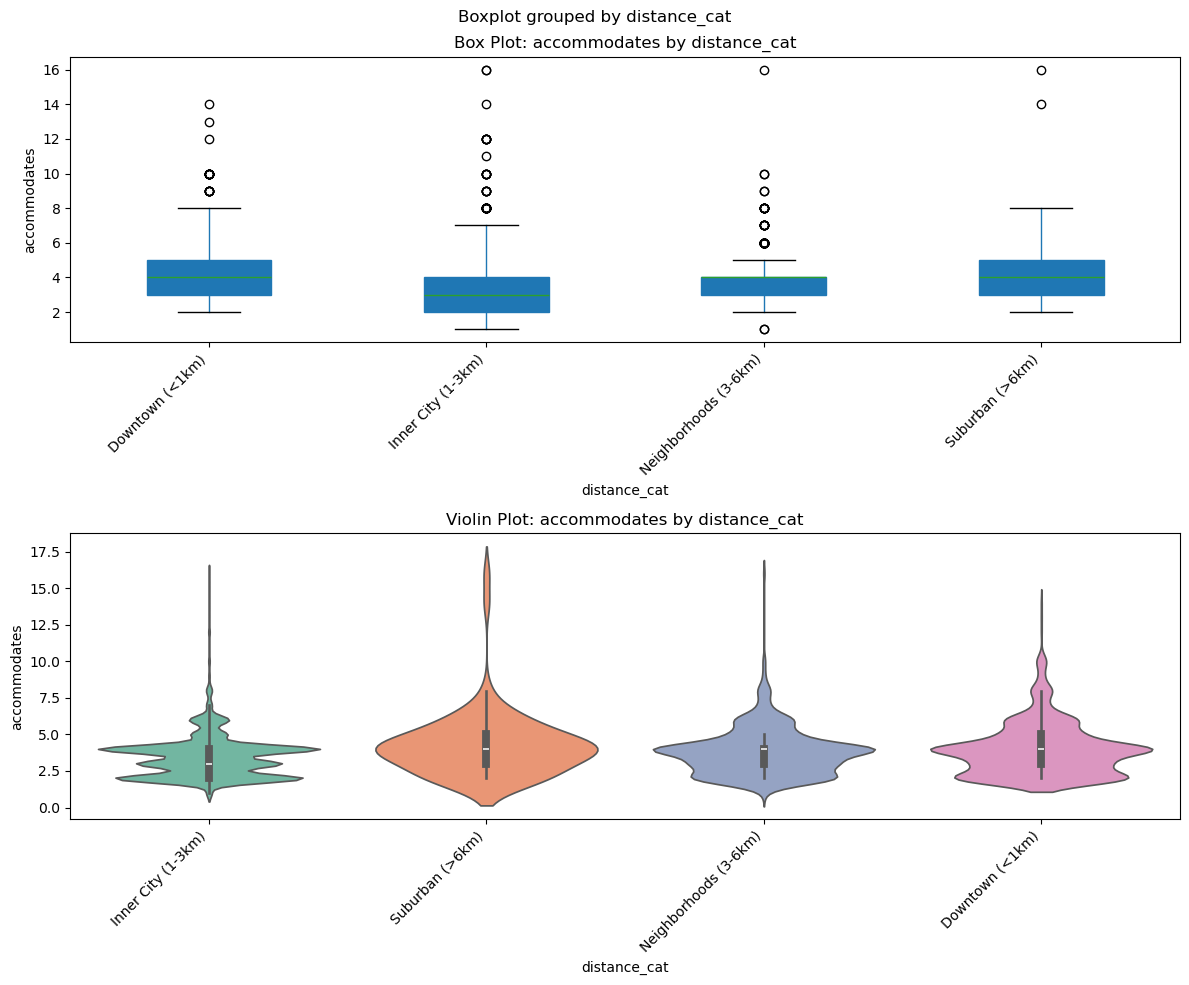

ONE-WAY ANOVA: accommodates by distance_cat

Descriptive Statistics by Group:

  distance_cat = Inner City (1-3km):
    N:      2880
    Mean:   3.4691
    Median: 3.0000
    Std:    1.4483
    Min:    1.0000
    Max:    16.0000

  distance_cat = Suburban (>6km):
    N:      81
    Mean:   4.2222
    Median: 4.0000
    Std:    2.2305
    Min:    2.0000
    Max:    16.0000

  distance_cat = Neighborhoods (3-6km):
    N:      500
    Mean:   3.8120
    Median: 4.0000
    Std:    1.5930
    Min:    1.0000
    Max:    16.0000

  distance_cat = Downtown (<1km):
    N:      918
    Mean:   3.9717
    Median: 4.0000
    Std:    1.8073
    Min:    2.0000
    Max:    14.0000

Test Statistics:
  Test:                One-Way ANOVA
  Test statistic:      30.8978
  P-value:             0.000000
  Eta-squared (η²):    0.021
  Effect size:         Small effect
  Significant at α=0.05: YES

Interpretation:
  SIGNIFICANT difference detected (p=0.000000). distance_cat has a significant effect on accommo

/home/fotis/pylab/repos/thess_airbnb/thess_airbnb/scripts/eda_functions.py:723: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


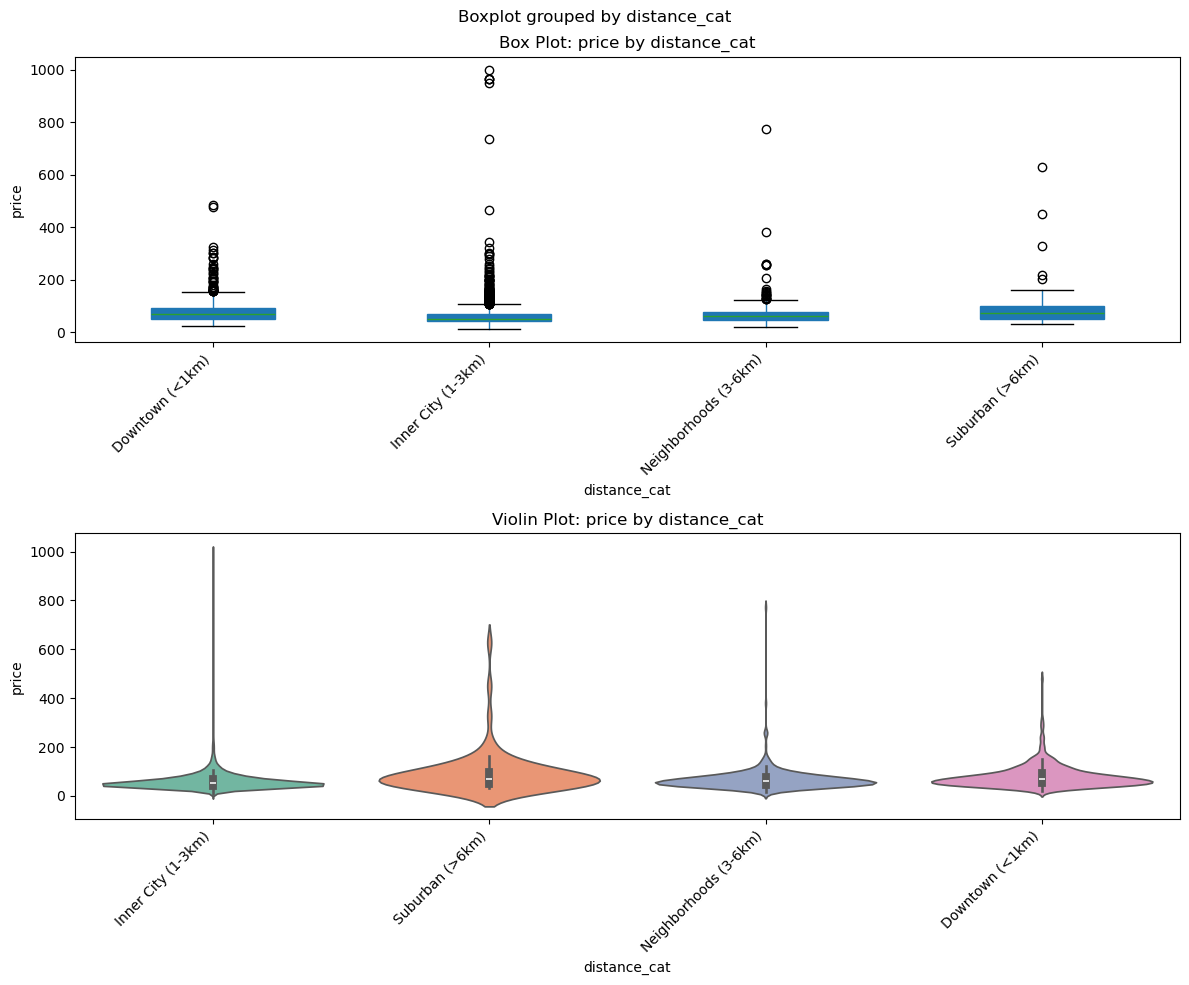

ONE-WAY ANOVA: price by distance_cat

Descriptive Statistics by Group:

  distance_cat = Inner City (1-3km):
    N:      2791
    Mean:   61.4274
    Median: 51.0000
    Std:    50.9923
    Min:    10.0000
    Max:    1000.0000

  distance_cat = Suburban (>6km):
    N:      79
    Mean:   92.1646
    Median: 71.0000
    Std:    88.2109
    Min:    31.0000
    Max:    628.0000

  distance_cat = Neighborhoods (3-6km):
    N:      476
    Mean:   67.7290
    Median: 60.0000
    Std:    46.7606
    Min:    18.0000
    Max:    772.0000

  distance_cat = Downtown (<1km):
    N:      824
    Mean:   79.3835
    Median: 68.0000
    Std:    46.5033
    Min:    22.0000
    Max:    484.0000

Test Statistics:
  Test:                One-Way ANOVA
  Test statistic:      33.9540
  P-value:             0.000000
  Eta-squared (η²):    0.024
  Effect size:         Small effect
  Significant at α=0.05: YES

Interpretation:
  SIGNIFICANT difference detected (p=0.000000). distance_cat has a significant eff

/home/fotis/pylab/repos/thess_airbnb/thess_airbnb/scripts/eda_functions.py:723: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


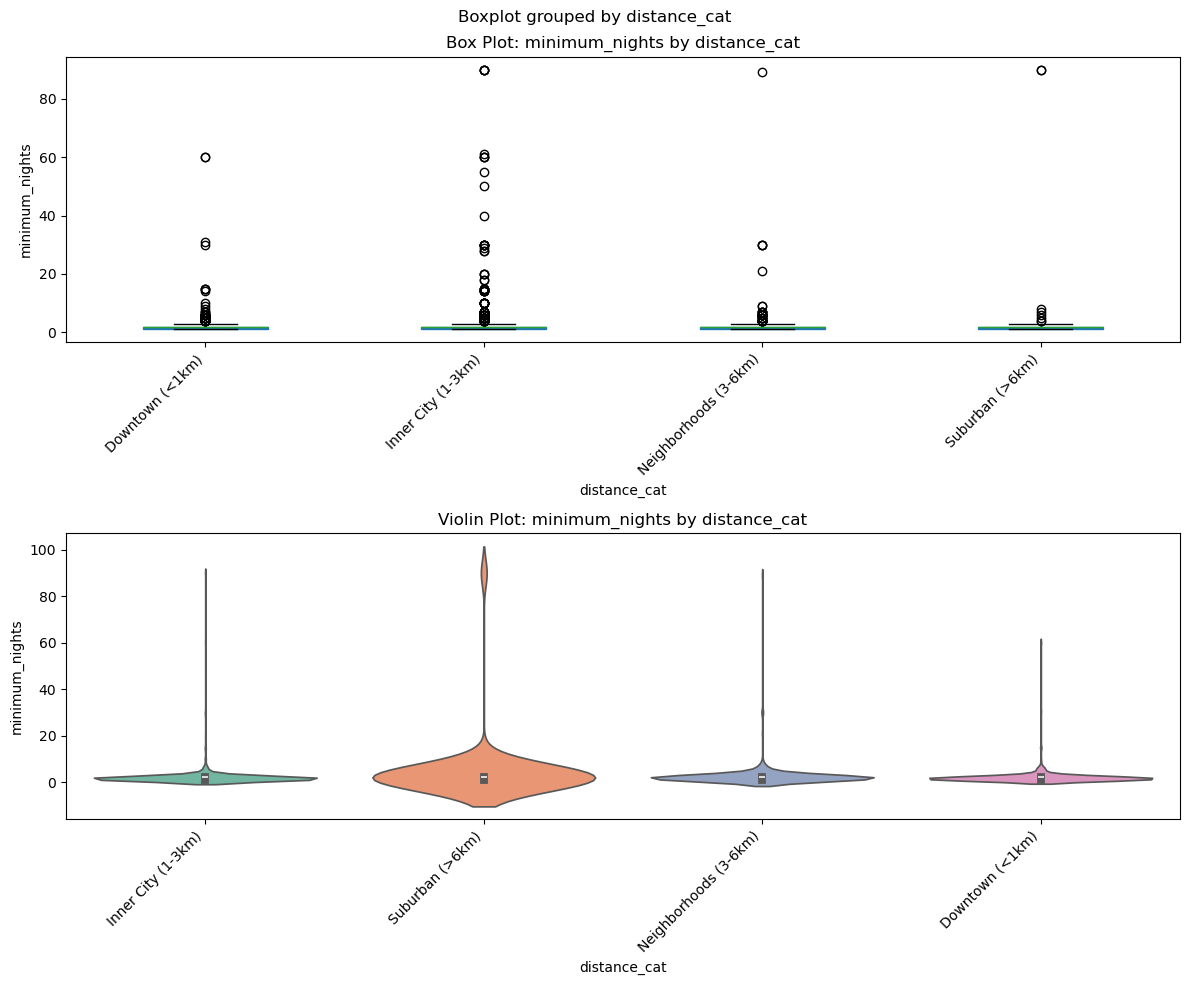

ONE-WAY ANOVA: minimum_nights by distance_cat

Descriptive Statistics by Group:

  distance_cat = Inner City (1-3km):
    N:      2880
    Mean:   2.1681
    Median: 2.0000
    Std:    4.7239
    Min:    1.0000
    Max:    90.0000

  distance_cat = Suburban (>6km):
    N:      81
    Mean:   4.2099
    Median: 2.0000
    Std:    13.7956
    Min:    1.0000
    Max:    90.0000

  distance_cat = Neighborhoods (3-6km):
    N:      500
    Mean:   2.4560
    Median: 2.0000
    Std:    4.6754
    Min:    1.0000
    Max:    89.0000

  distance_cat = Downtown (<1km):
    N:      918
    Mean:   2.0610
    Median: 2.0000
    Std:    3.3241
    Min:    1.0000
    Max:    60.0000

Test Statistics:
  Test:                One-Way ANOVA
  Test statistic:      5.5062
  P-value:             0.000900
  Eta-squared (η²):    0.004
  Effect size:         Negligible effect
  Significant at α=0.05: YES

Interpretation:
  SIGNIFICANT difference detected (p=0.000900). distance_cat has a significant effect on 

/home/fotis/pylab/repos/thess_airbnb/thess_airbnb/scripts/eda_functions.py:723: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


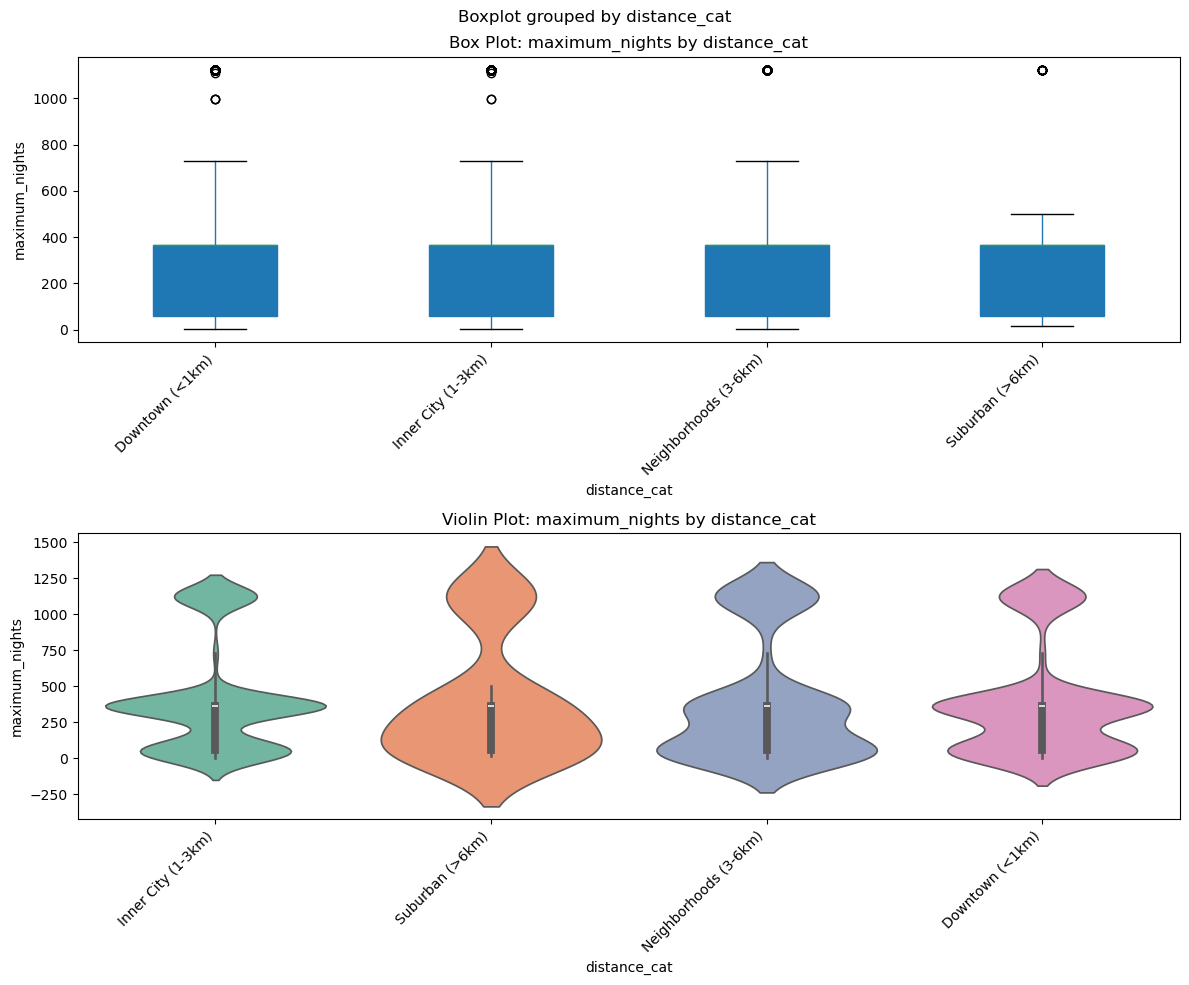

ONE-WAY ANOVA: maximum_nights by distance_cat

Descriptive Statistics by Group:

  distance_cat = Inner City (1-3km):
    N:      2880
    Mean:   395.0594
    Median: 365.0000
    Std:    368.3051
    Min:    1.0000
    Max:    1125.0000

  distance_cat = Suburban (>6km):
    N:      81
    Mean:   392.3086
    Median: 365.0000
    Std:    417.1256
    Min:    14.0000
    Max:    1125.0000

  distance_cat = Neighborhoods (3-6km):
    N:      500
    Mean:   387.9100
    Median: 365.0000
    Std:    411.4206
    Min:    2.0000
    Max:    1125.0000

  distance_cat = Downtown (<1km):
    N:      918
    Mean:   377.4749
    Median: 365.0000
    Std:    370.6355
    Min:    1.0000
    Max:    1125.0000

Test Statistics:
  Test:                One-Way ANOVA
  Test statistic:      0.5199
  P-value:             0.668552
  Eta-squared (η²):    0.000
  Effect size:         Negligible effect
  Significant at α=0.05: NO

Interpretation:
  NO significant difference (p=0.668552). distance_cat doe

/home/fotis/pylab/repos/thess_airbnb/thess_airbnb/scripts/eda_functions.py:723: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


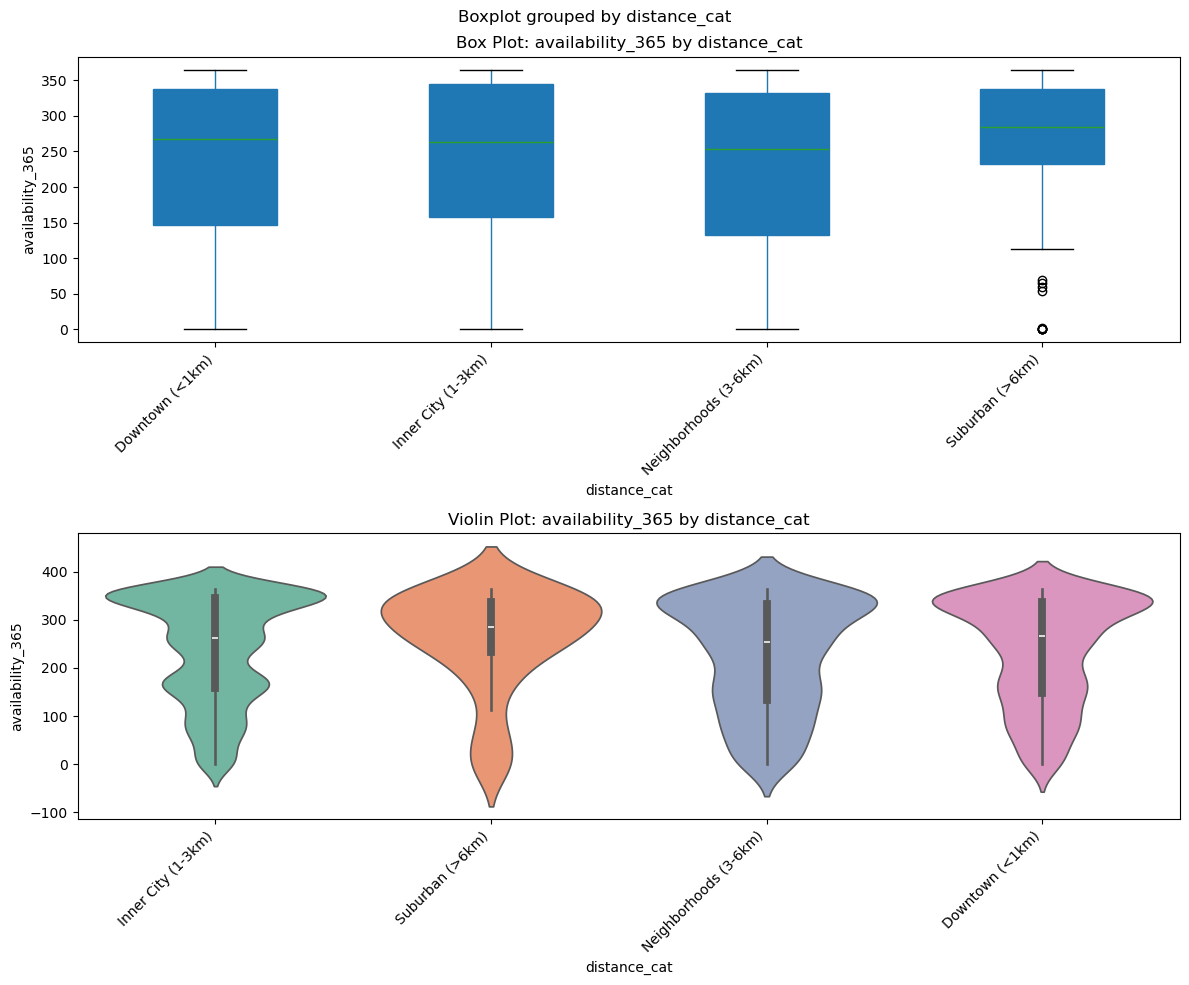

ONE-WAY ANOVA: availability_365 by distance_cat

Descriptive Statistics by Group:

  distance_cat = Inner City (1-3km):
    N:      2880
    Mean:   238.6056
    Median: 263.0000
    Std:    111.9285
    Min:    0.0000
    Max:    365.0000

  distance_cat = Suburban (>6km):
    N:      81
    Mean:   259.6296
    Median: 285.0000
    Std:    105.4978
    Min:    0.0000
    Max:    365.0000

  distance_cat = Neighborhoods (3-6km):
    N:      500
    Mean:   225.8240
    Median: 253.5000
    Std:    115.1502
    Min:    0.0000
    Max:    365.0000

  distance_cat = Downtown (<1km):
    N:      918
    Mean:   236.4346
    Median: 267.0000
    Std:    111.6147
    Min:    0.0000
    Max:    365.0000

Test Statistics:
  Test:                One-Way ANOVA
  Test statistic:      2.9597
  P-value:             0.031054
  Eta-squared (η²):    0.002
  Effect size:         Negligible effect
  Significant at α=0.05: YES

Interpretation:
  SIGNIFICANT difference detected (p=0.031054). distance_cat

/home/fotis/pylab/repos/thess_airbnb/thess_airbnb/scripts/eda_functions.py:723: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


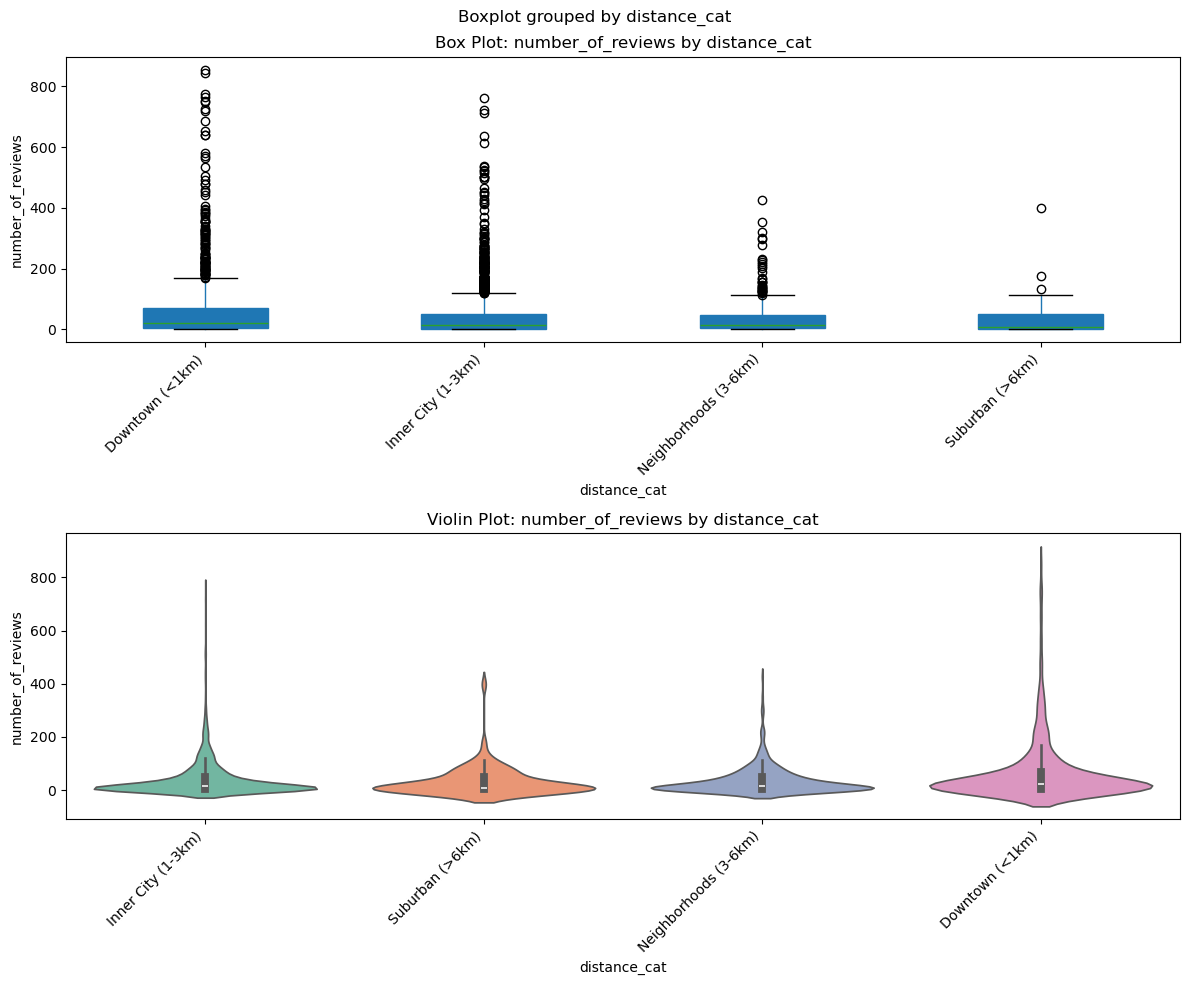

ONE-WAY ANOVA: number_of_reviews by distance_cat

Descriptive Statistics by Group:

  distance_cat = Inner City (1-3km):
    N:      2880
    Mean:   41.8219
    Median: 15.0000
    Std:    70.1046
    Min:    0.0000
    Max:    763.0000

  distance_cat = Suburban (>6km):
    N:      81
    Mean:   32.2469
    Median: 8.0000
    Std:    55.5973
    Min:    0.0000
    Max:    398.0000

  distance_cat = Neighborhoods (3-6km):
    N:      500
    Mean:   35.9540
    Median: 16.0000
    Std:    52.5882
    Min:    0.0000
    Max:    427.0000

  distance_cat = Downtown (<1km):
    N:      918
    Mean:   66.7353
    Median: 22.0000
    Std:    119.8194
    Min:    0.0000
    Max:    855.0000

Test Statistics:
  Test:                One-Way ANOVA
  Test statistic:      25.7276
  P-value:             0.000000
  Eta-squared (η²):    0.017
  Effect size:         Small effect
  Significant at α=0.05: YES

Interpretation:
  SIGNIFICANT difference detected (p=0.000000). distance_cat has a signific

/home/fotis/pylab/repos/thess_airbnb/thess_airbnb/scripts/eda_functions.py:723: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


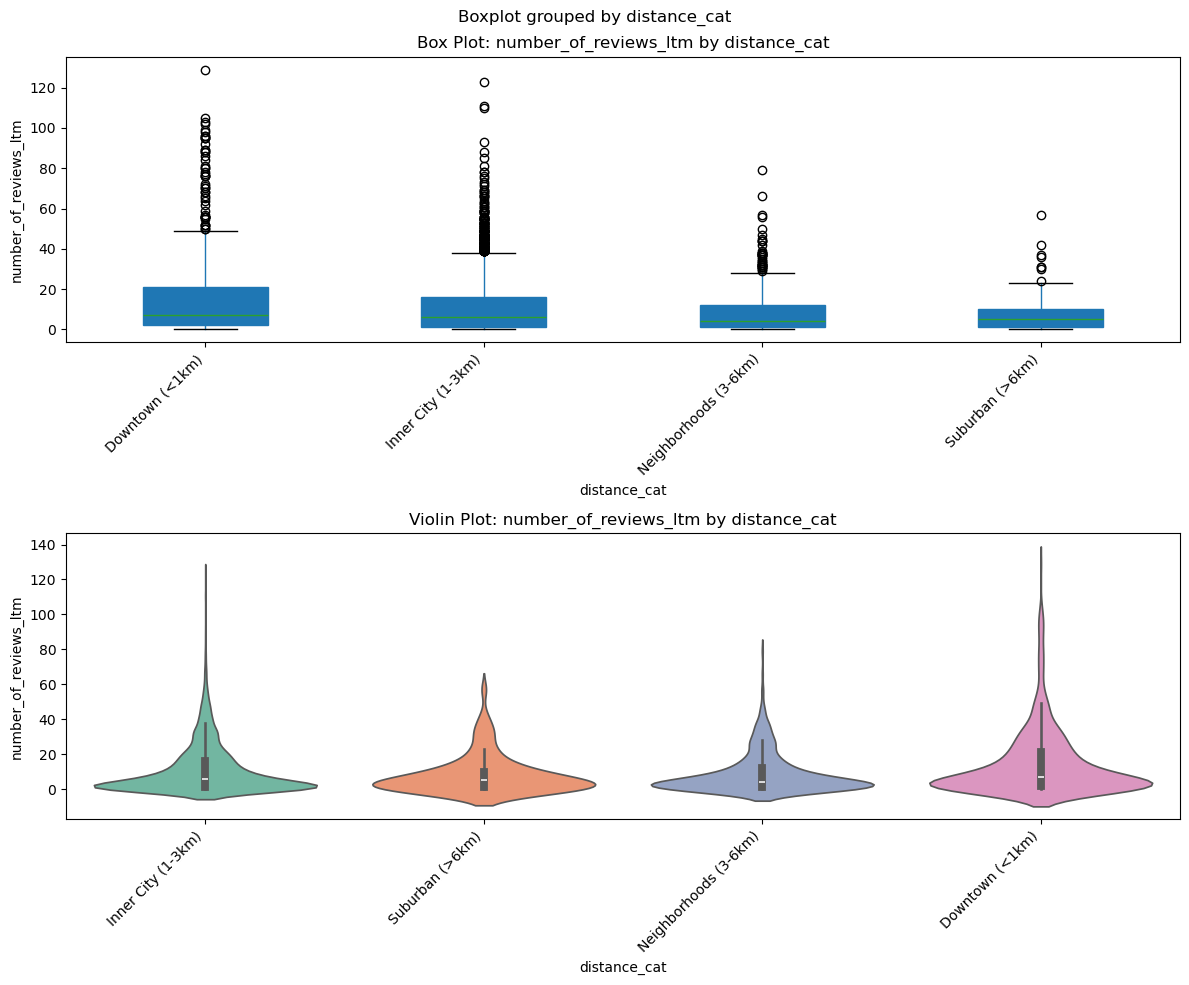

ONE-WAY ANOVA: number_of_reviews_ltm by distance_cat

Descriptive Statistics by Group:

  distance_cat = Inner City (1-3km):
    N:      2880
    Mean:   11.2375
    Median: 6.0000
    Std:    14.2629
    Min:    0.0000
    Max:    123.0000

  distance_cat = Suburban (>6km):
    N:      81
    Mean:   8.3210
    Median: 5.0000
    Std:    11.1813
    Min:    0.0000
    Max:    57.0000

  distance_cat = Neighborhoods (3-6km):
    N:      500
    Mean:   8.9580
    Median: 4.0000
    Std:    11.5027
    Min:    0.0000
    Max:    79.0000

  distance_cat = Downtown (<1km):
    N:      918
    Mean:   14.6917
    Median: 7.0000
    Std:    19.3743
    Min:    0.0000
    Max:    129.0000

Test Statistics:
  Test:                One-Way ANOVA
  Test statistic:      19.5783
  P-value:             0.000000
  Eta-squared (η²):    0.013
  Effect size:         Small effect
  Significant at α=0.05: YES

Interpretation:
  SIGNIFICANT difference detected (p=0.000000). distance_cat has a significant 

/home/fotis/pylab/repos/thess_airbnb/thess_airbnb/scripts/eda_functions.py:723: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


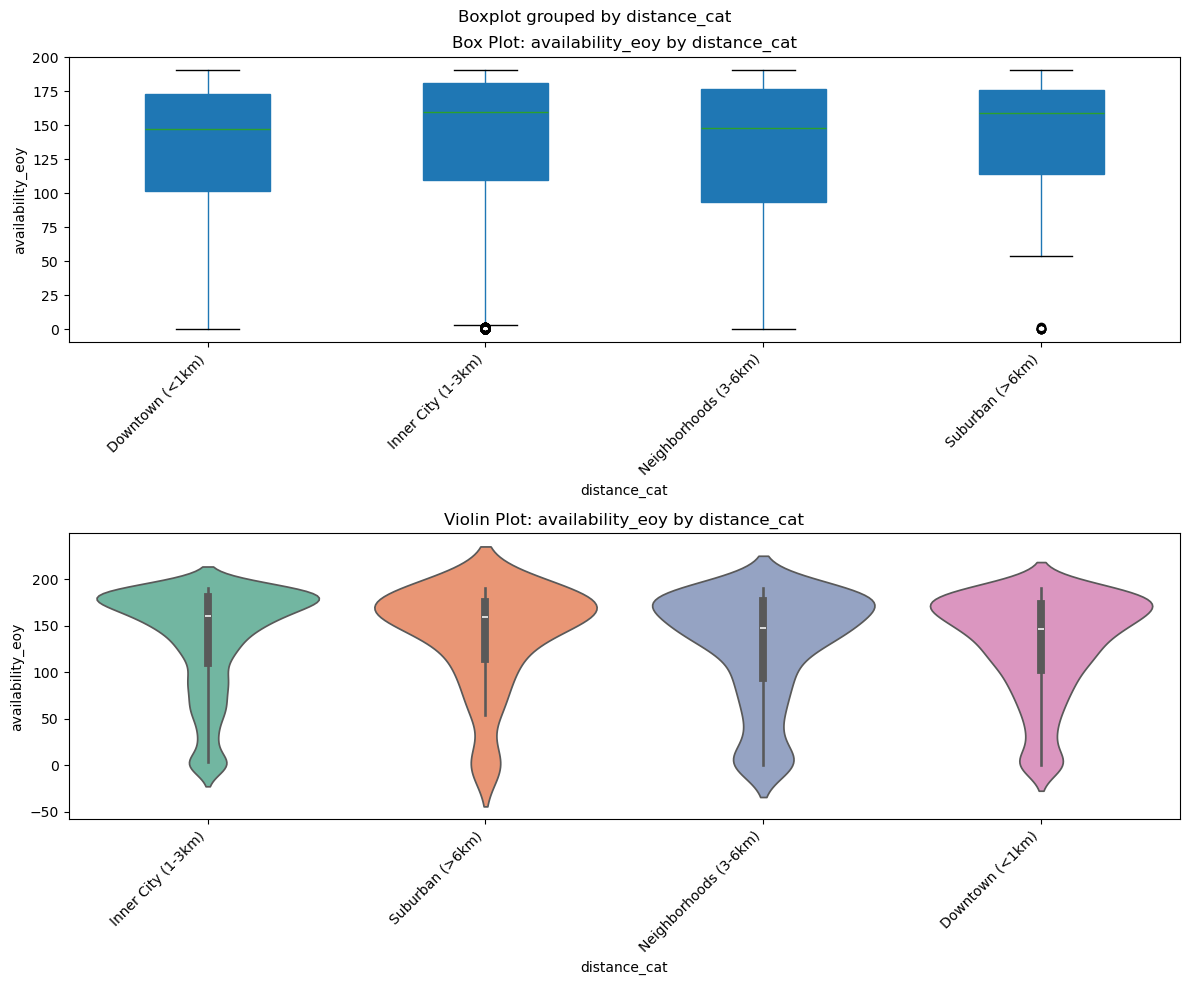

ONE-WAY ANOVA: availability_eoy by distance_cat

Descriptive Statistics by Group:

  distance_cat = Inner City (1-3km):
    N:      2880
    Mean:   137.5667
    Median: 160.0000
    Std:    56.0505
    Min:    0.0000
    Max:    191.0000

  distance_cat = Suburban (>6km):
    N:      81
    Mean:   140.0988
    Median: 159.0000
    Std:    53.4567
    Min:    0.0000
    Max:    191.0000

  distance_cat = Neighborhoods (3-6km):
    N:      500
    Mean:   128.1100
    Median: 148.0000
    Std:    59.5075
    Min:    0.0000
    Max:    191.0000

  distance_cat = Downtown (<1km):
    N:      918
    Mean:   130.3203
    Median: 147.0000
    Std:    53.9103
    Min:    0.0000
    Max:    191.0000

Test Statistics:
  Test:                One-Way ANOVA
  Test statistic:      6.9075
  P-value:             0.000123
  Eta-squared (η²):    0.005
  Effect size:         Negligible effect
  Significant at α=0.05: YES

Interpretation:
  SIGNIFICANT difference detected (p=0.000123). distance_cat has

/home/fotis/pylab/repos/thess_airbnb/thess_airbnb/scripts/eda_functions.py:723: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


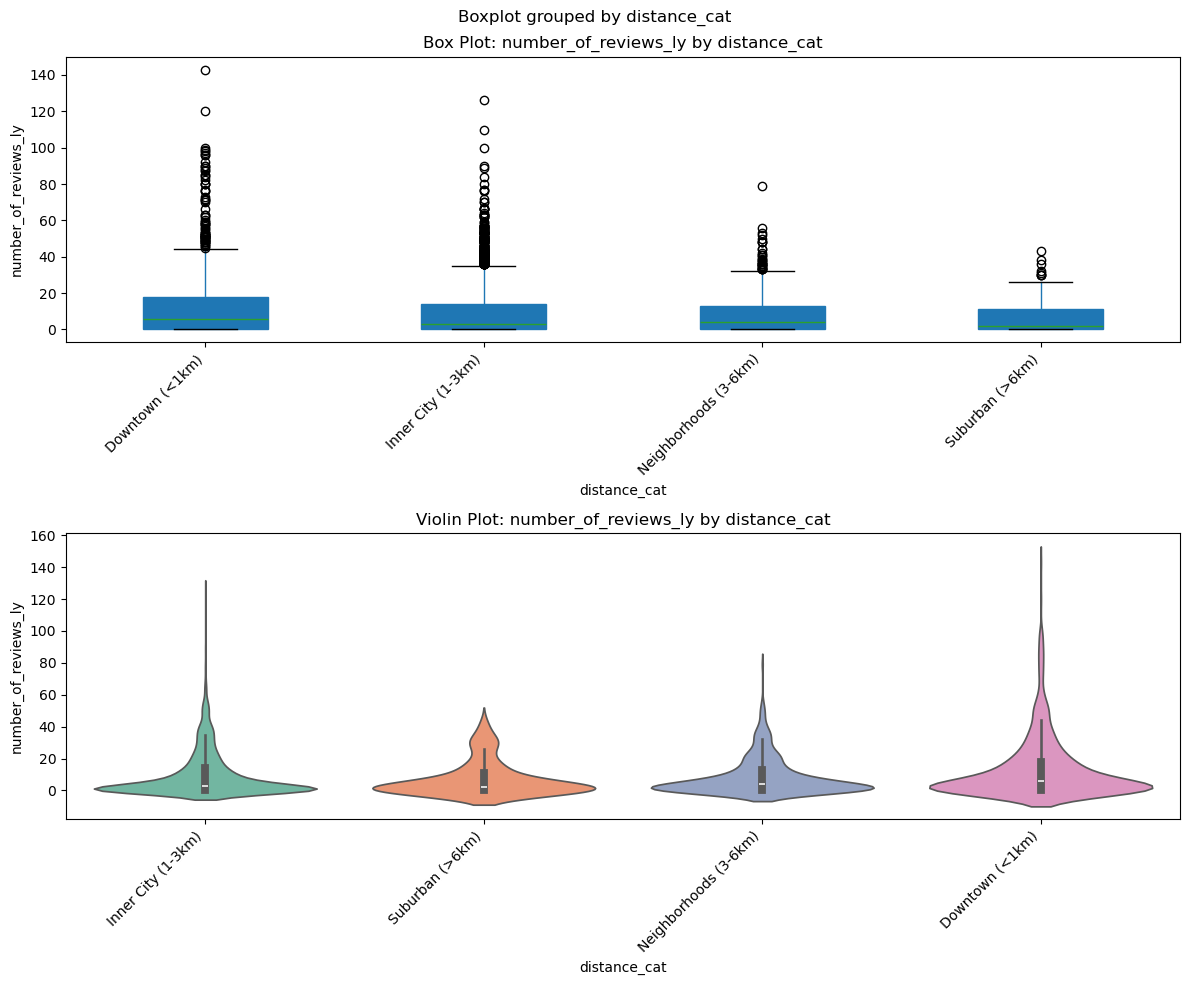

ONE-WAY ANOVA: number_of_reviews_ly by distance_cat

Descriptive Statistics by Group:

  distance_cat = Inner City (1-3km):
    N:      2880
    Mean:   9.8458
    Median: 3.0000
    Std:    14.2750
    Min:    0.0000
    Max:    126.0000

  distance_cat = Suburban (>6km):
    N:      81
    Mean:   7.2840
    Median: 2.0000
    Std:    10.7892
    Min:    0.0000
    Max:    43.0000

  distance_cat = Neighborhoods (3-6km):
    N:      500
    Mean:   8.7220
    Median: 4.0000
    Std:    11.6532
    Min:    0.0000
    Max:    79.0000

  distance_cat = Downtown (<1km):
    N:      918
    Mean:   13.5795
    Median: 6.0000
    Std:    19.6107
    Min:    0.0000
    Max:    143.0000

Test Statistics:
  Test:                One-Way ANOVA
  Test statistic:      17.7154
  P-value:             0.000000
  Eta-squared (η²):    0.012
  Effect size:         Small effect
  Significant at α=0.05: YES

Interpretation:
  SIGNIFICANT difference detected (p=0.000000). distance_cat has a significant ef

/home/fotis/pylab/repos/thess_airbnb/thess_airbnb/scripts/eda_functions.py:723: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


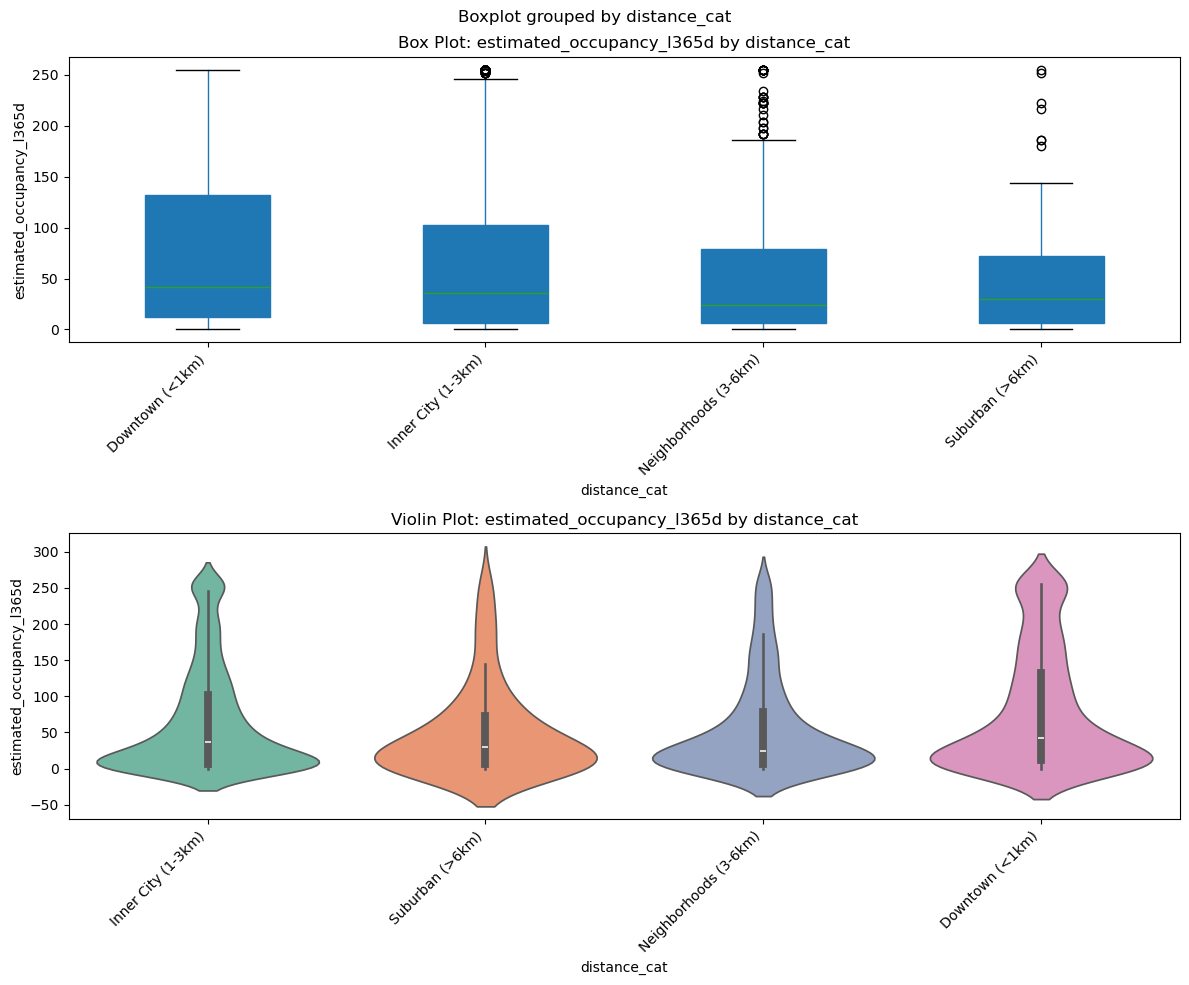

ONE-WAY ANOVA: estimated_occupancy_l365d by distance_cat

Descriptive Statistics by Group:

  distance_cat = Inner City (1-3km):
    N:      2880
    Mean:   65.6670
    Median: 36.0000
    Std:    74.6761
    Min:    0.0000
    Max:    255.0000

  distance_cat = Suburban (>6km):
    N:      81
    Mean:   49.4938
    Median: 30.0000
    Std:    63.1039
    Min:    0.0000
    Max:    255.0000

  distance_cat = Neighborhoods (3-6km):
    N:      500
    Mean:   55.3760
    Median: 24.0000
    Std:    66.1350
    Min:    0.0000
    Max:    255.0000

  distance_cat = Downtown (<1km):
    N:      918
    Mean:   78.4205
    Median: 42.0000
    Std:    82.8334
    Min:    0.0000
    Max:    255.0000

Test Statistics:
  Test:                One-Way ANOVA
  Test statistic:      12.7449
  P-value:             0.000000
  Eta-squared (η²):    0.009
  Effect size:         Negligible effect
  Significant at α=0.05: YES

Interpretation:
  SIGNIFICANT difference detected (p=0.000000). distance_cat h

/home/fotis/pylab/repos/thess_airbnb/thess_airbnb/scripts/eda_functions.py:723: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


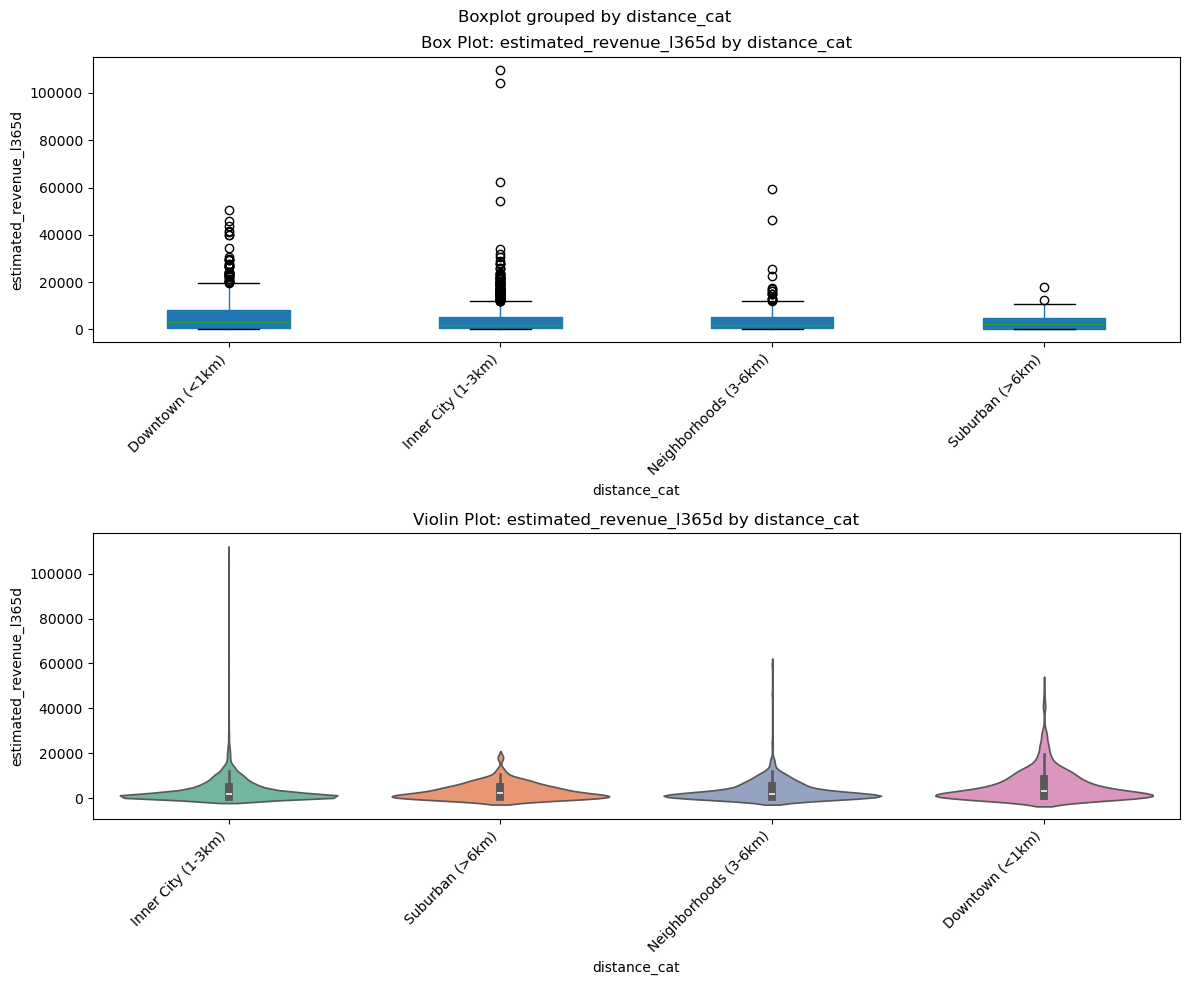

ONE-WAY ANOVA: estimated_revenue_l365d by distance_cat

Descriptive Statistics by Group:

  distance_cat = Inner City (1-3km):
    N:      2791
    Mean:   3620.9265
    Median: 1836.0000
    Std:    5392.2223
    Min:    0.0000
    Max:    109896.0000

  distance_cat = Suburban (>6km):
    N:      79
    Mean:   3072.0127
    Median: 2208.0000
    Std:    3444.7894
    Min:    0.0000
    Max:    18018.0000

  distance_cat = Neighborhoods (3-6km):
    N:      476
    Mean:   3432.5147
    Median: 1728.0000
    Std:    4984.3979
    Min:    0.0000
    Max:    59280.0000

  distance_cat = Downtown (<1km):
    N:      824
    Mean:   5712.8301
    Median: 3324.0000
    Std:    7045.0132
    Min:    0.0000
    Max:    50430.0000

Test Statistics:
  Test:                One-Way ANOVA
  Test statistic:      31.3392
  P-value:             0.000000
  Eta-squared (η²):    0.022
  Effect size:         Small effect
  Significant at α=0.05: YES

Interpretation:
  SIGNIFICANT difference detected (p

/home/fotis/pylab/repos/thess_airbnb/thess_airbnb/scripts/eda_functions.py:723: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


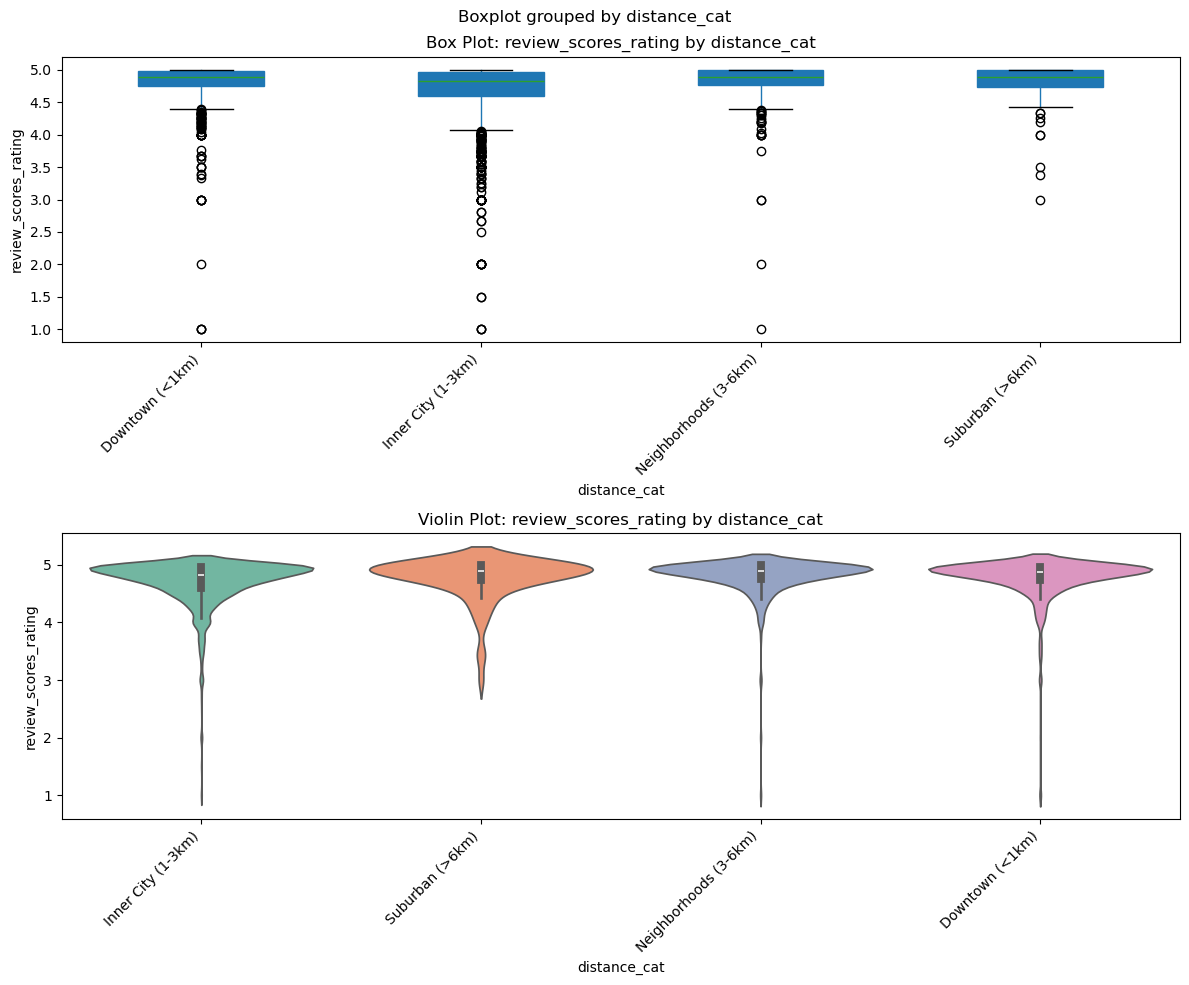

ONE-WAY ANOVA: review_scores_rating by distance_cat

Descriptive Statistics by Group:

  distance_cat = Inner City (1-3km):
    N:      2557
    Mean:   4.6993
    Median: 4.8200
    Std:    0.4080
    Min:    1.0000
    Max:    5.0000

  distance_cat = Suburban (>6km):
    N:      76
    Mean:   4.7609
    Median: 4.8900
    Std:    0.3835
    Min:    3.0000
    Max:    5.0000

  distance_cat = Neighborhoods (3-6km):
    N:      446
    Mean:   4.8111
    Median: 4.8900
    Std:    0.3278
    Min:    1.0000
    Max:    5.0000

  distance_cat = Downtown (<1km):
    N:      839
    Mean:   4.7772
    Median: 4.8800
    Std:    0.3789
    Min:    1.0000
    Max:    5.0000

Test Statistics:
  Test:                One-Way ANOVA
  Test statistic:      15.7277
  P-value:             0.000000
  Eta-squared (η²):    0.012
  Effect size:         Small effect
  Significant at α=0.05: YES

Interpretation:
  SIGNIFICANT difference detected (p=0.000000). distance_cat has a significant effect on rev

/home/fotis/pylab/repos/thess_airbnb/thess_airbnb/scripts/eda_functions.py:723: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


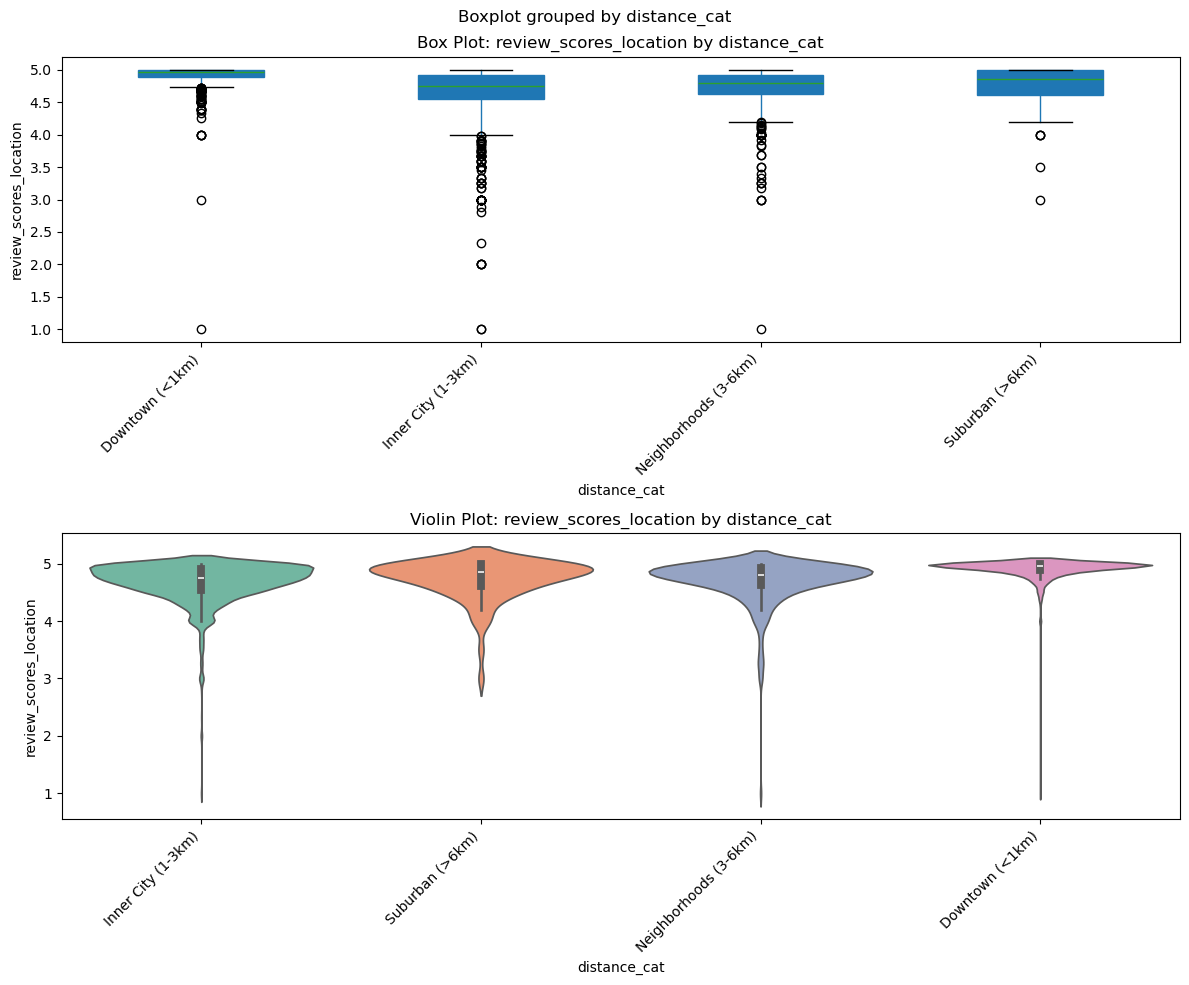

ONE-WAY ANOVA: review_scores_location by distance_cat

Descriptive Statistics by Group:

  distance_cat = Inner City (1-3km):
    N:      2557
    Mean:   4.6715
    Median: 4.7500
    Std:    0.3551
    Min:    1.0000
    Max:    5.0000

  distance_cat = Suburban (>6km):
    N:      76
    Mean:   4.7247
    Median: 4.8550
    Std:    0.3565
    Min:    3.0000
    Max:    5.0000

  distance_cat = Neighborhoods (3-6km):
    N:      446
    Mean:   4.6925
    Median: 4.8000
    Std:    0.3850
    Min:    1.0000
    Max:    5.0000

  distance_cat = Downtown (<1km):
    N:      839
    Mean:   4.9078
    Median: 4.9600
    Std:    0.2000
    Min:    1.0000
    Max:    5.0000

Test Statistics:
  Test:                One-Way ANOVA
  Test statistic:      108.3078
  P-value:             0.000000
  Eta-squared (η²):    0.077
  Effect size:         Medium effect
  Significant at α=0.05: YES

Interpretation:
  SIGNIFICANT difference detected (p=0.000000). distance_cat has a significant effect on

/home/fotis/pylab/repos/thess_airbnb/thess_airbnb/scripts/eda_functions.py:723: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


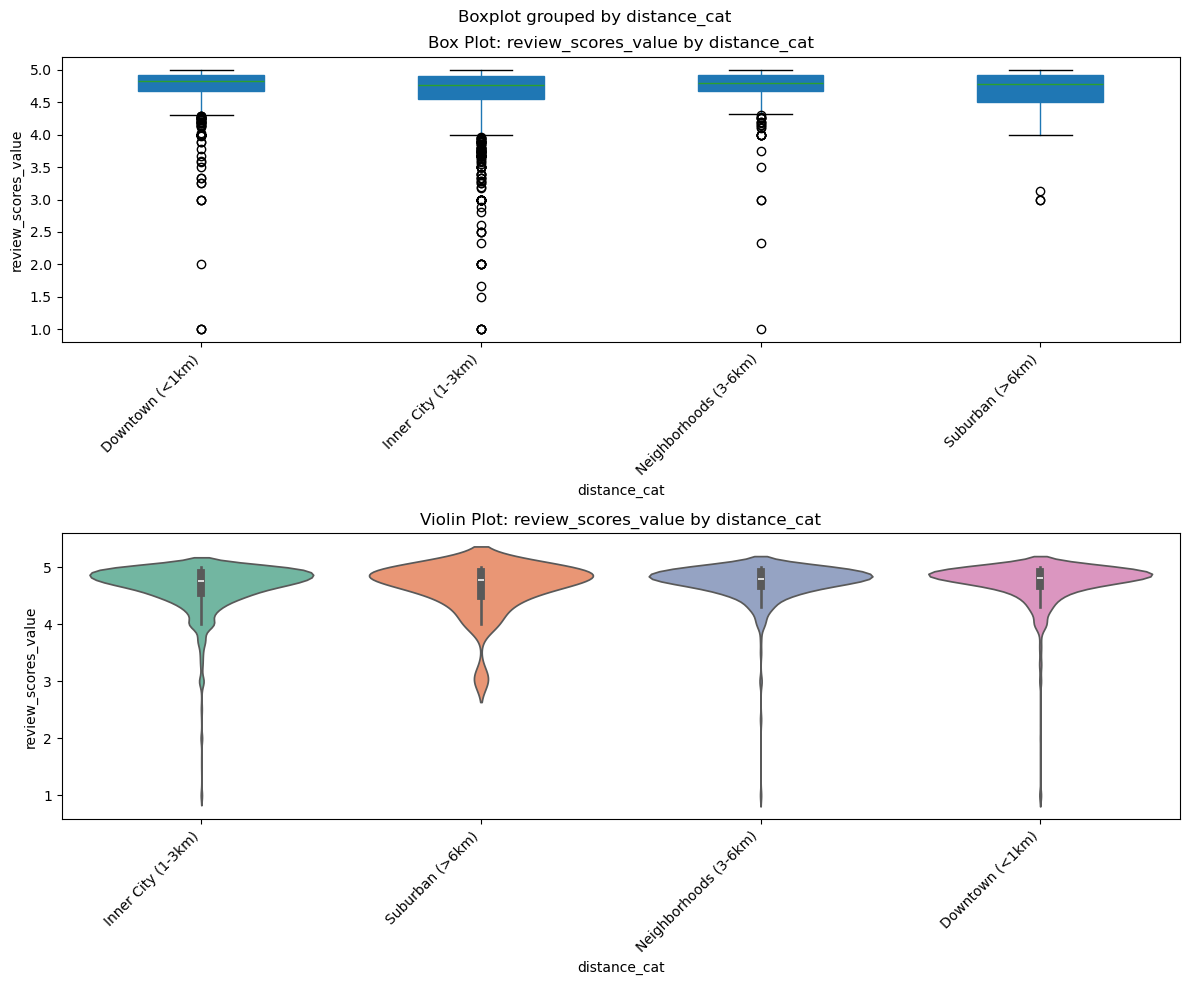

ONE-WAY ANOVA: review_scores_value by distance_cat

Descriptive Statistics by Group:

  distance_cat = Inner City (1-3km):
    N:      2557
    Mean:   4.6531
    Median: 4.7600
    Std:    0.4186
    Min:    1.0000
    Max:    5.0000

  distance_cat = Suburban (>6km):
    N:      76
    Mean:   4.6462
    Median: 4.7750
    Std:    0.4341
    Min:    3.0000
    Max:    5.0000

  distance_cat = Neighborhoods (3-6km):
    N:      446
    Mean:   4.7348
    Median: 4.8000
    Std:    0.3305
    Min:    1.0000
    Max:    5.0000

  distance_cat = Downtown (<1km):
    N:      839
    Mean:   4.7318
    Median: 4.8200
    Std:    0.3747
    Min:    1.0000
    Max:    5.0000

Test Statistics:
  Test:                One-Way ANOVA
  Test statistic:      11.4623
  P-value:             0.000000
  Eta-squared (η²):    0.009
  Effect size:         Negligible effect
  Significant at α=0.05: YES

Interpretation:
  SIGNIFICANT difference detected (p=0.000000). distance_cat has a significant effect on

/home/fotis/pylab/repos/thess_airbnb/thess_airbnb/scripts/eda_functions.py:723: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


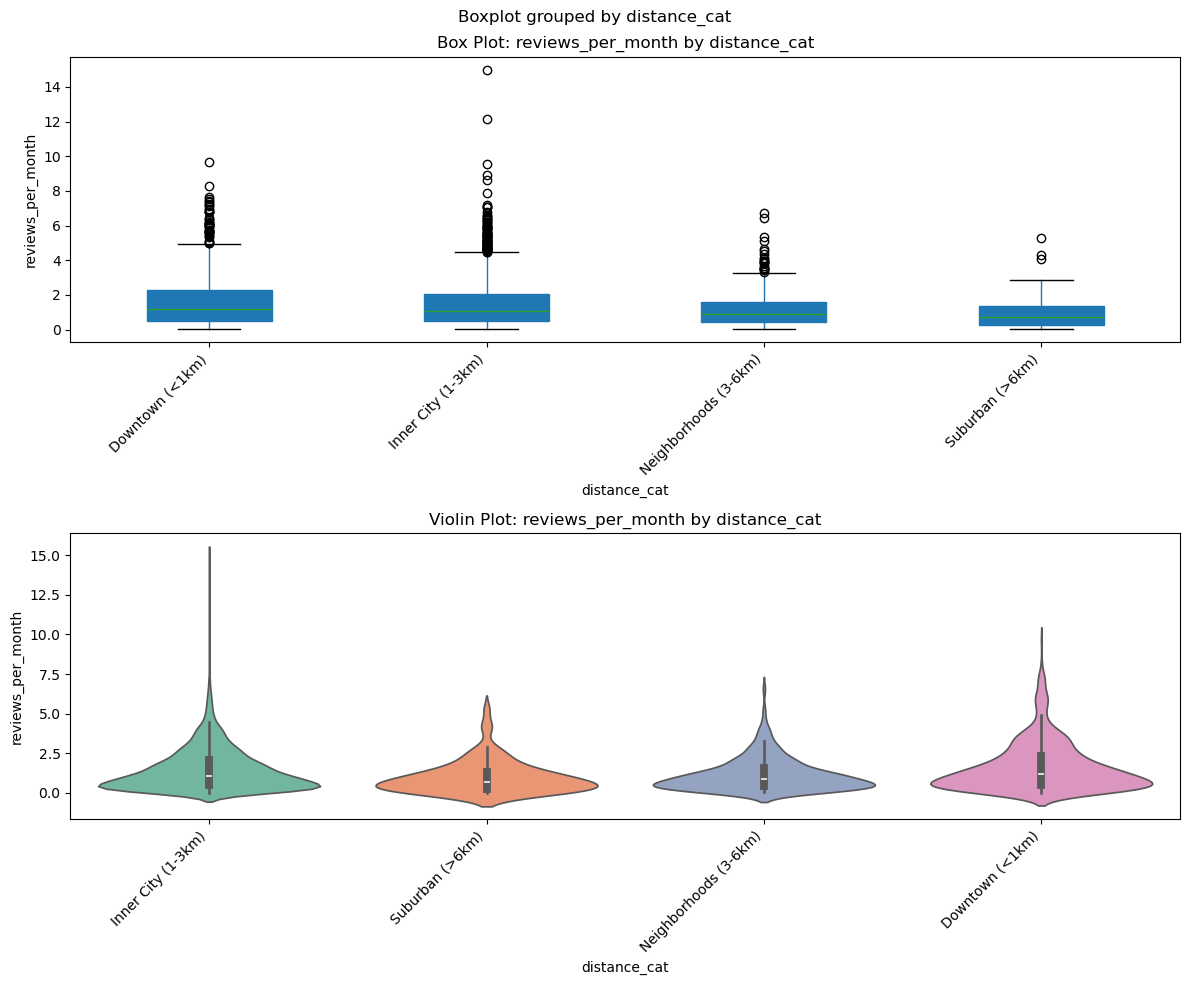

ONE-WAY ANOVA: reviews_per_month by distance_cat

Descriptive Statistics by Group:

  distance_cat = Inner City (1-3km):
    N:      2557
    Mean:   1.4772
    Median: 1.0800
    Std:    1.3401
    Min:    0.0100
    Max:    15.0000

  distance_cat = Suburban (>6km):
    N:      76
    Mean:   1.0104
    Median: 0.7150
    Std:    1.0315
    Min:    0.0200
    Max:    5.2800

  distance_cat = Neighborhoods (3-6km):
    N:      446
    Mean:   1.1705
    Median: 0.8900
    Std:    1.0386
    Min:    0.0400
    Max:    6.7100

  distance_cat = Downtown (<1km):
    N:      839
    Mean:   1.6485
    Median: 1.1800
    Std:    1.5458
    Min:    0.0100
    Max:    9.6500

Test Statistics:
  Test:                One-Way ANOVA
  Test statistic:      15.1286
  P-value:             0.000000
  Eta-squared (η²):    0.011
  Effect size:         Small effect
  Significant at α=0.05: YES

Interpretation:
  SIGNIFICANT difference detected (p=0.000000). distance_cat has a significant effect on revie

/home/fotis/pylab/repos/thess_airbnb/thess_airbnb/scripts/eda_functions.py:723: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


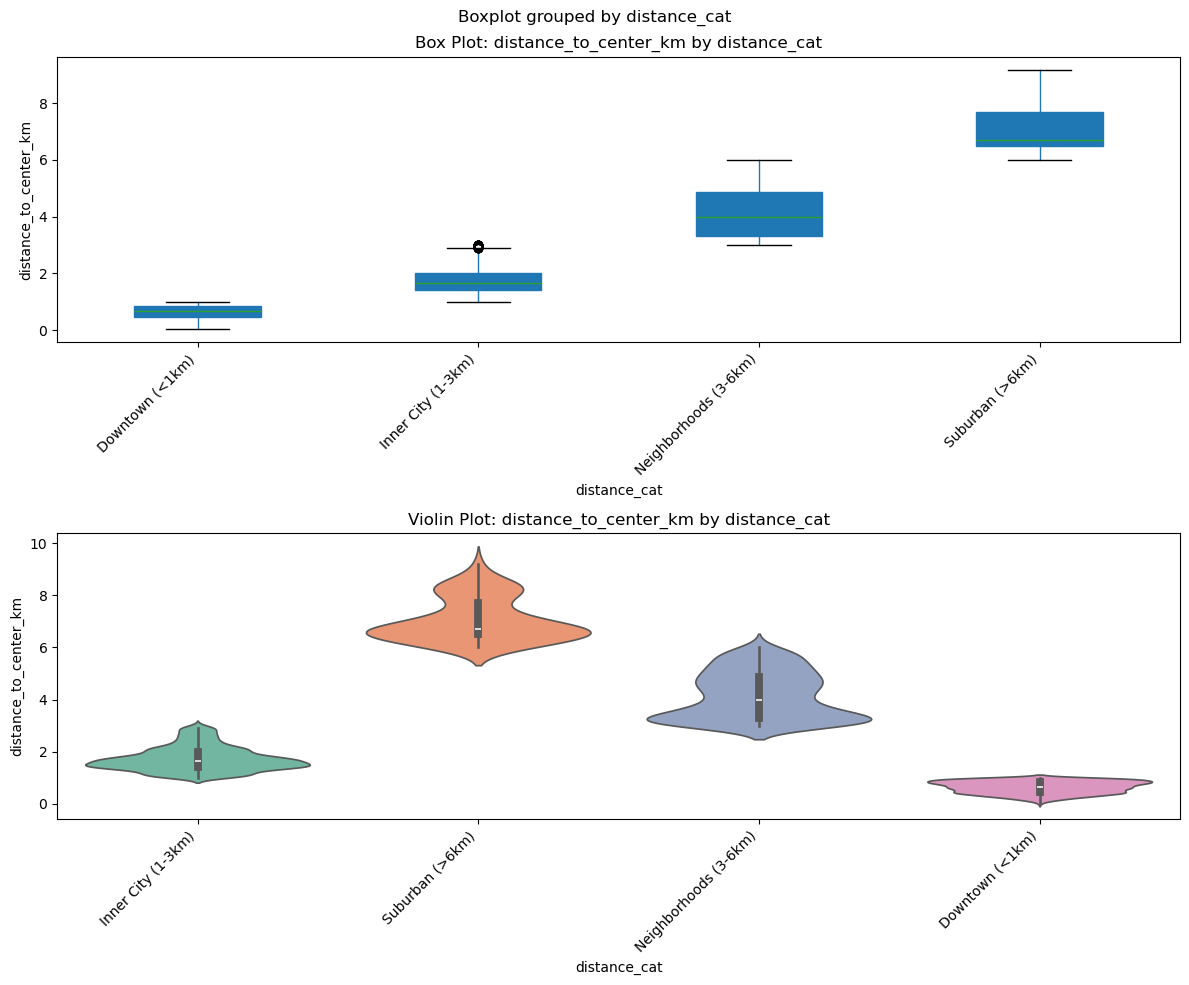

ONE-WAY ANOVA: distance_to_center_km by distance_cat

Descriptive Statistics by Group:

  distance_cat = Inner City (1-3km):
    N:      2880
    Mean:   1.7345
    Median: 1.6546
    Std:    0.4646
    Min:    1.0013
    Max:    2.9978

  distance_cat = Suburban (>6km):
    N:      81
    Mean:   7.0517
    Median: 6.7107
    Std:    0.8222
    Min:    6.0009
    Max:    9.1903

  distance_cat = Neighborhoods (3-6km):
    N:      500
    Mean:   4.1488
    Median: 3.9722
    Std:    0.9061
    Min:    3.0005
    Max:    5.9993

  distance_cat = Downtown (<1km):
    N:      918
    Mean:   0.6412
    Median: 0.6571
    Std:    0.2338
    Min:    0.0215
    Max:    0.9999

Test Statistics:
  Test:                One-Way ANOVA
  Test statistic:      7975.9570
  P-value:             0.000000
  Eta-squared (η²):    0.845
  Effect size:         Large effect
  Significant at α=0.05: YES

Interpretation:
  SIGNIFICANT difference detected (p=0.000000). distance_cat has a significant effect on 

In [38]:
for col in df_5.drop(columns=['id', 'host_id', 'latitude', 'longitude']).select_dtypes(include=np.number).columns:
    analyze_categorical_numerical(df_5['distance_cat'], df_5[col])

In [9]:
df_5["price_cat"] = pd.cut(
    df_5['price'],
    bins=[0, 40, 60, 80, 120, np.inf],
    labels=['Very Low (<40€)', 'Low (40-60€)', 'Medium (60-80€)', 'High (80-120€)', 'Very High (>120€)']
)

/tmp/ipykernel_1899/438985966.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_5["price_cat"] = pd.cut(


ana

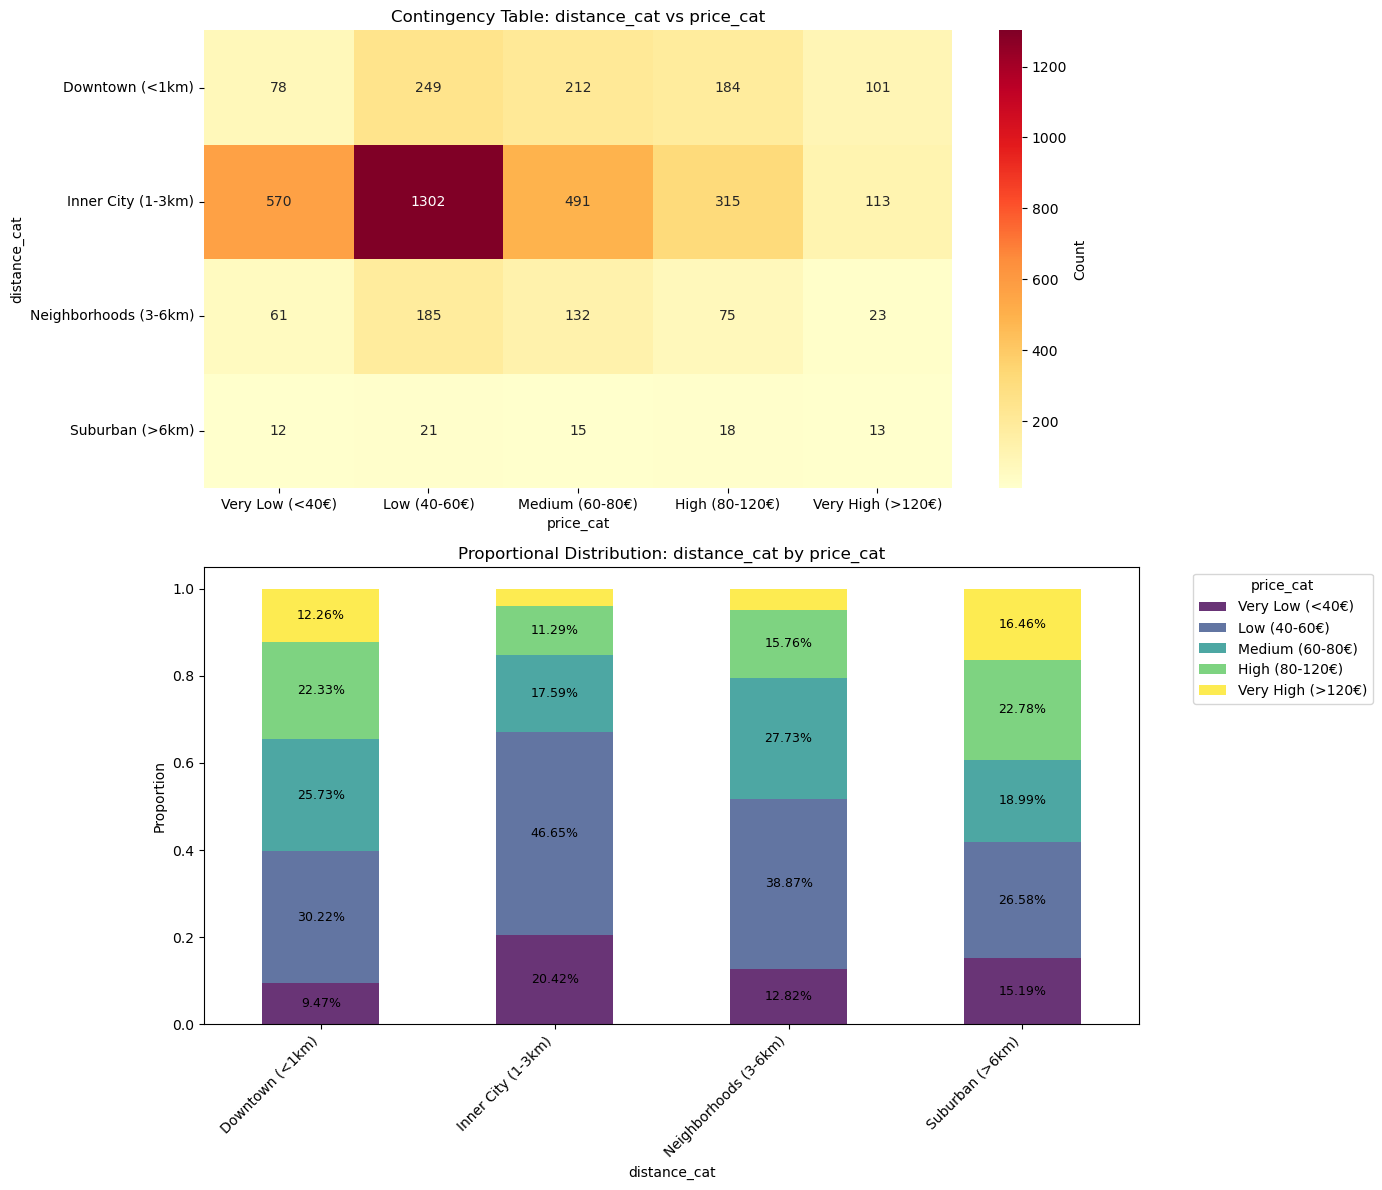

CHI-SQUARE TEST OF INDEPENDENCE: distance_cat vs price_cat

Contingency Table:
price_cat              Very Low (<40€)  Low (40-60€)  Medium (60-80€)  \
distance_cat                                                            
Downtown (<1km)                     78           249              212   
Inner City (1-3km)                 570          1302              491   
Neighborhoods (3-6km)               61           185              132   
Suburban (>6km)                     12            21               15   

price_cat              High (80-120€)  Very High (>120€)  
distance_cat                                              
Downtown (<1km)                   184                101  
Inner City (1-3km)                315                113  
Neighborhoods (3-6km)              75                 23  
Suburban (>6km)                    18                 13  

Test Statistics:
  Chi-square statistic: 279.6409
  Degrees of freedom:   12
  P-value:              0.000000
  Cramér's V:    

{'chi2_statistic': np.float64(279.64086661733444),
 'p_value': np.float64(8.732258837650058e-53),
 'degrees_of_freedom': 12,
 'cramers_v': np.float64(0.14951049000016917),
 'effect_interpretation': 'Weak association',
 'is_significant': np.True_,
 'contingency_table': price_cat              Very Low (<40€)  Low (40-60€)  Medium (60-80€)  \
 distance_cat                                                            
 Downtown (<1km)                     78           249              212   
 Inner City (1-3km)                 570          1302              491   
 Neighborhoods (3-6km)               61           185              132   
 Suburban (>6km)                     12            21               15   
 
 price_cat              High (80-120€)  Very High (>120€)  
 distance_cat                                              
 Downtown (<1km)                   184                101  
 Inner City (1-3km)                315                113  
 Neighborhoods (3-6km)              75        

In [12]:
analyze_categorical_categorical(df_5['distance_cat'], df_5['price_cat'])

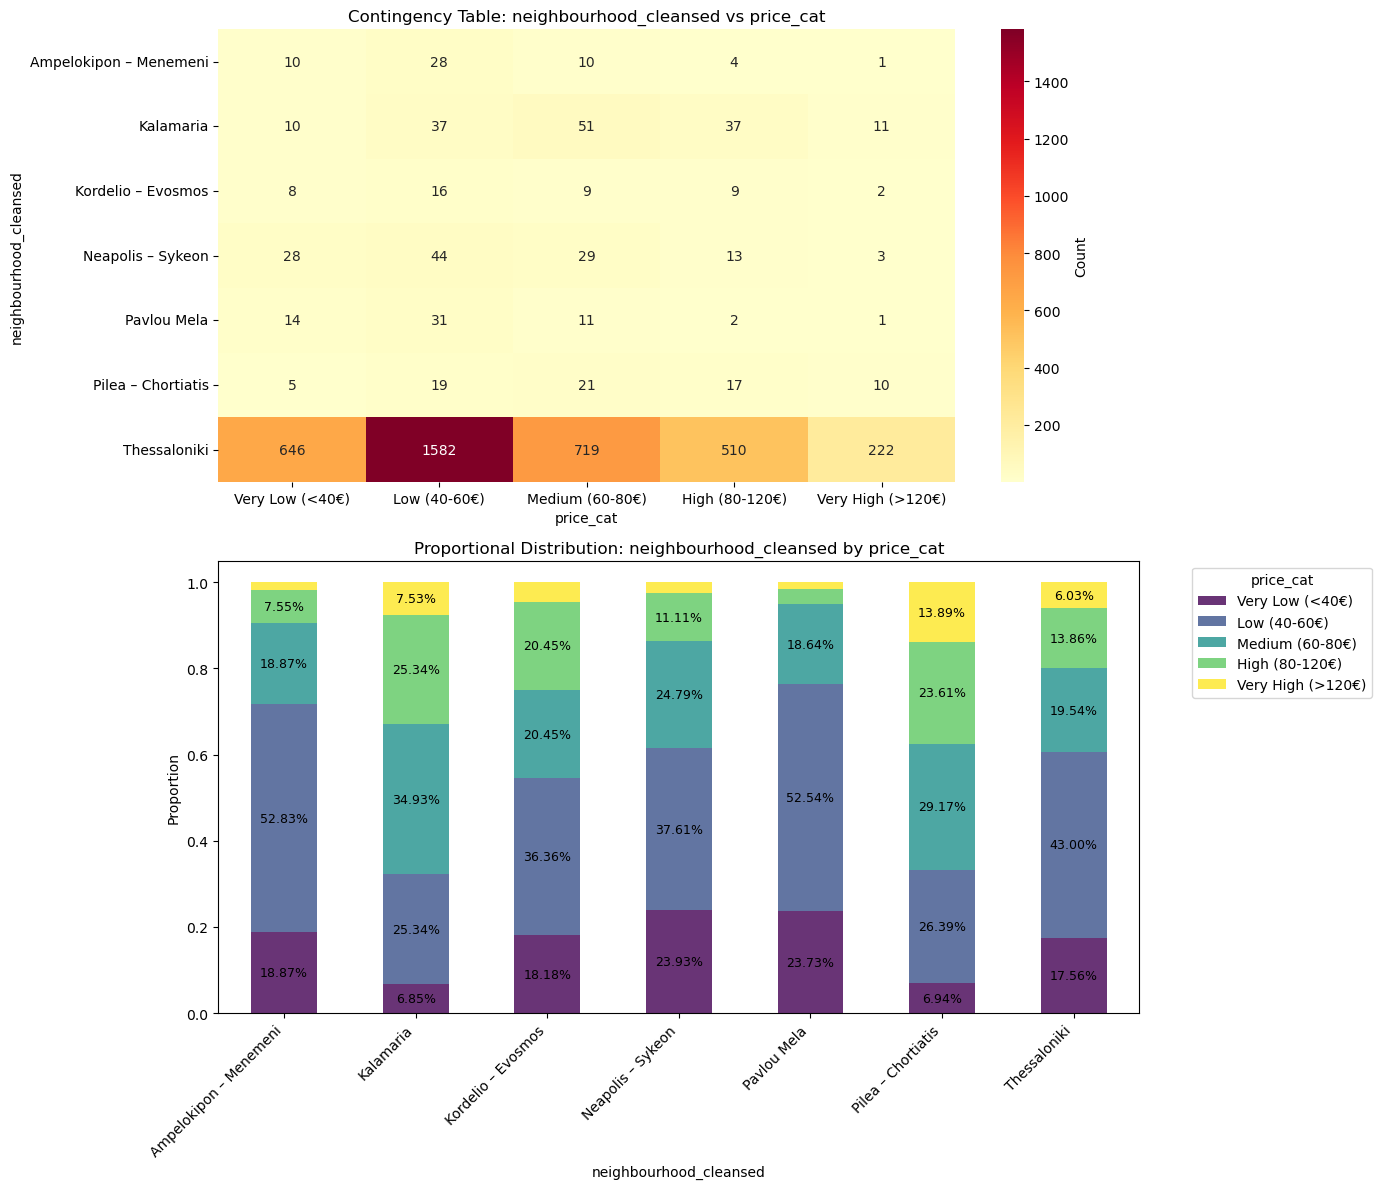

CHI-SQUARE TEST OF INDEPENDENCE: neighbourhood_cleansed vs price_cat

Contingency Table:
price_cat               Very Low (<40€)  Low (40-60€)  Medium (60-80€)  \
neighbourhood_cleansed                                                   
Ampelokipon – Menemeni               10            28               10   
Kalamaria                            10            37               51   
Kordelio – Evosmos                    8            16                9   
Neapolis – Sykeon                    28            44               29   
Pavlou Mela                          14            31               11   
Pilea – Chortiatis                    5            19               21   
Thessaloniki                        646          1582              719   

price_cat               High (80-120€)  Very High (>120€)  
neighbourhood_cleansed                                     
Ampelokipon – Menemeni               4                  1  
Kalamaria                           37                 11  
Kord

{'chi2_statistic': np.float64(97.16179242802168),
 'p_value': np.float64(9.117718780356238e-11),
 'degrees_of_freedom': 24,
 'cramers_v': np.float64(0.0763219988448623),
 'effect_interpretation': 'Negligible association',
 'is_significant': np.True_,
 'contingency_table': price_cat               Very Low (<40€)  Low (40-60€)  Medium (60-80€)  \
 neighbourhood_cleansed                                                   
 Ampelokipon – Menemeni               10            28               10   
 Kalamaria                            10            37               51   
 Kordelio – Evosmos                    8            16                9   
 Neapolis – Sykeon                    28            44               29   
 Pavlou Mela                          14            31               11   
 Pilea – Chortiatis                    5            19               21   
 Thessaloniki                        646          1582              719   
 
 price_cat               High (80-120€)  Very High 

In [15]:
analyze_categorical_categorical(df_5['neighbourhood_cleansed'], df_5['price_cat'])

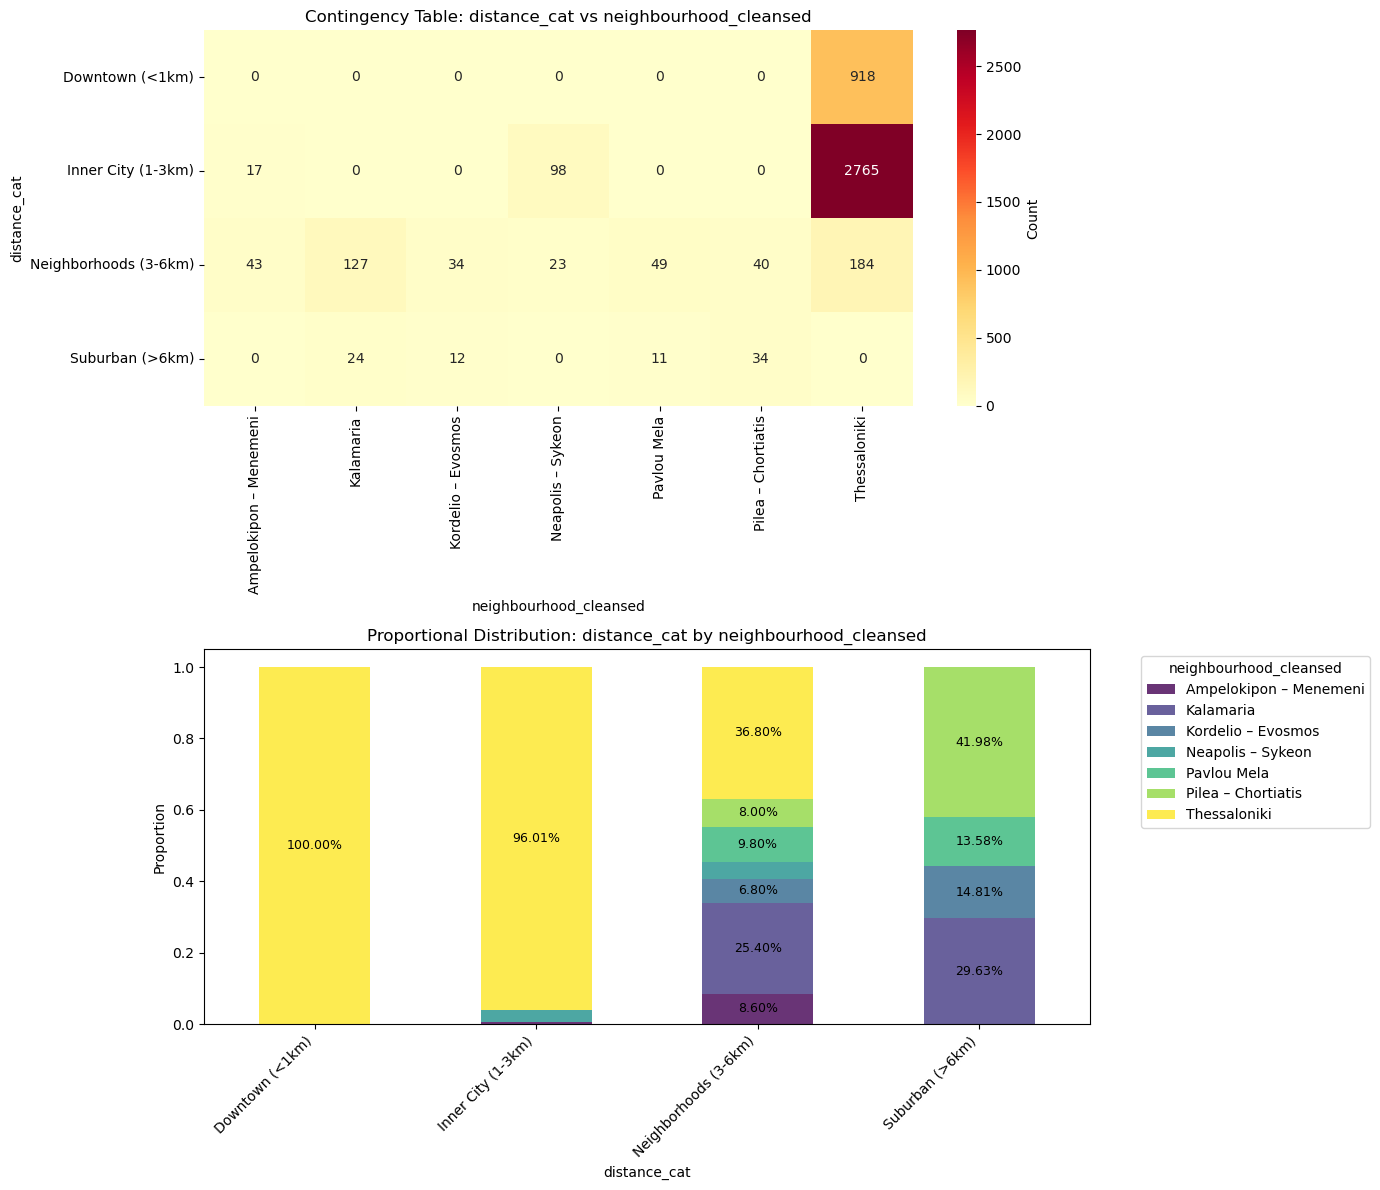

CHI-SQUARE TEST OF INDEPENDENCE: distance_cat vs neighbourhood_cleansed

Contingency Table:
neighbourhood_cleansed  Ampelokipon – Menemeni  Kalamaria  Kordelio – Evosmos  \
distance_cat                                                                    
Downtown (<1km)                              0          0                   0   
Inner City (1-3km)                          17          0                   0   
Neighborhoods (3-6km)                       43        127                  34   
Suburban (>6km)                              0         24                  12   

neighbourhood_cleansed  Neapolis – Sykeon  Pavlou Mela  Pilea – Chortiatis  \
distance_cat                                                                 
Downtown (<1km)                         0            0                   0   
Inner City (1-3km)                     98            0                   0   
Neighborhoods (3-6km)                  23           49                  40   
Suburban (>6km)                

{'chi2_statistic': np.float64(3203.895712334692),
 'p_value': np.float64(0.0),
 'degrees_of_freedom': 18,
 'cramers_v': np.float64(0.49384548283301016),
 'effect_interpretation': 'Moderate association',
 'is_significant': np.True_,
 'contingency_table': neighbourhood_cleansed  Ampelokipon – Menemeni  Kalamaria  Kordelio – Evosmos  \
 distance_cat                                                                    
 Downtown (<1km)                              0          0                   0   
 Inner City (1-3km)                          17          0                   0   
 Neighborhoods (3-6km)                       43        127                  34   
 Suburban (>6km)                              0         24                  12   
 
 neighbourhood_cleansed  Neapolis – Sykeon  Pavlou Mela  Pilea – Chortiatis  \
 distance_cat                                                                 
 Downtown (<1km)                         0            0                   0   
 Inner City (1-3

In [16]:
analyze_categorical_categorical(df_5['distance_cat'], df_5['neighbourhood_cleansed'])

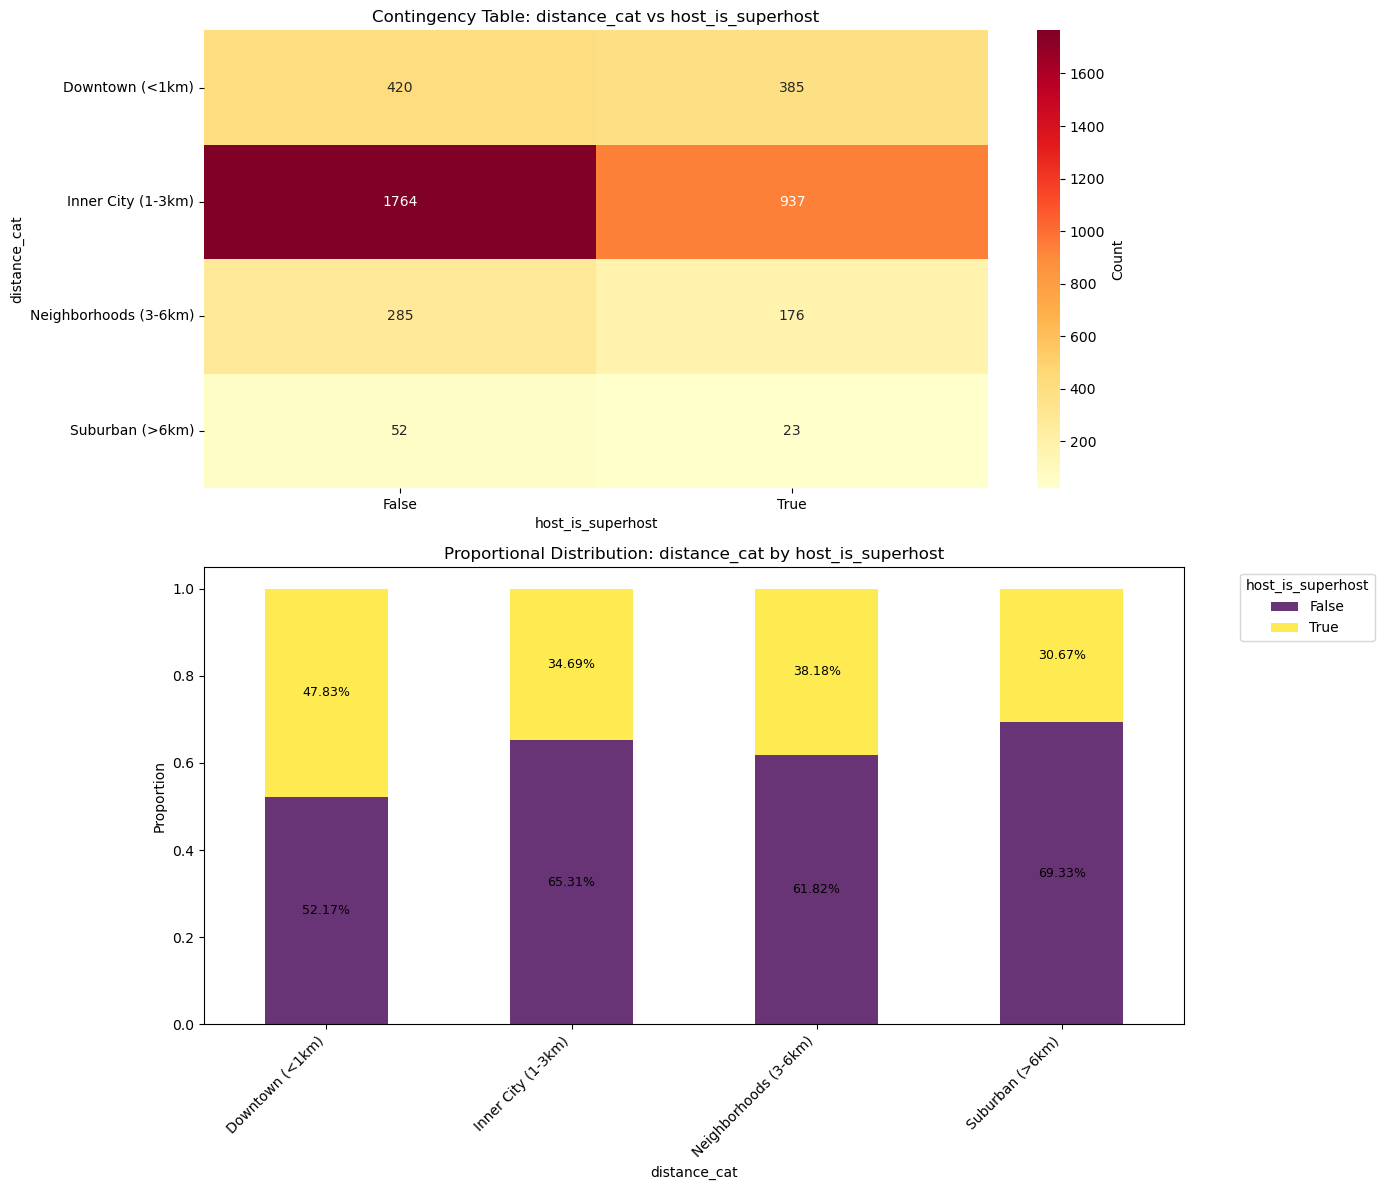

CHI-SQUARE TEST OF INDEPENDENCE: distance_cat vs host_is_superhost

Contingency Table:
host_is_superhost      False  True 
distance_cat                       
Downtown (<1km)          420    385
Inner City (1-3km)      1764    937
Neighborhoods (3-6km)    285    176
Suburban (>6km)           52     23

Test Statistics:
  Chi-square statistic: 47.2078
  Degrees of freedom:   3
  P-value:              0.000000
  Cramér's V:           0.108
  Effect size:          Weak association
  Significant at α=0.05: YES

Interpretation:
  SIGNIFICANT association detected (p=0.000000). distance_cat and host_is_superhost are related. Weak association (Cramér's V = 0.108).


{'chi2_statistic': np.float64(47.20777298388095),
 'p_value': np.float64(3.1393002340676714e-10),
 'degrees_of_freedom': 3,
 'cramers_v': np.float64(0.10807085863390102),
 'effect_interpretation': 'Weak association',
 'is_significant': np.True_,
 'contingency_table': host_is_superhost      False  True 
 distance_cat                       
 Downtown (<1km)          420    385
 Inner City (1-3km)      1764    937
 Neighborhoods (3-6km)    285    176
 Suburban (>6km)           52     23,
 'expected_frequencies': array([[ 502.07941613,  302.92058387],
        [1684.61677387, 1016.38322613],
        [ 287.52622464,  173.47377536],
        [  46.77758535,   28.22241465]]),
 'interpretation': "SIGNIFICANT association detected (p=0.000000). distance_cat and host_is_superhost are related. Weak association (Cramér's V = 0.108).",
 'variable1': 'distance_cat',
 'variable2': 'host_is_superhost'}

In [17]:
analyze_categorical_categorical(df_5['distance_cat'], df_5['host_is_superhost'])

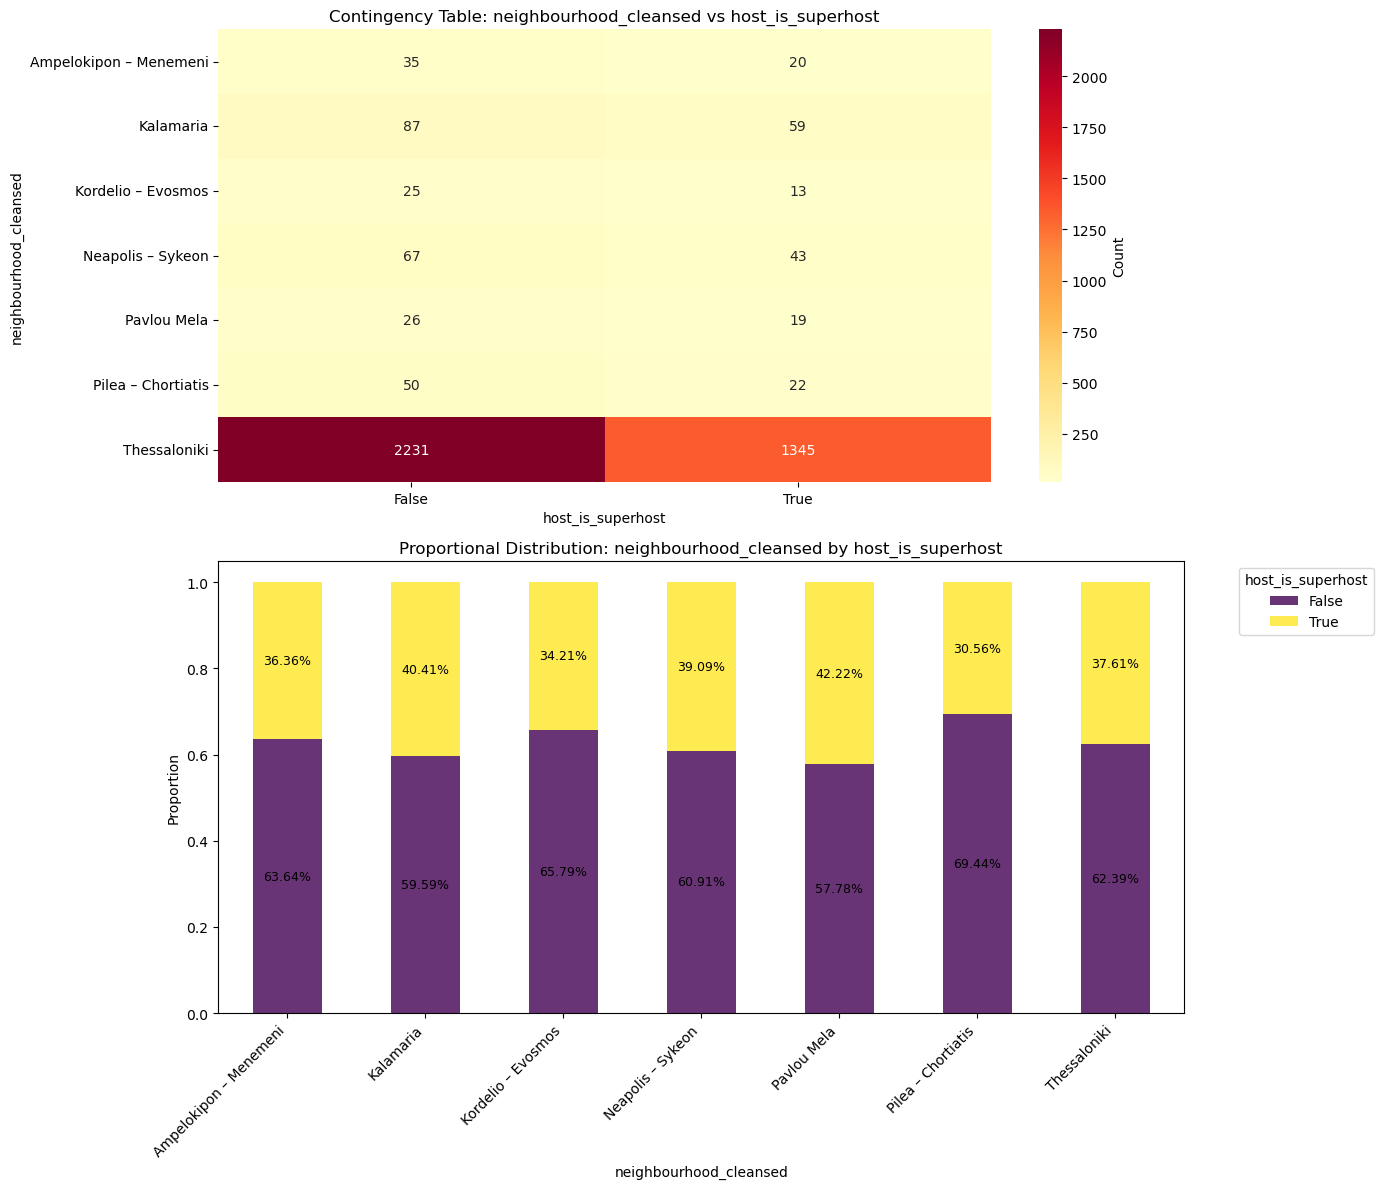

CHI-SQUARE TEST OF INDEPENDENCE: neighbourhood_cleansed vs host_is_superhost

Contingency Table:
host_is_superhost       False  True 
neighbourhood_cleansed              
Ampelokipon – Menemeni     35     20
Kalamaria                  87     59
Kordelio – Evosmos         25     13
Neapolis – Sykeon          67     43
Pavlou Mela                26     19
Pilea – Chortiatis         50     22
Thessaloniki             2231   1345

Test Statistics:
  Chi-square statistic: 2.7482
  Degrees of freedom:   6
  P-value:              0.839719
  Cramér's V:           0.026
  Effect size:          Negligible association
  Significant at α=0.05: NO

Interpretation:
  NO significant association (p=0.839719). neighbourhood_cleansed and host_is_superhost appear to be independent.


{'chi2_statistic': np.float64(2.7482209914968805),
 'p_value': np.float64(0.8397190300148571),
 'degrees_of_freedom': 6,
 'cramers_v': np.float64(0.026075201409091947),
 'effect_interpretation': 'Negligible association',
 'is_significant': np.False_,
 'contingency_table': host_is_superhost       False  True 
 neighbourhood_cleansed              
 Ampelokipon – Menemeni     35     20
 Kalamaria                  87     59
 Kordelio – Evosmos         25     13
 Neapolis – Sykeon          67     43
 Pavlou Mela                26     19
 Pilea – Chortiatis         50     22
 Thessaloniki             2231   1345,
 'expected_frequencies': array([[  34.30356259,   20.69643741],
        [  91.06036616,   54.93963384],
        [  23.70064325,   14.29935675],
        [  68.60712519,   41.39287481],
        [  28.06655121,   16.93344879],
        [  44.90648194,   27.09351806],
        [2230.35526967, 1345.64473033]]),
 'interpretation': 'NO significant association (p=0.839719). neighbourhood_clea

In [ ]:
analyze_categorical_categorical(df_5['neighbourhood_cleansed'], df_5['price'])

/home/fotis/pylab/repos/thess_airbnb/thess_airbnb/scripts/eda_functions.py:723: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


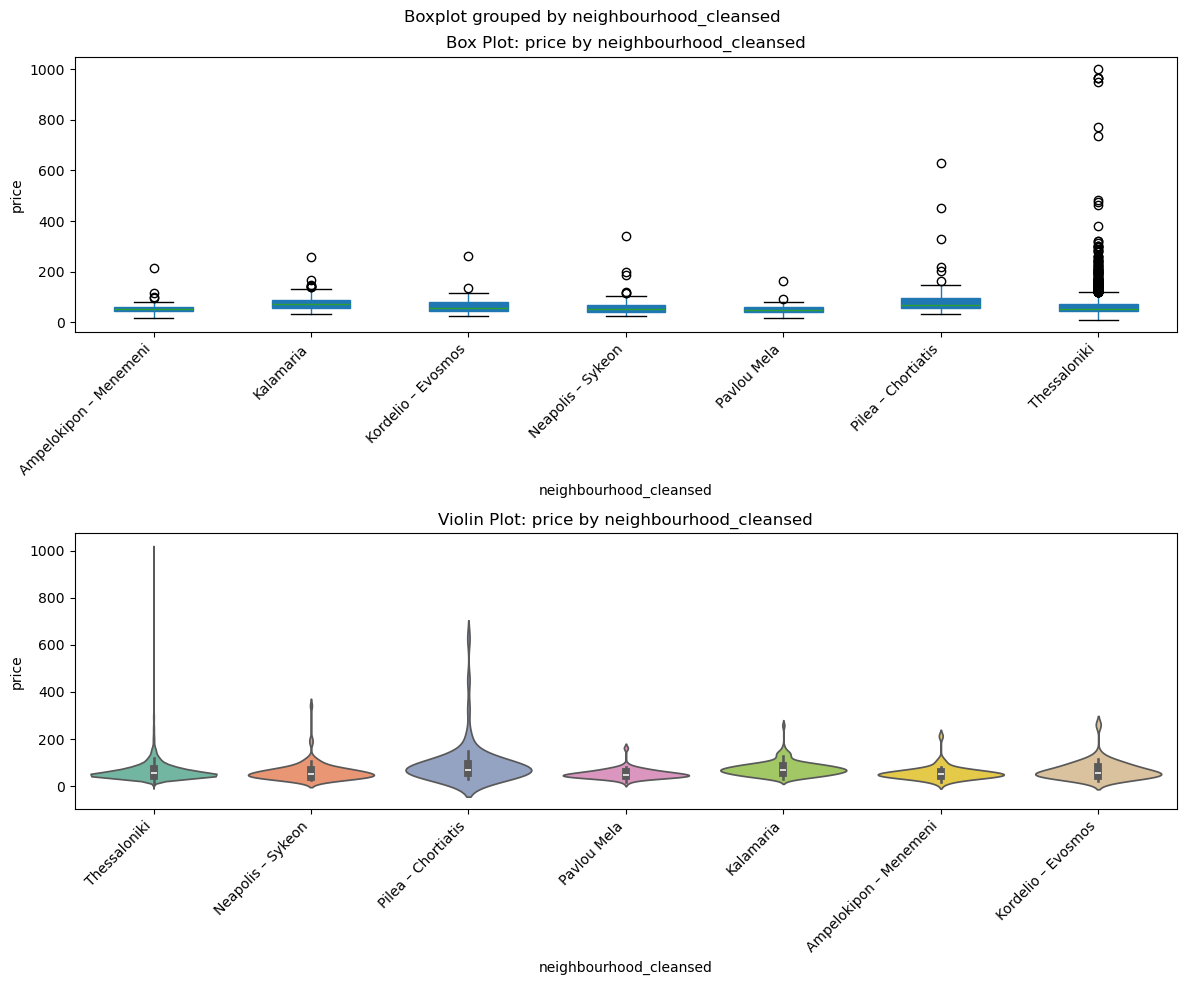

ONE-WAY ANOVA: price by neighbourhood_cleansed

Descriptive Statistics by Group:

  neighbourhood_cleansed = Thessaloniki:
    N:      3679
    Mean:   65.8962
    Median: 54.0000
    Std:    51.7443
    Min:    10.0000
    Max:    1000.0000

  neighbourhood_cleansed = Neapolis – Sykeon:
    N:      117
    Mean:   61.1538
    Median: 53.0000
    Std:    37.9227
    Min:    25.0000
    Max:    342.0000

  neighbourhood_cleansed = Pilea – Chortiatis:
    N:      72
    Mean:   94.1250
    Median: 69.0000
    Std:    90.0152
    Min:    32.0000
    Max:    628.0000

  neighbourhood_cleansed = Pavlou Mela:
    N:      59
    Mean:   53.0847
    Median: 49.0000
    Std:    20.4638
    Min:    18.0000
    Max:    162.0000

  neighbourhood_cleansed = Kalamaria:
    N:      146
    Mean:   74.7945
    Median: 70.5000
    Std:    29.9296
    Min:    32.0000
    Max:    258.0000

  neighbourhood_cleansed = Ampelokipon – Menemeni:
    N:      53
    Mean:   56.1321
    Median: 51.0000
    Std:  

{'test_name': 'One-Way ANOVA',
 'test_statistic': np.float64(5.488170563449089),
 'p_value': np.float64(1.1380073976067889e-05),
 'effect_size': np.float64(0.007847850427689628),
 'effect_measure': 'Eta-squared (η²)',
 'effect_interpretation': 'Negligible effect',
 'is_significant': np.True_,
 'n_groups': 7,
 'groups': array(['Thessaloniki', 'Neapolis – Sykeon', 'Pilea – Chortiatis',
        'Pavlou Mela', 'Kalamaria', 'Ampelokipon – Menemeni',
        'Kordelio – Evosmos'], dtype=object),
 'interpretation': 'SIGNIFICANT difference detected (p=0.000011). neighbourhood_cleansed has a significant effect on price. Negligible effect (Eta-squared (η²) = 0.008).',
 'categorical_variable': 'neighbourhood_cleansed',
 'numerical_variable': 'price'}

In [20]:
analyze_categorical_numerical(df_5['neighbourhood_cleansed'], df_5['price'])

In [22]:
df_5.groupby('neighbourhood_cleansed')[['latitude', 'longitude']].mean()

/tmp/ipykernel_1899/3362350920.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_5.groupby('neighbourhood_cleansed')[['latitude', 'longitude']].mean()


latitude  longitude
neighbourhood_cleansed                      
Ampelokipon – Menemeni  40.651775  22.923662
Kalamaria               40.580362  22.956179
Kordelio – Evosmos      40.668378  22.909385
Neapolis – Sykeon       40.647592  22.951070
Pavlou Mela             40.669892  22.937703
Pilea – Chortiatis      40.600408  23.004977
Thessaloniki            40.631846  22.946211

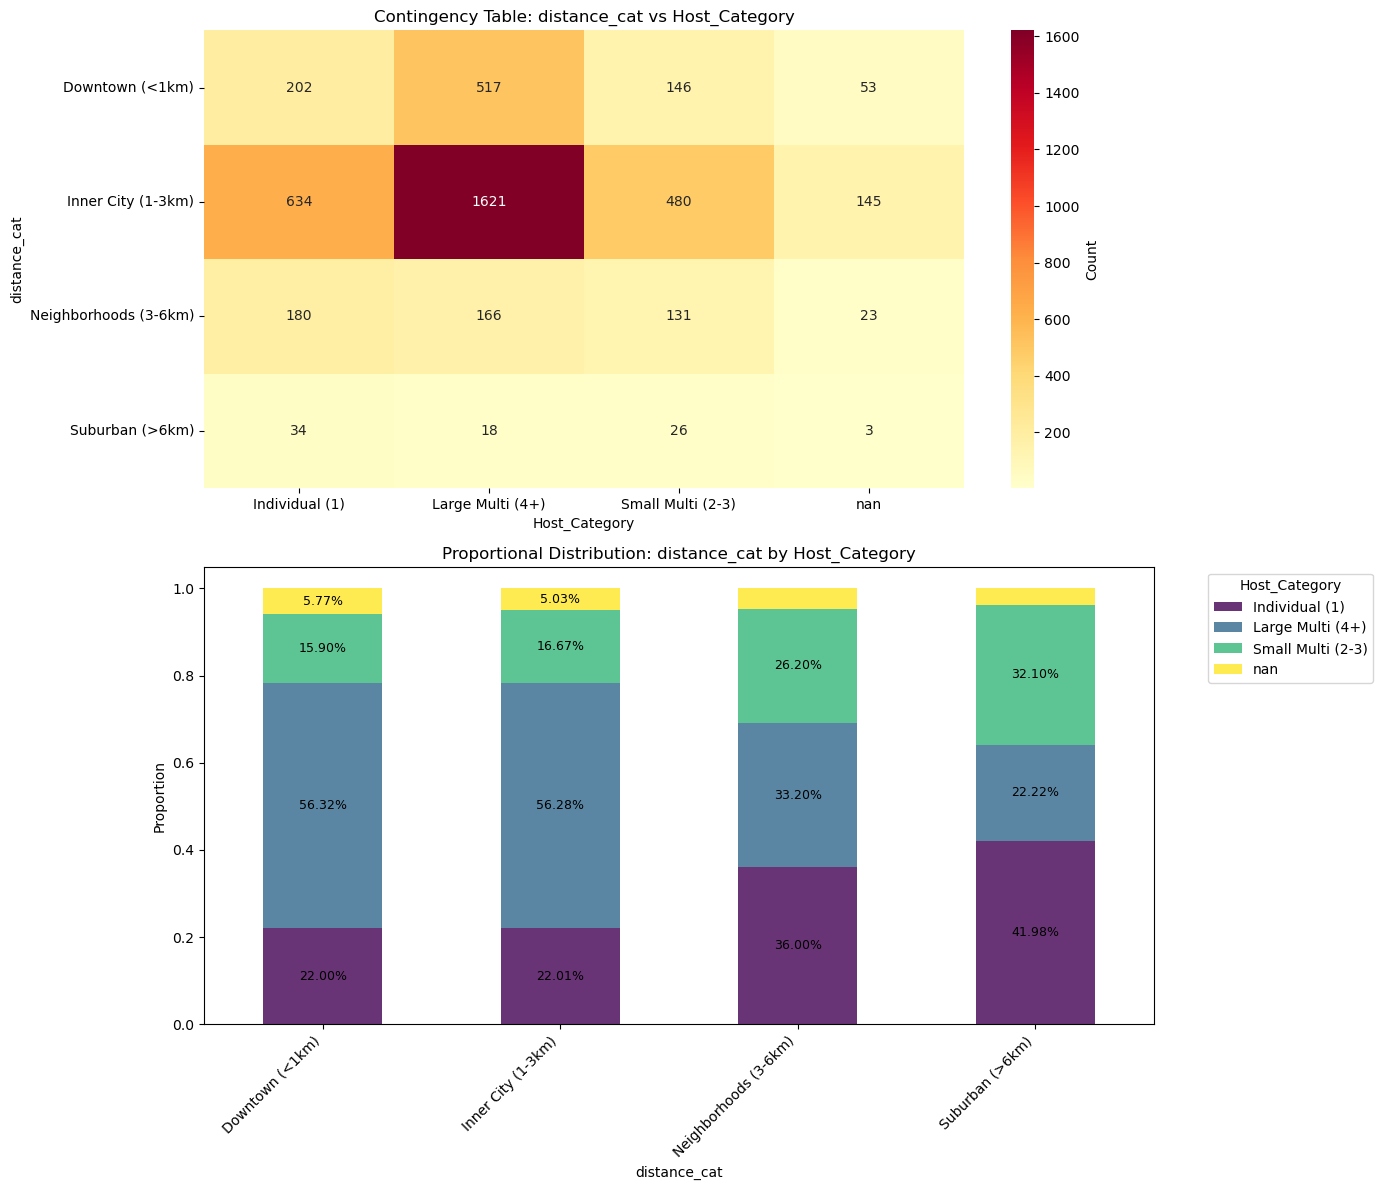

CHI-SQUARE TEST OF INDEPENDENCE: distance_cat vs Host_Category

Contingency Table:
Host_Category          Individual (1)  Large Multi (4+)  Small Multi (2-3)  \
distance_cat                                                                 
Downtown (<1km)                   202               517                146   
Inner City (1-3km)                634              1621                480   
Neighborhoods (3-6km)             180               166                131   
Suburban (>6km)                    34                18                 26   

Host_Category          nan  
distance_cat                
Downtown (<1km)         53  
Inner City (1-3km)     145  
Neighborhoods (3-6km)   23  
Suburban (>6km)          3  

Test Statistics:
  Chi-square statistic: 140.6863
  Degrees of freedom:   9
  P-value:              0.000000
  Cramér's V:           0.103
  Effect size:          Weak association
  Significant at α=0.05: YES

Interpretation:
  SIGNIFICANT association detected (p=0.000000)

{'chi2_statistic': np.float64(140.68625523140423),
 'p_value': np.float64(7.444482240764087e-26),
 'degrees_of_freedom': 9,
 'cramers_v': np.float64(0.1034850788573984),
 'effect_interpretation': 'Weak association',
 'is_significant': np.True_,
 'contingency_table': Host_Category          Individual (1)  Large Multi (4+)  Small Multi (2-3)  \
 distance_cat                                                                 
 Downtown (<1km)                   202               517                146   
 Inner City (1-3km)                634              1621                480   
 Neighborhoods (3-6km)             180               166                131   
 Suburban (>6km)                    34                18                 26   
 
 Host_Category          nan  
 distance_cat                
 Downtown (<1km)         53  
 Inner City (1-3km)     145  
 Neighborhoods (3-6km)   23  
 Suburban (>6km)          3  ,
 'expected_frequencies': array([[ 220.11874857,  486.7768897 ,  164.14569536,

In [24]:
analyze_categorical_categorical(df_5['distance_cat'], df_5["Host_Category"])

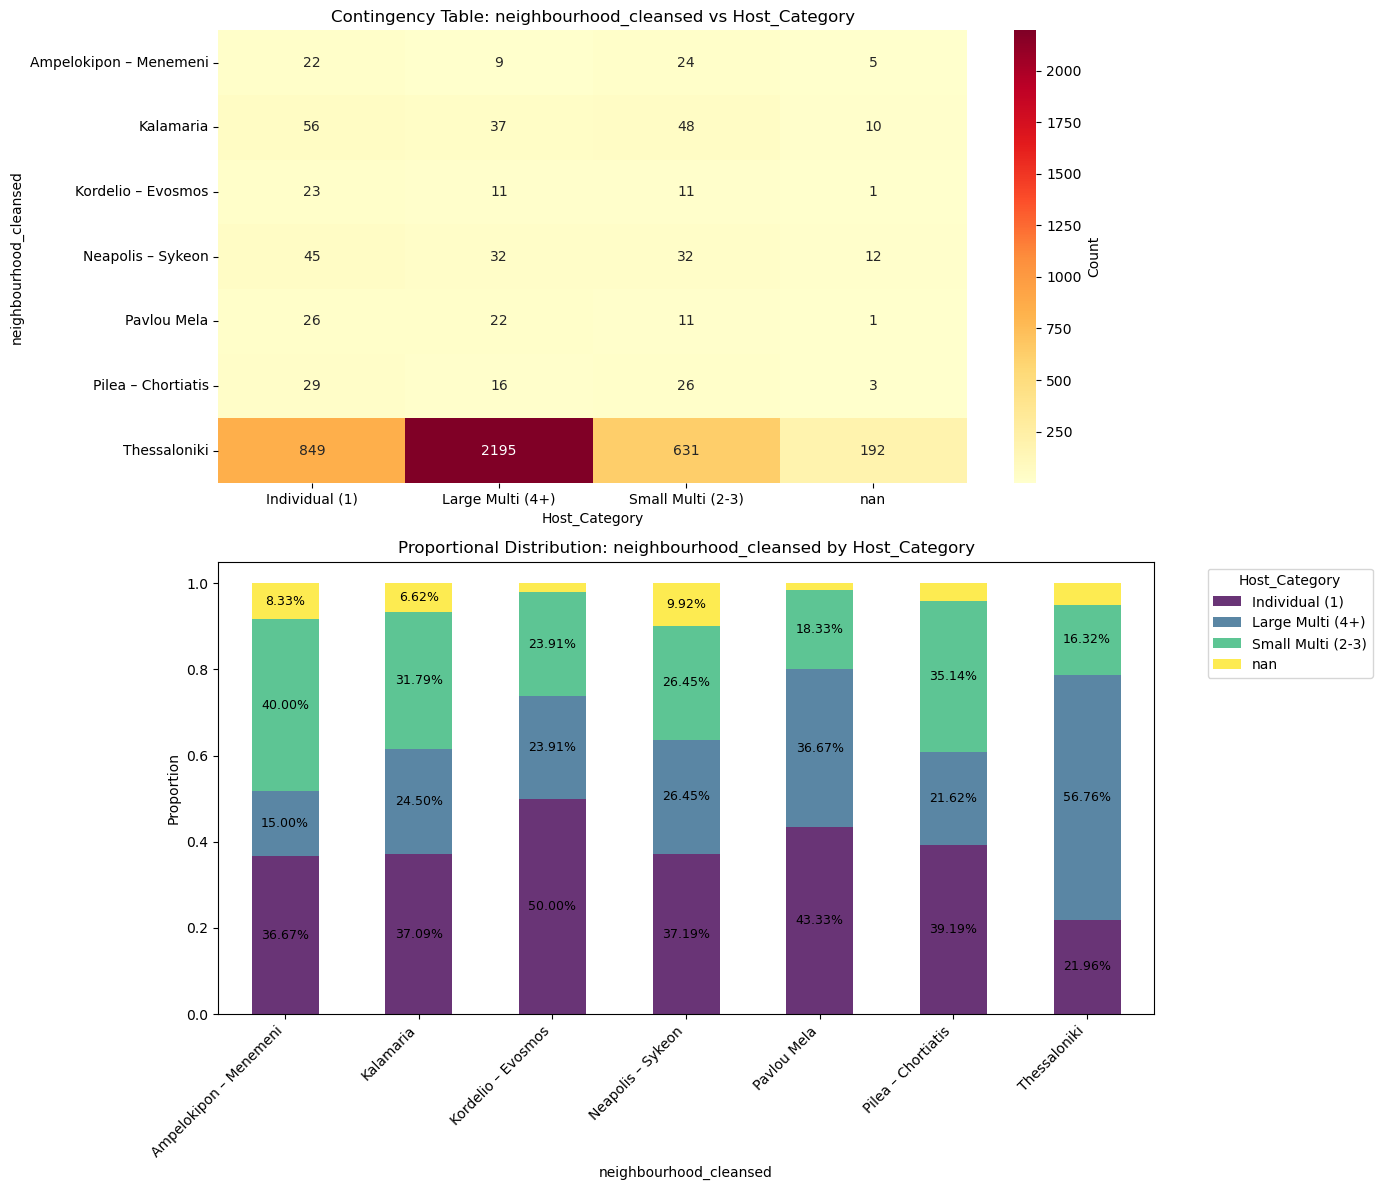

CHI-SQUARE TEST OF INDEPENDENCE: neighbourhood_cleansed vs Host_Category

Contingency Table:
Host_Category           Individual (1)  Large Multi (4+)  Small Multi (2-3)  \
neighbourhood_cleansed                                                        
Ampelokipon – Menemeni              22                 9                 24   
Kalamaria                           56                37                 48   
Kordelio – Evosmos                  23                11                 11   
Neapolis – Sykeon                   45                32                 32   
Pavlou Mela                         26                22                 11   
Pilea – Chortiatis                  29                16                 26   
Thessaloniki                       849              2195                631   

Host_Category           nan  
neighbourhood_cleansed       
Ampelokipon – Menemeni    5  
Kalamaria                10  
Kordelio – Evosmos        1  
Neapolis – Sykeon        12  
Pavlou Mela    

{'chi2_statistic': np.float64(215.84906117936347),
 'p_value': np.float64(6.630102286767843e-36),
 'degrees_of_freedom': 18,
 'cramers_v': np.float64(0.12818198186541602),
 'effect_interpretation': 'Weak association',
 'is_significant': np.True_,
 'contingency_table': Host_Category           Individual (1)  Large Multi (4+)  Small Multi (2-3)  \
 neighbourhood_cleansed                                                        
 Ampelokipon – Menemeni              22                 9                 24   
 Kalamaria                           56                37                 48   
 Kordelio – Evosmos                  23                11                 11   
 Neapolis – Sykeon                   45                32                 32   
 Pavlou Mela                         26                22                 11   
 Pilea – Chortiatis                  29                16                 26   
 Thessaloniki                       849              2195                631   
 
 Host_Cate

In [25]:
analyze_categorical_categorical(df_5["neighbourhood_cleansed"], df_5["Host_Category"])

ana